In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/vaddi/Downloads/raw.githubusercontent.com_dsrscientist_dataset3_main_glass.csv")
df

1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00    0.00    1
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00    0.00    1
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00    0.00    1
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00    0.00    1
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00    0.26    1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...     ...  ...
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06    0.00    7
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59    0.00    7
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64    0.00    7
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57    0.00    7
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67    0.00    7

[213 rows x 11 columns]

IT looks like the column names aren't added to the dataset lets add the column names.

In [3]:
column_names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass']

In [4]:
df.columns= column_names
df

Id       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
..   ...      ...    ...   ...   ...    ...   ...   ...   ...   ...   
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00   
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00   

     Type of Glass  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
208              7  
209              7  
210              7  
211              7  
212              7  

[213 rows x 11 columns]

Here i created the column list and added it to the dataset

In [5]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')

In [6]:
df.columns.tolist()

['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of Glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


The df.info gives the information like number of rows and columns, the data type of each column.

In [8]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

Here, with isnull().sum() we can know if there are any null values present in any of the columns and the total number of the null values in each column.

With the above results we can see that there are no null values in the dataset.

<AxesSubplot:>

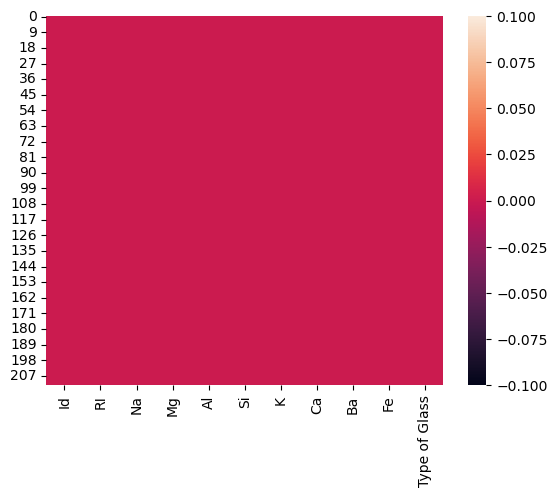

In [9]:
sns.heatmap(df.isnull())

Representing the zero null values using the heatmap

In [10]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

It is observed that the data type of all the independent values is float and the target value data type is int

In [11]:
df.drop('Id', axis=1, inplace=True)

Here, i am dropping the 'ID' column as it adds no value to the target value

In [12]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type of Glass
0    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00              1
1    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00              1
2    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00              1
3    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00              1
4    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26              1
..       ...    ...   ...   ...    ...   ...   ...   ...   ...            ...
208  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00              7
209  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00              7
210  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00              7
211  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00              7
212  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00              7

[213 rows x 10 columns]

In [13]:
df.shape

(213, 10)

Moving all the independent values to the x variable and the target values to the y variable, so that the ML model can be applied

In [14]:
x= df.iloc[:,0:-1]

In [15]:
x

RI     Na    Mg    Al     Si     K    Ca    Ba    Fe
0    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00
1    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00
2    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00
3    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00
4    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26
..       ...    ...   ...   ...    ...   ...   ...   ...   ...
208  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00
209  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00
210  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00
211  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00
212  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00

[213 rows x 9 columns]

In [16]:
y=df.iloc[:,-1]

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of Glass, Length: 213, dtype: int64

Here, i am trying the Support Vector Classifier(SVC) with different kernals

In [18]:
#svc=SVC(kernel='rbf')
#svc=SVC(kernel='linear')
svc=SVC(kernel='poly')
#svc=SVC(kernel='sigmoid')


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=56)

In [20]:
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)

In [21]:
svcpred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [22]:
print(accuracy_score(y_test,svcpred))

0.4418604651162791


As the results aren't accurate let's try differnt models

In [23]:
mnb=MultinomialNB()

In [24]:
mnb.fit(x_train,y_train)
mnbpred=mnb.predict(x_test)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=44)

In [26]:
mnbpred

array([1, 1, 1, 2, 1, 2, 7, 1, 2, 1, 2, 2, 7, 1, 2, 1, 1, 1, 2, 7, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 7, 7, 1, 1, 1, 7, 2, 1, 1, 1, 7, 7, 1, 2],
      dtype=int64)

In [27]:
print(accuracy_score(y_test,mnbpred))

0.32558139534883723


Let's try Gaussian naive bayers model to test the data

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb= GaussianNB()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=61)

In [31]:
gnb.fit(x_train,y_train)
gnbpred=mnb.predict(x_test)

In [32]:
print(accuracy_score(y_test,gnbpred))

0.7209302325581395


After trying the different random states the maximum accuracy score obtained is 67, so let's try KNeighborsClassifier

In [33]:
knb= KNeighborsClassifier()

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=78)

In [35]:
knb.fit(x_train,y_train)
knbpred=knb.predict(x_test)

In [36]:
knbpred

array([1, 2, 2, 1, 7, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 7, 2, 2, 7, 1,
       1, 1, 1, 2, 2, 2, 7, 5, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 5],
      dtype=int64)

In [37]:
print(accuracy_score(y_test,knbpred))

0.8372093023255814


The accuracy score obtained is 83% now, let's create a confusion matrix and classification report for the same

In [38]:
print(confusion_matrix(y_test,knbpred))

[[16  2  0  0  0]
 [ 2 15  0  0  0]
 [ 2  0  0  0  0]
 [ 0  0  0  2  1]
 [ 0  0  0  0  3]]


In [39]:
print(classification_report(y_test,knbpred))

              precision    recall  f1-score   support

           1       0.80      0.89      0.84        18
           2       0.88      0.88      0.88        17
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy                           0.84        43
   macro avg       0.69      0.69      0.68        43
weighted avg       0.81      0.84      0.82        43



Creating a heatmap for the confusion matrix with values

<AxesSubplot:>

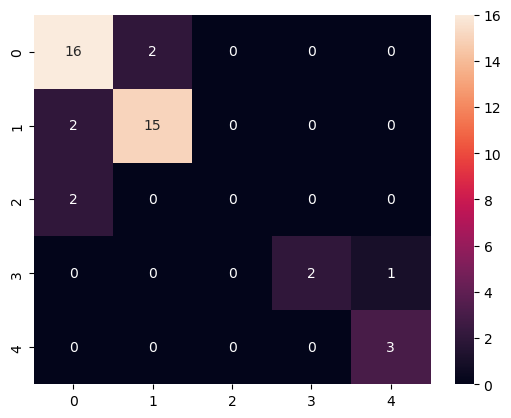

In [40]:
sns.heatmap(confusion_matrix(y_test,knbpred), annot=True)

Creating a function for with the knb model, so that the glass type can be predicted for the new values as well.

In [41]:
def predictknbfunc(p):
    p=p.reshape(1,-1)
    pred=knb.predict(p)
    print("The type of the glass is =", pred)

Here, i am giving new random values for my model to predict the glass type

In [42]:
p=np.array([1.05,2.56,3.45,0.66,1.98,2.64,3.565,0.99,2.5])
predictknbfunc(p)

The type of the glass is = [5]


# Student grades prediction

In [43]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression #Choosing the Linear Regression as the Y/target value is in float data type 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # to find out the e value and also r2_score to find on the effect on y
from sklearn.model_selection import train_test_split #for fit and predict the data

import warnings
warnings.filterwarnings('ignore')

In [44]:
ds= pd.read_csv("C:/Users/vaddi/Downloads/Grades.csv")

In [45]:
ds

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [46]:
ds.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [47]:
ds.tail()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[5 rows x 43 columns]

In [48]:
ds.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [49]:
ds.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

Let,s check if the dataset contains any null values

In [50]:
ds.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Graphical representation of the null values present in the dataset

<AxesSubplot:>

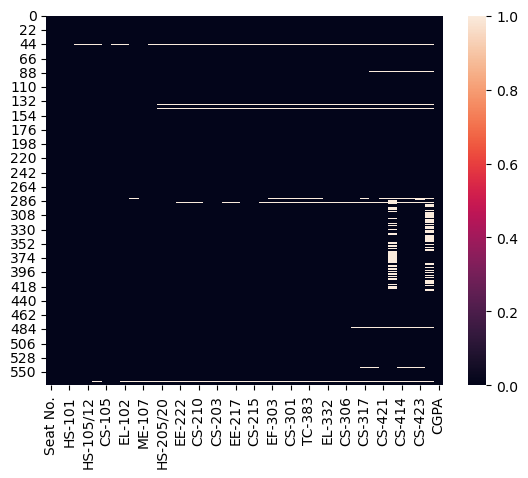

In [51]:
sns.heatmap(ds.isnull())

Let's figure out the columns and the rows that contains the nul values

In [52]:
ds_null = pd.read_csv('C:/Users/vaddi/Downloads/Grades.csv')
missing_values = ds_null.isnull()
missing_columns = ds_null.isnull().any()
missing_rows = ds_null.isnull().any(axis=1)

print("Columns with missing values:")
print(missing_columns)


print("Rows with missing values:")
ds_null[missing_rows]


Columns with missing values:
Seat No.     False
PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
MT-442        True
EL-332        True
CS-318        True
CS-306        True
CS-312        True
CS-317        True
CS-403        True
CS-421        True
CS-406        True
CS-414        True
CS-419        True
CS-423        True
CS-412        True
CGPA         False
dtype: bool
Rows with missing values:


Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
44   CS-97045      D      C    NaN       NaN    NaN     C-    NaN    NaN   
60   CS-97061      C     B+     WU        D+     C-     B-      F      D   
86   CS-97087      D      D     D+        B-      F      D      D      D   
91   CS-97092     WU     C-      D         D     WU      D      D      D   
137  CS-97138     C-     C+     WU        WU     WU      B     WU     WU   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
423  CS-97424      D     D+      D         D     C-      C     C+     B-   
424  CS-97425     C-     D+     B-        C+     D+     C-     A-     C-   
481  CS-97482     B-     A-     C+         D      B      B     A-     A-   
543  CS-97544      A      B      A        A-     A-      A     B+     B+   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
44      D+  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
60      A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
86      D+  ...     D+      D    NaN    NaN    NaN    NaN    NaN    NaN   
91       C  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
137     A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
423      C  ...      D      D     D+      D      D      W      C      B   
424     D+  ...      W      C     B-      F     D+      W      D      B   
481      C  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
543     B+  ...     WU    NaN    NaN      W     WU    NaN    NaN    NaN   
565    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    CS-412   CGPA  
44     NaN  1.493  
60     NaN  2.418  
86     NaN  1.261  
91     NaN  1.380  
137    NaN  2.653  
..     ...    ...  
423    NaN  1.747  
424    NaN  1.835  
481    NaN  1.896  
543      W  3.607  
565    NaN  0.800  

[154 rows x 43 columns]

Here, i am dropping the rows this maximum null values

In [53]:
rows_to_drop = [44,60,137,142,143,288,281,282,481,565,91]
grades= ds.drop(rows_to_drop, axis=0)
grades

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[560 rows x 43 columns]

In [54]:
ds.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Here, i am dropping the columns CS-406 and CS-412 as there are lot of missing values

In [55]:
list1=['CS-406','CS-412' ]
grades= ds.drop(list1, axis=1)
grades

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-318 CS-306 CS-312 CS-317 CS-403 CS-421 CS-414 CS-419  \
0       B-  ...     C-      C     C-     C-     C-     C-      A     C-   
1       D+  ...     A-      D     D+      D      C      D     B-      C   
2       A-  ...     A-     A-      B      B      A      C      A      A   
3        D  ...     B+     C-     D+      C     D+     C-      B     C+   
4        A  ...     B-     A-     B-     B+     B+     B-      A     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...      A     B+     A-     A-      A      A     B+     B+   
567      A  ...     A+     A-     B+     B+      A      A      B     A-   
568      A  ...     C+     B+     A-      B      A     B+      C     B+   
569     B-  ...     B-     B+      D      B      B     C-      C      B   
570      C  ...     C-     D+     C+      C     B-      D     C-     B+   

    CS-423   CGPA  
0        B  2.205  
1        C  2.008  
2       A-  3.608  
3       C+  1.906  
4       A-  3.448  
..     ...    ...  
566      B  3.798  
567      C  3.772  
568     A-  3.470  
569     B-  2.193  
570      D  1.753  

[571 rows x 41 columns]

Let's fill the nan values with the mode value of the same row.

In [56]:
def fill_nan_with_mode(row):
    mode = row.mode().iloc[0]  
    return row.fillna(mode)  

gradesdf = grades.apply(fill_nan_with_mode, axis=1)
gradesdf

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-318 CS-306 CS-312 CS-317 CS-403 CS-421 CS-414 CS-419  \
0       B-  ...     C-      C     C-     C-     C-     C-      A     C-   
1       D+  ...     A-      D     D+      D      C      D     B-      C   
2       A-  ...     A-     A-      B      B      A      C      A      A   
3        D  ...     B+     C-     D+      C     D+     C-      B     C+   
4        A  ...     B-     A-     B-     B+     B+     B-      A     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...      A     B+     A-     A-      A      A     B+     B+   
567      A  ...     A+     A-     B+     B+      A      A      B     A-   
568      A  ...     C+     B+     A-      B      A     B+      C     B+   
569     B-  ...     B-     B+      D      B      B     C-      C      B   
570      C  ...     C-     D+     C+      C     B-      D     C-     B+   

    CS-423   CGPA  
0        B  2.205  
1        C  2.008  
2       A-  3.608  
3       C+  1.906  
4       A-  3.448  
..     ...    ...  
566      B  3.798  
567      C  3.772  
568     A-  3.470  
569     B-  2.193  
570      D  1.753  

[571 rows x 41 columns]

In [57]:
gradesdf.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-414       0
CS-419       0
CS-423       0
CGPA         0
dtype: int64

Now, we can see that the dataset contains no null values, lets create the heatmap for the same

<AxesSubplot:>

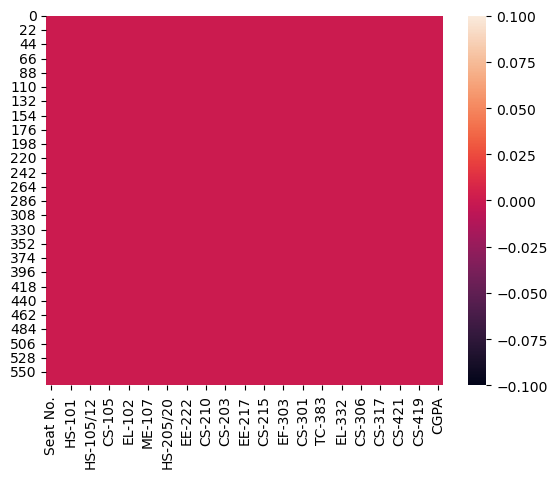

In [58]:
sns.heatmap(gradesdf.isnull())

Now, for the further analysis lets change the data to the numerical data using Labelencoder

In [59]:
le=LabelEncoder()
list1 =[ 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-414', 'CS-419', 'CS-423',
       ]
for val in list1:
    gradesdf[val] = le.fit_transform(gradesdf[val].astype(str))



In [60]:
gradesdf


Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0    CS-97001       5      10       8          6       8      10      10   
1    CS-97002       0       9      11         10       5       6      10   
2    CS-97003       0       3       0          5       4       0       5   
3    CS-97004       9       7      11         10      10       2      11   
4    CS-97005       2       2       2          4       0       0       2   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566  CS-97567       3       0       0          2       1       0       2   
567  CS-97568       1       0       0          0       0       0       0   
568  CS-97569       3       0       2          4       0       0       0   
569  CS-97570       0       4      10          0      10      10       5   
570  CS-97571       6       9      10          6       6      10       3   

     EL-102  EE-119  ...  CS-318  CS-306  CS-312  CS-317  CS-403  CS-421  \
0         8       5  ...       8       6       8       8       8       8   
1         0      10  ...       2      10      11      10       6      10   
2         4       2  ...       2       2       3       3       0       6   
3         8       9  ...       4       8      11       6      11       8   
4         4       0  ...       5       2       5       4       4       5   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       2       1  ...       0       4       2       2       0       0   
567       2       0  ...       1       2       4       4       0       0   
568       0       0  ...       7       4       2       3       0       4   
569       8       5  ...       5       4      10       3       3       8   
570       7       6  ...       8      11       7       6       5      10   

     CS-414  CS-419  CS-423   CGPA  
0         0       8       3  2.205  
1         5       6       6  2.008  
2         0       0       2  3.608  
3         3       7       7  1.906  
4         0       2       2  3.448  
..      ...     ...     ...    ...  
566       4       4       3  3.798  
567       3       2       6  3.772  
568       6       4       2  3.470  
569       6       3       5  2.193  
570       8       4      10  1.753  

[571 rows x 41 columns]

Here, we can see that the data is converted into the numerical values

Dropping the 'Seat No.' column as it adds no value to the target value.

In [61]:
gradesdf.drop('Seat No.', axis=1, inplace=True)
gradesdf

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10      10       8   
1         0       9      11         10       5       6      10       0   
2         0       3       0          5       4       0       5       4   
3         9       7      11         10      10       2      11       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4      10          0      10      10       5       8   
570       6       9      10          6       6      10       3       7   

     EE-119  ME-107  ...  CS-318  CS-306  CS-312  CS-317  CS-403  CS-421  \
0         5       8  ...       8       6       8       8       8       8   
1        10       9  ...       2      10      11      10       6      10   
2         2       2  ...       2       2       3       3       0       6   
3         9       7  ...       4       8      11       6      11       8   
4         0       2  ...       5       2       5       4       4       5   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       0       4       2       2       0       0   
567       0       0  ...       1       2       4       4       0       0   
568       0       3  ...       7       4       2       3       0       4   
569       5       8  ...       5       4      10       3       3       8   
570       6      10  ...       8      11       7       6       5      10   

     CS-414  CS-419  CS-423   CGPA  
0         0       8       3  2.205  
1         5       6       6  2.008  
2         0       0       2  3.608  
3         3       7       7  1.906  
4         0       2       2  3.448  
..      ...     ...     ...    ...  
566       4       4       3  3.798  
567       3       2       6  3.772  
568       6       4       2  3.470  
569       6       3       5  2.193  
570       8       4      10  1.753  

[571 rows x 40 columns]

# data visualization

univariant Analysis

2     112
0     111
4      61
3      57
5      56
9      44
6      33
7      31
10     22
1      22
8      19
12      2
11      1
Name: PH-121, dtype: int64


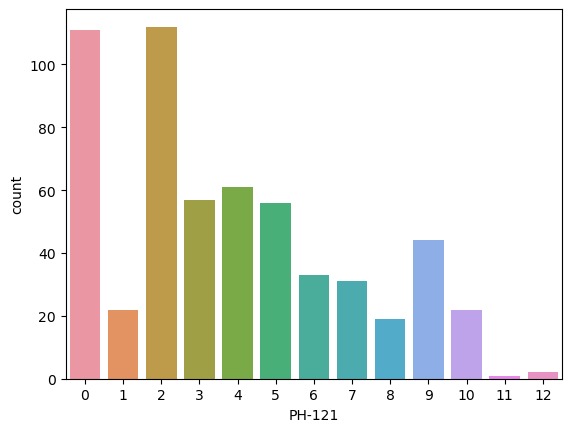

In [62]:
#Visualizing the 'PH-121' data
ax=sns.countplot(x='PH-121',data=gradesdf)
print(gradesdf['PH-121'].value_counts())

2     82
5     78
6     68
3     63
4     59
8     50
7     47
9     45
0     38
10    36
1      4
11     1
Name: HS-101, dtype: int64


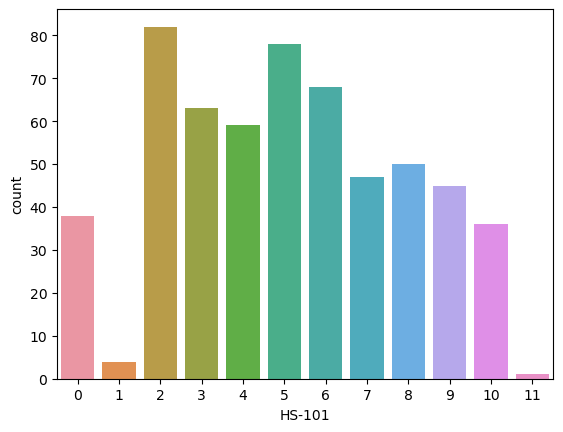

In [63]:
#Analysis the data of HS-101
ax= sns.countplot(x='HS-101', data= gradesdf)
print(gradesdf['HS-101'].value_counts())

0     177
2     120
4      50
3      49
5      42
10     31
1      31
6      19
7      17
8      16
11     14
13      3
9       1
12      1
Name: CY-105, dtype: int64


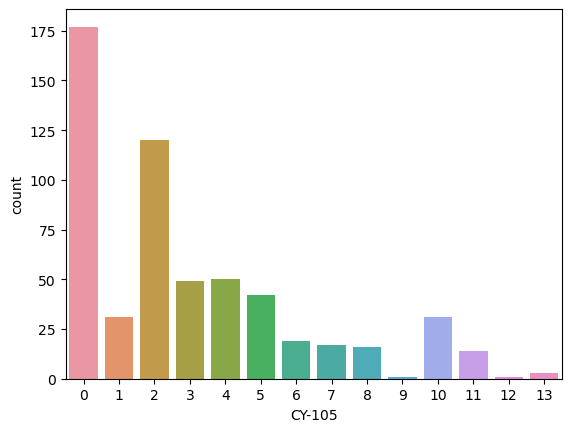

In [64]:
#Analysing the data in CY-105
ax= sns.countplot(x='CY-105', data=gradesdf)
print(gradesdf['CY-105'].value_counts())

0     96
2     75
4     70
3     57
10    45
6     41
5     40
7     39
8     36
11    34
1     34
13     2
9      1
12     1
Name: HS-105/12, dtype: int64


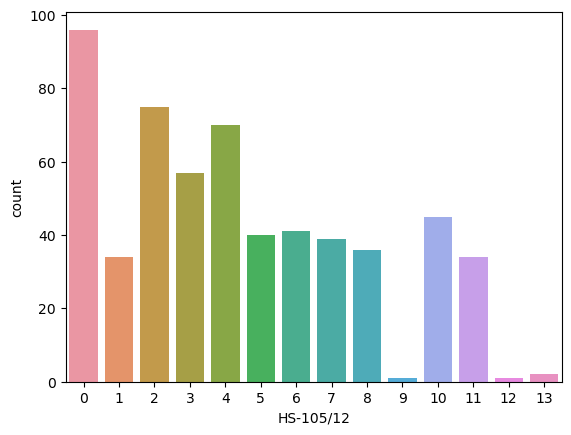

In [65]:
#analysing the data of HS-105/12
ax=sns.countplot(x='HS-105/12', data=gradesdf)
print(gradesdf['HS-105/12'].value_counts())

2     105
0     100
5      70
4      62
3      55
8      39
7      33
6      30
10     27
1      23
11     21
13      3
12      2
9       1
Name: MT-111, dtype: int64


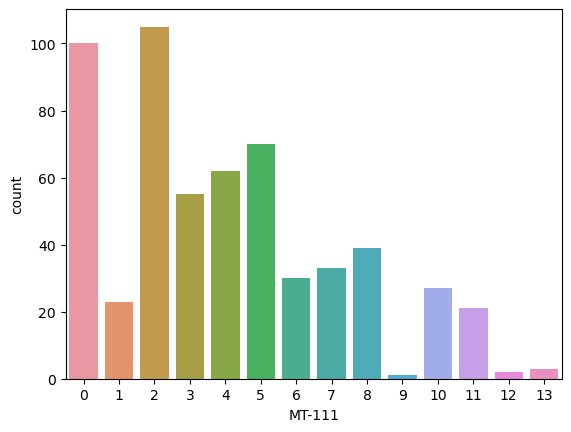

In [66]:
#visualizing the data on MT-111
ax= sns.countplot(x='MT-111', data=gradesdf)
print(gradesdf['MT-111'].value_counts())

0     151
2     134
4      60
3      51
1      43
5      38
7      23
6      22
8      22
10     15
9      12
Name: CS-105, dtype: int64


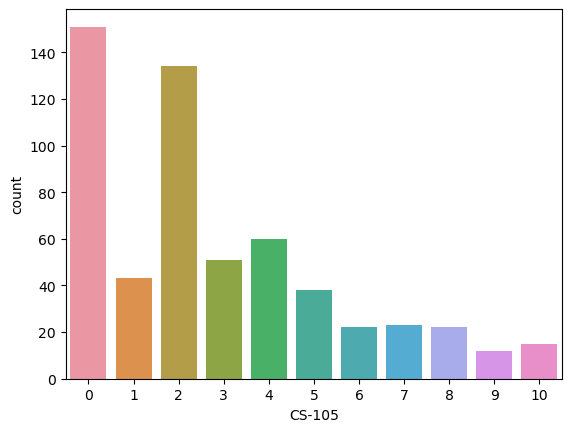

In [67]:
#visualizing the data on CS-105
ax= sns.countplot(x='CS-105', data= gradesdf)
print(gradesdf['CS-105'].value_counts())

2     116
4     101
3      96
0      56
5      54
7      41
11     29
8      27
10     24
6      18
1       4
12      2
13      2
9       1
Name: CS-106, dtype: int64


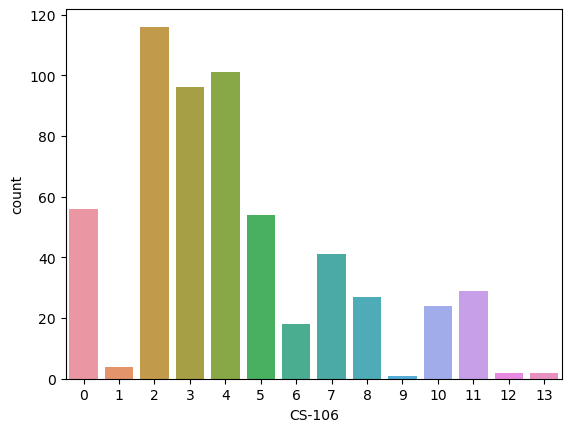

In [68]:
#visualizing the data of CS-106
ax=sns.countplot(x='CS-106', data= gradesdf)
print(gradesdf['CS-106'].value_counts())

2     105
0      92
4      69
3      59
5      53
10     39
7      35
8      32
6      30
1      29
11     23
13      3
9       1
12      1
Name: EL-102, dtype: int64


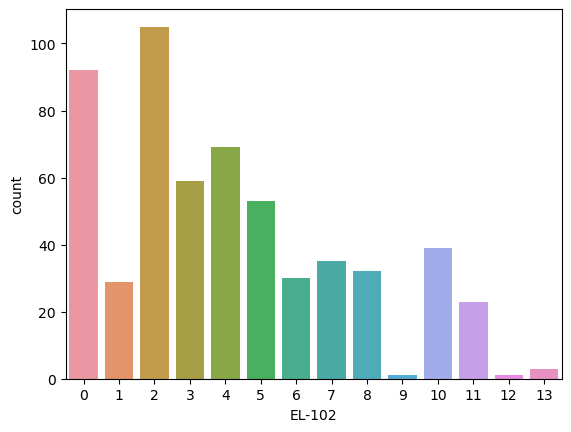

In [69]:
#Visualizing the data of EL-102
ax=sns.countplot(x='EL-102', data= gradesdf)
print(gradesdf['EL-102'].value_counts())

2     137
4      83
3      77
0      68
5      48
6      48
7      38
10     26
8      26
9      13
1       6
11      1
Name: EE-119, dtype: int64


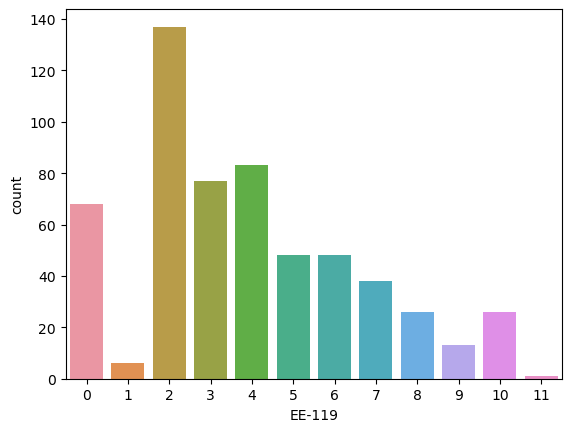

In [70]:
#Visualizing the data of EE-119
ax=sns.countplot(x='EE-119', data= gradesdf)
print(gradesdf['EE-119'].value_counts())

2     80
0     77
4     68
9     57
5     56
3     50
6     49
8     48
7     37
10    37
1      8
12     2
11     2
Name: ME-107, dtype: int64


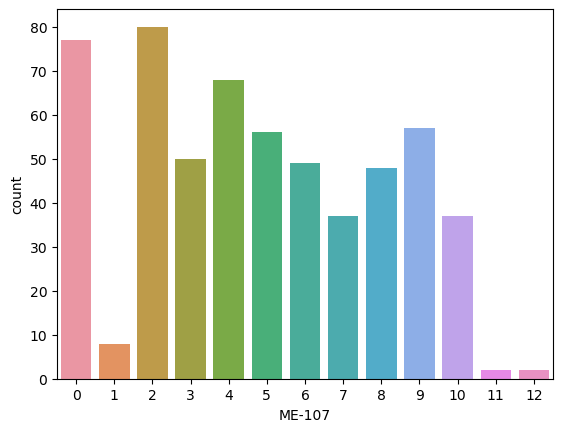

In [71]:
#Visualizing the data of CS-106
ax=sns.countplot(x='ME-107', data= gradesdf)
print(gradesdf['ME-107'].value_counts())

0     105
2      81
4      57
3      55
8      49
5      43
1      42
10     39
7      34
11     31
6      30
14      2
9       1
13      1
12      1
Name: CS-107, dtype: int64


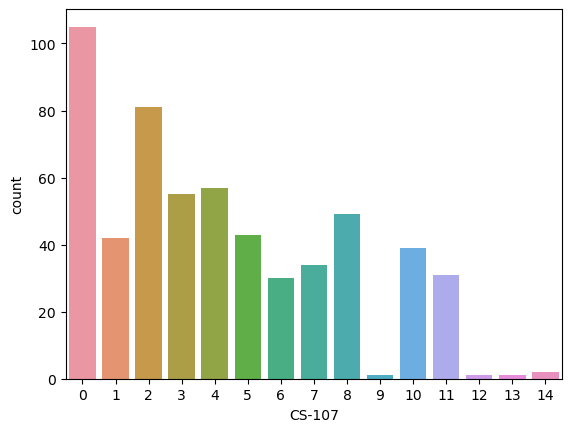

In [72]:
#Visualizing the data of CS-107
ax=sns.countplot(x='CS-107', data= gradesdf)
print(gradesdf['CS-107'].value_counts())

2     151
0     118
3      97
4      89
5      36
7      33
6      15
8      11
11      9
10      4
13      3
1       2
12      2
9       1
Name: HS-205/20, dtype: int64


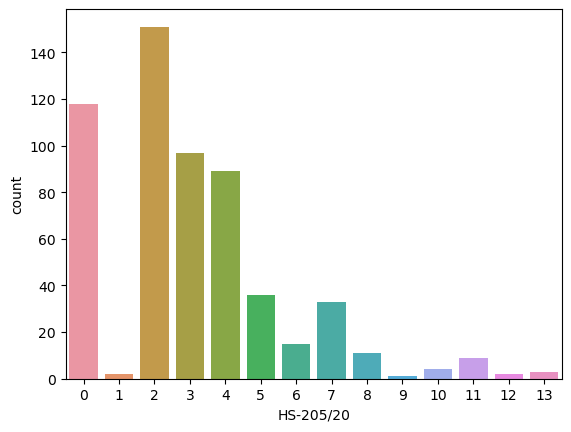

In [73]:
#Visualizing the data of HS-205/20
ax=sns.countplot(x='HS-205/20', data= gradesdf)
print(gradesdf['HS-205/20'].value_counts())

2     87
0     80
10    67
3     61
5     52
11    46
6     43
4     42
7     39
8     30
1     16
14     3
12     3
9      1
13     1
Name: MT-222, dtype: int64


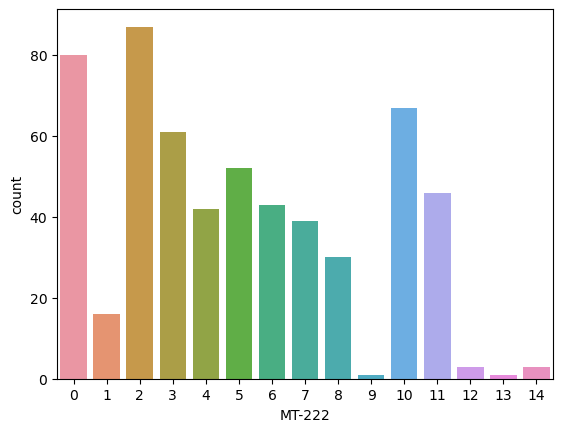

In [74]:
#Visualizing the data of MT-222
ax=sns.countplot(x='MT-222', data= gradesdf)
print(gradesdf['MT-222'].value_counts())

2     122
0     122
4      65
3      53
6      39
5      35
1      32
7      29
10     27
11     21
8      16
12      4
14      3
13      2
9       1
Name: EE-222, dtype: int64


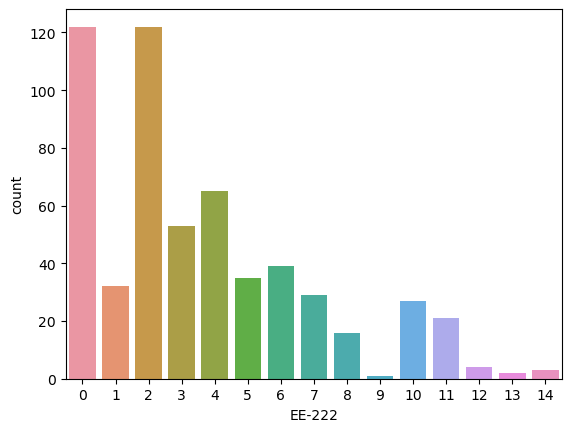

In [75]:
#Visualizing the data of EE-222
ax=sns.countplot(x='EE-222', data= gradesdf)
print(gradesdf['EE-222'].value_counts())

2     121
0      80
4      65
3      57
5      49
8      43
7      39
11     37
10     33
6      30
1      10
14      4
9       1
13      1
12      1
Name: MT-224, dtype: int64


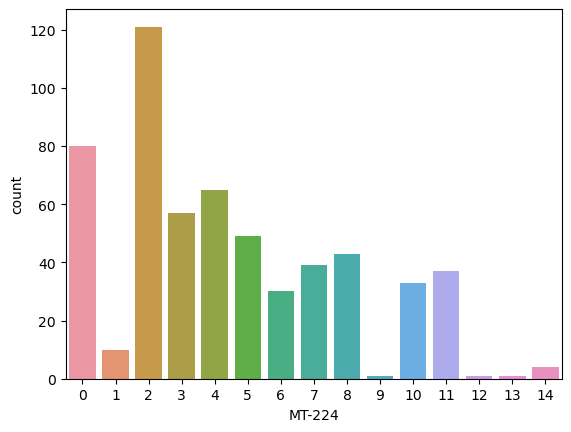

In [76]:
#Visualizing the data of MT-224
ax=sns.countplot(x='MT-224', data= gradesdf)
print(gradesdf['MT-224'].value_counts())

2     134
0     101
4      84
3      59
5      58
6      30
7      27
8      24
11     21
10     14
1      12
14      4
9       1
13      1
12      1
Name: CS-210, dtype: int64


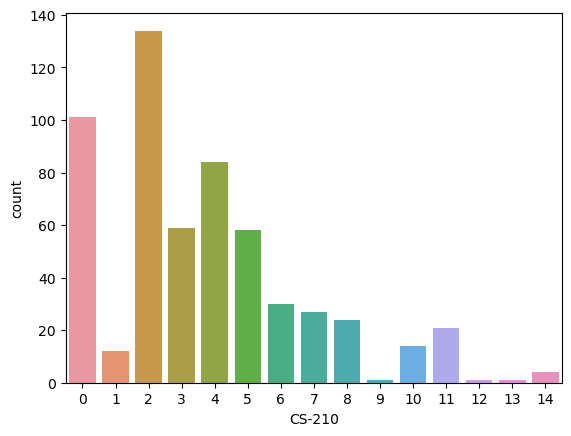

In [77]:
#Visualizing the data of CS-210
ax=sns.countplot(x='CS-210', data= gradesdf)
print(gradesdf['CS-210'].value_counts())

2     69
0     67
5     60
11    56
4     56
3     56
7     55
8     50
6     39
10    34
1     21
14     3
12     3
9      1
13     1
Name: CS-211, dtype: int64


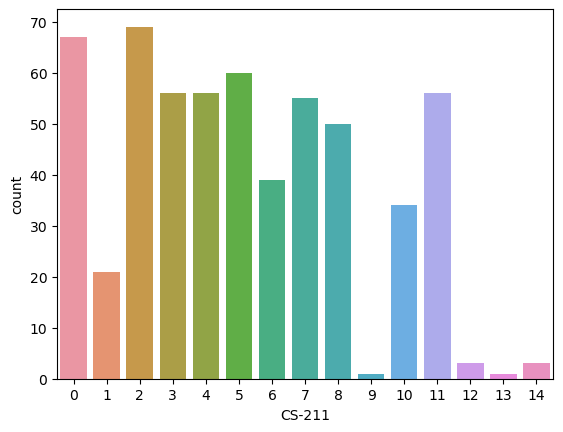

In [78]:
#Visualizing the data of CS-211
ax=sns.countplot(x='CS-211', data= gradesdf)
print(gradesdf['CS-211'].value_counts())

2     89
0     81
3     66
7     62
4     59
5     53
11    39
6     35
8     35
10    31
1     15
12     2
14     2
9      1
13     1
Name: CS-203, dtype: int64


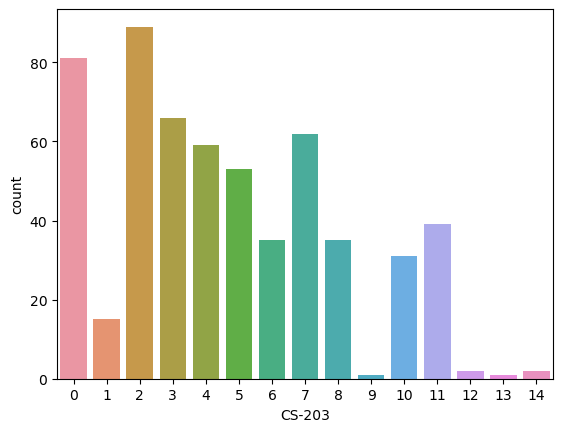

In [79]:
#Visualizing the data of CS-203
ax=sns.countplot(x='CS-203', data= gradesdf)
print(gradesdf['CS-203'].value_counts())

6     76
2     74
3     63
8     57
5     56
0     56
11    47
7     46
4     45
10    33
1     12
12     2
14     2
9      1
13     1
Name: CS-214, dtype: int64


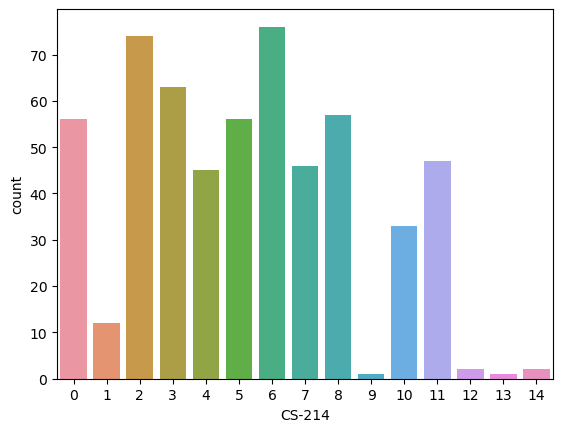

In [80]:
#Visualizing the data of CS-214
ax=sns.countplot(x='CS-214', data= gradesdf)
print(gradesdf['CS-214'].value_counts())

2     138
0      97
4      70
3      63
5      57
6      36
7      29
1      22
8      20
11     19
10     14
13      3
12      2
9       1
Name: EE-217, dtype: int64


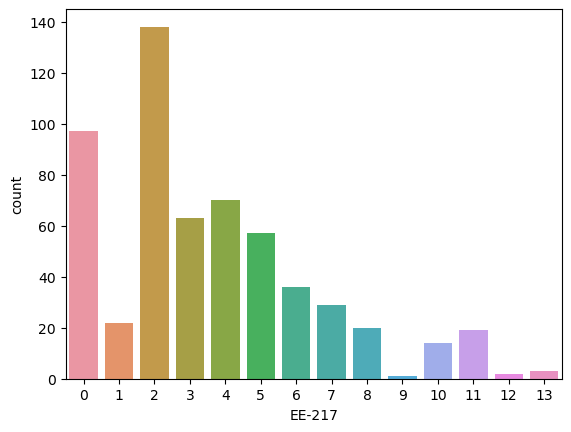

In [81]:
#Visualizing the data of EE-217
ax=sns.countplot(x='EE-217', data= gradesdf)
print(gradesdf['EE-217'].value_counts())

2     102
4      86
3      81
5      65
6      44
0      43
11     36
7      35
8      35
10     34
12      5
1       4
9       1
Name: CS-212, dtype: int64


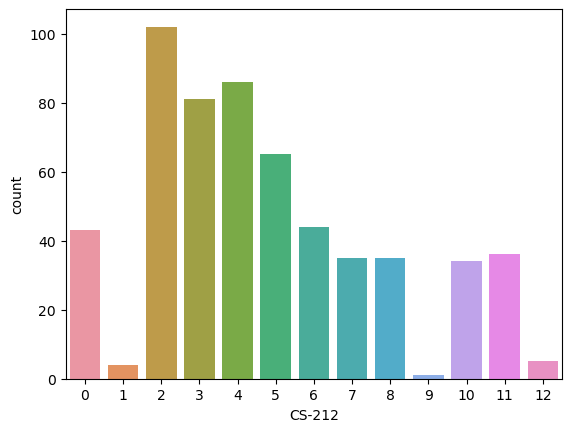

In [82]:
#Visualizing the data of CS-212
ax=sns.countplot(x='CS-212', data= gradesdf)
print(gradesdf['CS-212'].value_counts())

2     80
0     68
3     64
5     59
7     50
4     50
6     48
8     47
10    43
11    38
1     17
14     4
9      1
13     1
12     1
Name: CS-215, dtype: int64


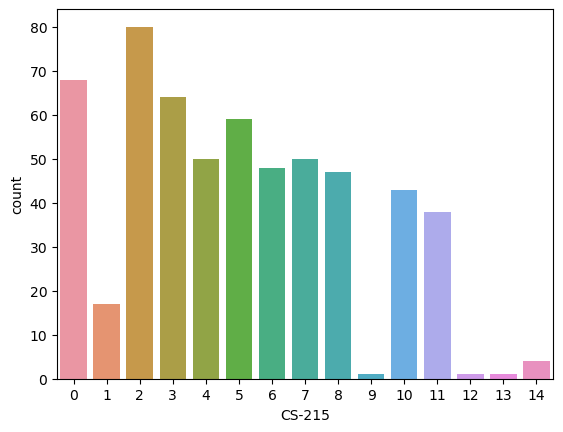

In [83]:
#Visualizing the data of CS-215
ax=sns.countplot(x='CS-215', data= gradesdf)
print(gradesdf['CS-215'].value_counts())

0     118
2     104
4      64
3      57
5      46
8      32
11     31
1      30
6      28
7      27
10     25
12      5
13      3
9       1
Name: MT-331, dtype: int64


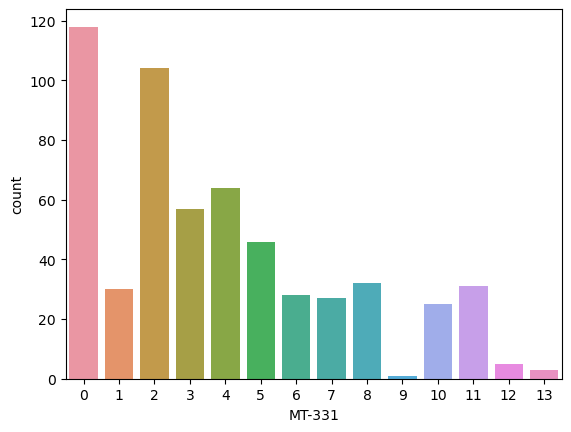

In [84]:
#Visualizing the data of MT-331
ax=sns.countplot(x='MT-331', data= gradesdf)
print(gradesdf['MT-331'].value_counts())

2     112
4      92
5      61
3      59
6      58
7      56
10     49
1      39
9      23
0      14
12      4
11      3
8       1
Name: EF-303, dtype: int64


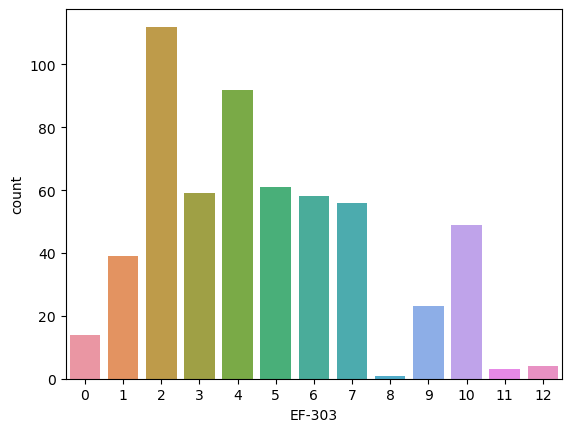

In [85]:
#Visualizing the data of Ef-303
ax=sns.countplot(x='EF-303', data= gradesdf)
print(gradesdf['EF-303'].value_counts())

2     129
3      72
5      70
4      66
6      58
7      53
8      33
0      28
10     24
11     19
12      7
14      5
1       4
13      2
9       1
Name: HS-304, dtype: int64


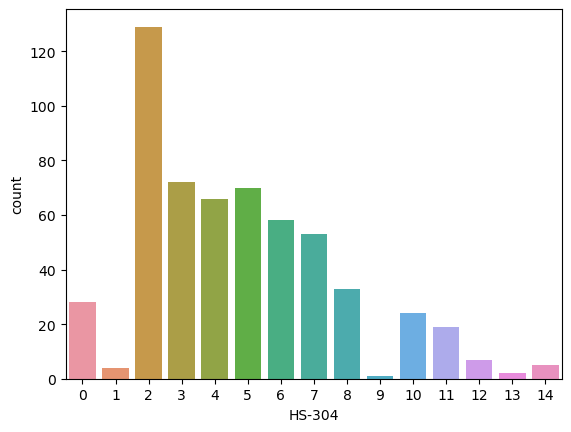

In [86]:
#Visualizing the data of HS-304
ax=sns.countplot(x='HS-304', data= gradesdf)
print(gradesdf['HS-304'].value_counts())

2     109
4      74
3      71
0      66
5      60
6      41
7      37
8      36
10     33
11     29
1       9
13      3
12      2
9       1
Name: CS-301, dtype: int64


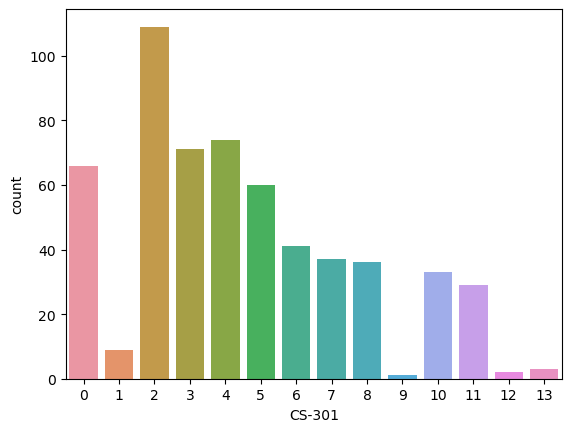

In [87]:
#Visualizing the data of CS-301
ax=sns.countplot(x='CS-301', data= gradesdf)
print(gradesdf['CS-301'].value_counts())

2     114
3     102
0      86
4      81
5      60
7      32
6      28
10     25
8      19
11     10
1       9
13      3
9       1
12      1
Name: CS-302, dtype: int64


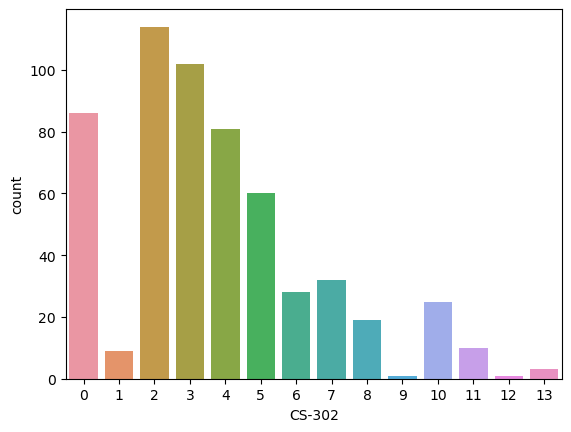

In [88]:
#Visualizing the data of CS-302
ax=sns.countplot(x='CS-302', data= gradesdf)
print(gradesdf['CS-302'].value_counts())

0     105
2      74
4      68
3      59
7      44
11     44
8      42
6      42
5      40
10     24
1      23
13      3
12      2
9       1
Name: TC-383, dtype: int64


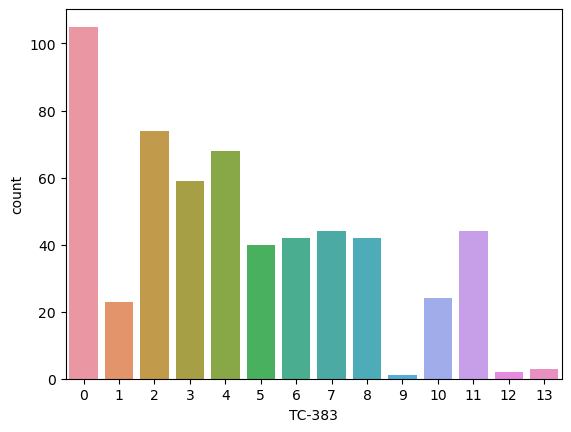

In [89]:
#Visualizing the data of Tc-383
ax=sns.countplot(x='TC-383', data= gradesdf)
print(gradesdf['TC-383'].value_counts())

2     141
0     130
4      65
3      47
1      39
5      30
8      28
7      24
6      24
10     24
11     13
13      3
12      2
9       1
Name: MT-442, dtype: int64


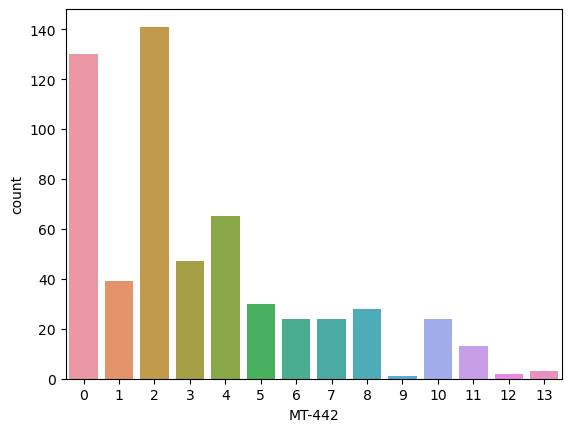

In [90]:
#Visualizing the data of MT-442
ax=sns.countplot(x='MT-442', data= gradesdf)
print(gradesdf['MT-442'].value_counts())

2     97
0     76
4     68
3     67
5     62
6     49
7     38
8     32
10    25
11    22
1     20
12    10
13     4
9      1
Name: EL-332, dtype: int64


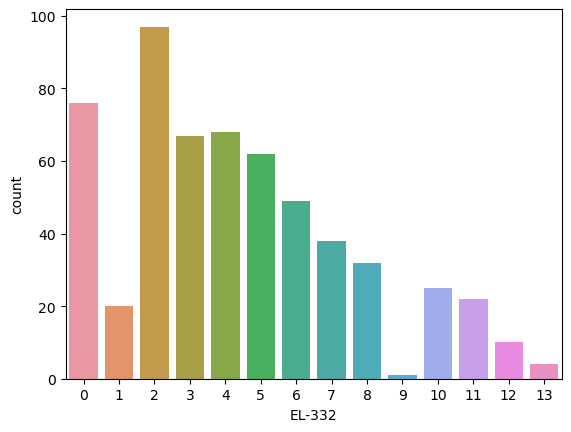

In [91]:
#Visualizing the data of EL-332
ax=sns.countplot(x='EL-332', data= gradesdf)
print(gradesdf['EL-332'].value_counts())

2     90
5     69
3     68
4     65
6     53
7     49
0     42
8     40
10    39
11    29
12    11
14     8
1      6
9      1
13     1
Name: CS-318, dtype: int64


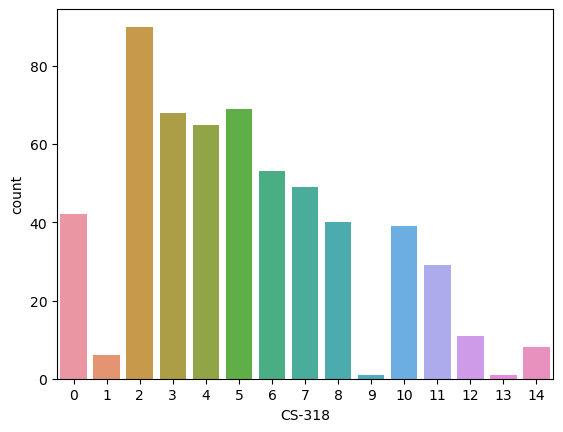

In [92]:
#Visualizing the data of CS-318
ax=sns.countplot(x='CS-318', data= gradesdf)
print(gradesdf['CS-318'].value_counts())

2     121
4      75
0      74
5      64
3      53
8      40
6      37
7      36
10     34
11     18
1      10
13      4
12      4
9       1
Name: CS-306, dtype: int64


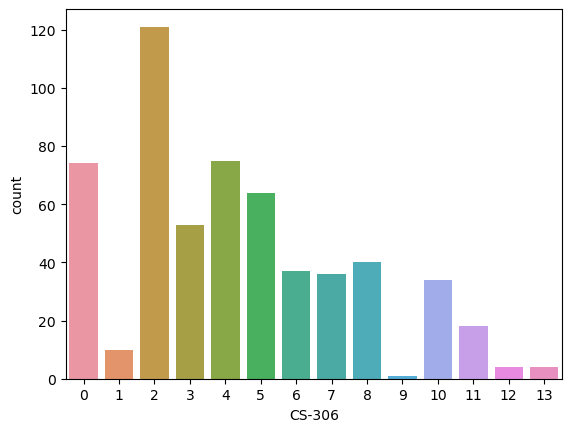

In [93]:
#Visualizing the data of CS-306
ax=sns.countplot(x='CS-306', data= gradesdf)
print(gradesdf['CS-306'].value_counts())

1     93
0     86
2     64
11    52
6     48
8     44
4     42
3     37
7     37
5     36
10    23
14     4
12     3
9      1
13     1
Name: CS-312, dtype: int64


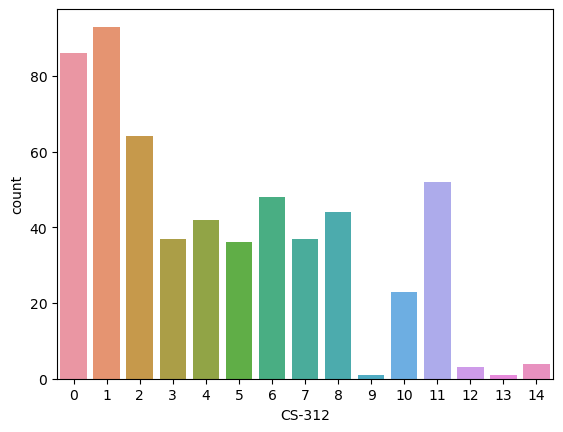

In [94]:
#Visualizing the data of CS-312
ax=sns.countplot(x='CS-312', data= gradesdf)
print(gradesdf['CS-312'].value_counts())

5     79
3     75
6     70
2     67
4     58
7     57
0     48
8     41
11    34
10    21
1      9
12     8
13     3
9      1
Name: CS-317, dtype: int64


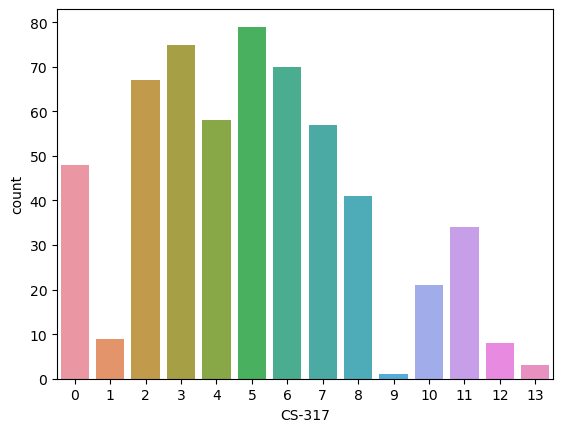

In [95]:
#Visualizing the data of CS-317
ax=sns.countplot(x='CS-317', data= gradesdf)
print(gradesdf['CS-317'].value_counts())

0     134
2     107
4      62
5      55
3      54
11     35
6      33
7      32
8      30
1      15
10      9
13      3
9       1
12      1
Name: CS-403, dtype: int64


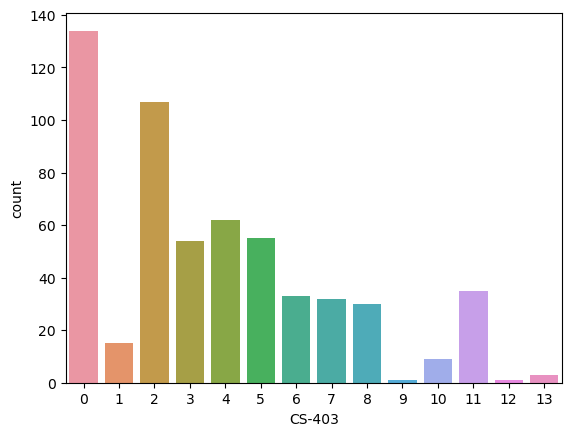

In [96]:
#Visualizing the data of CS-403
ax=sns.countplot(x='CS-403', data= gradesdf)
print(gradesdf['CS-403'].value_counts())

3     86
5     74
6     68
7     61
8     60
4     60
2     48
11    36
10    27
0     25
12    18
14     3
1      2
13     2
9      1
Name: CS-421, dtype: int64


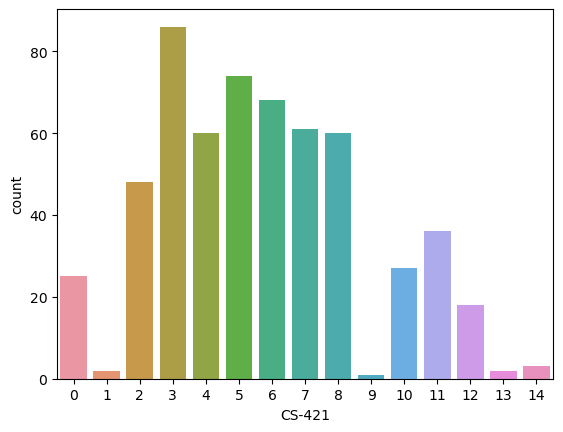

In [97]:
#Visualizing the data of CS-421
ax=sns.countplot(x='CS-421', data= gradesdf)
print(gradesdf['CS-421'].value_counts())

0     177
2     157
4      62
3      54
5      21
1      21
7      21
6      20
8      12
10      9
12      8
14      3
11      3
13      2
9       1
Name: CS-414, dtype: int64


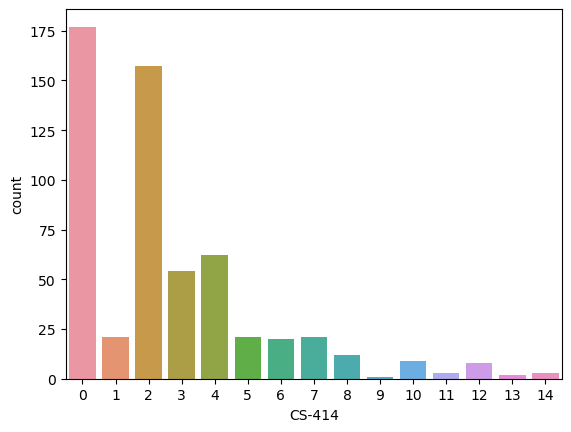

In [98]:
#Visualizing the data of CS-414
ax=sns.countplot(x='CS-414', data= gradesdf)
print(gradesdf['CS-414'].value_counts())

2     121
3      89
4      85
5      78
0      57
7      46
6      40
8      20
10     13
11     13
13      3
12      3
1       2
9       1
Name: CS-419, dtype: int64


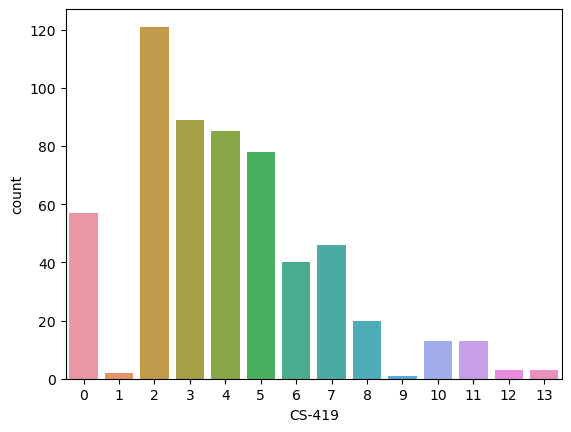

In [99]:
#Visualizing the data of CS-419
ax=sns.countplot(x='CS-419', data= gradesdf)
print(gradesdf['CS-419'].value_counts())

2     123
0      79
4      75
3      65
5      56
6      45
7      39
8      29
11     25
10     22
12      6
13      3
1       3
9       1
Name: CS-423, dtype: int64


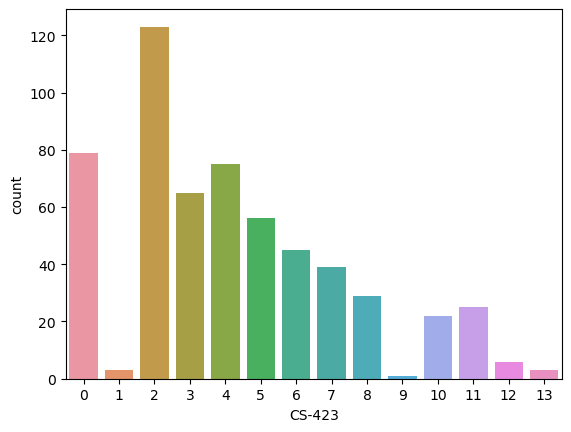

In [100]:
#visualizing the data of CS-423
ax= sns.countplot(x='CS-423', data=gradesdf)
print(gradesdf['CS-423'].value_counts())

Bivariant analysis

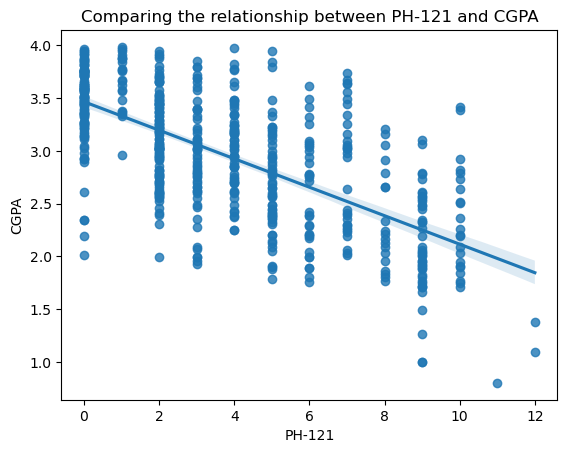

In [101]:
#Analysing the relation between PH-121 and CGPA
plt.title("Comparing the relationship between PH-121 and CGPA")
ax= sns.regplot(x='PH-121', y='CGPA', data=gradesdf)
plt.xlabel('PH-121')
plt.ylabel("CGPA")
plt.show()

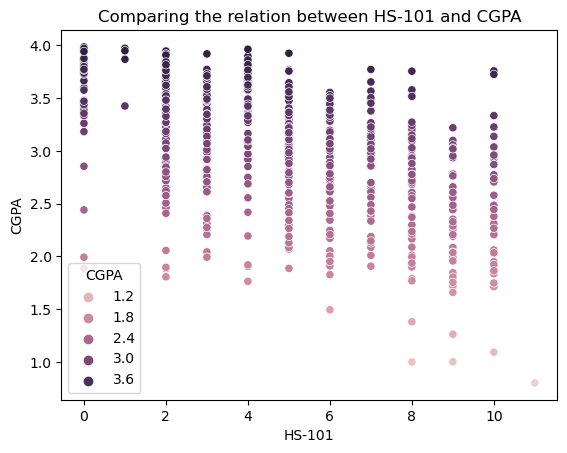

In [102]:
#Analysing the relationship between 'HS-101' sand CGPA
plt.title("Comparing the relation between HS-101 and CGPA")
ax= sns.scatterplot(x='HS-101', y='CGPA', hue='CGPA',data=gradesdf)
plt.xlabel('HS-101')
plt.ylabel('CGPA')
plt.show()

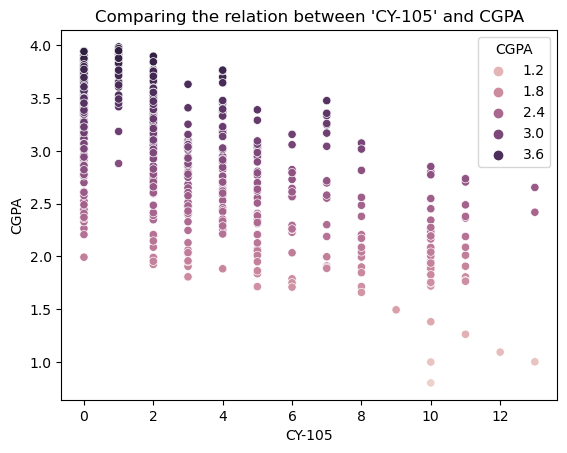

In [103]:
#Analysis the relationship between 'CY-105' and CGPA
plt.title("Comparing the relation between 'CY-105' and CGPA")
ax=sns.scatterplot(x='CY-105', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CY-105')
plt.ylabel('CGPA')
plt.show()

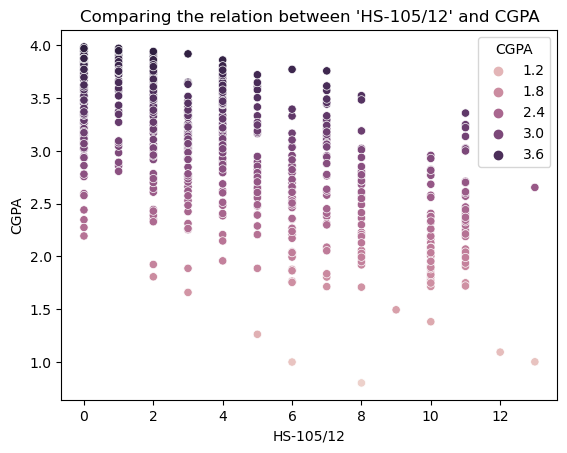

In [104]:
#Analysis the relationship between 'HS-105/12' and CGPA
plt.title("Comparing the relation between 'HS-105/12' and CGPA")
ax=sns.scatterplot(x='HS-105/12', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('HS-105/12')
plt.ylabel('CGPA')
plt.show()

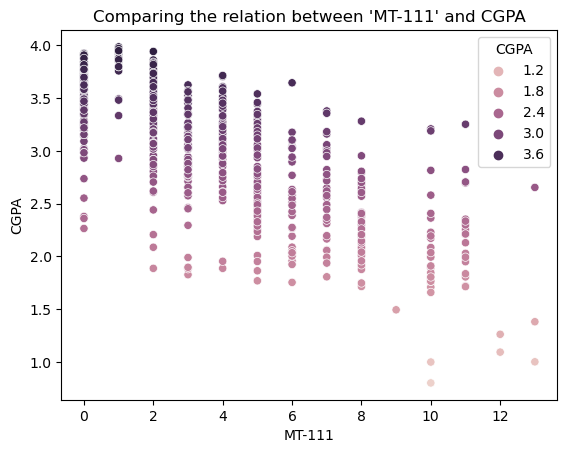

In [105]:
#Analysis the relationship between 'MT-111' and CGPA
plt.title("Comparing the relation between 'MT-111' and CGPA")
ax=sns.scatterplot(x='MT-111', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('MT-111')
plt.ylabel('CGPA')
plt.show()

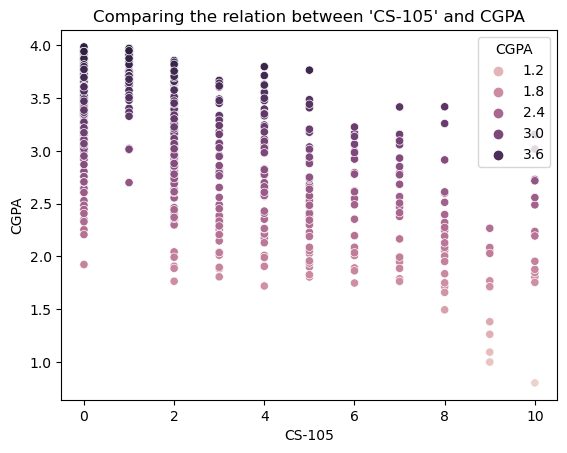

In [106]:
#Analysis the relationship between 'CS-105' and CGPA
plt.title("Comparing the relation between 'CS-105' and CGPA")
ax=sns.scatterplot(x='CS-105', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-105')
plt.ylabel('CGPA')
plt.show()

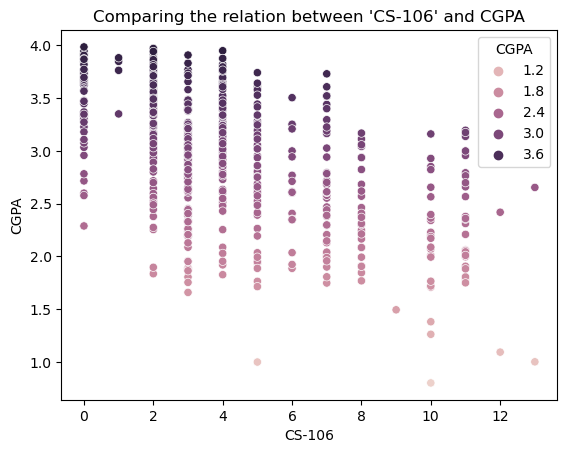

In [107]:
#Analysis the relationship between 'CS-106' and CGPA
plt.title("Comparing the relation between 'CS-106' and CGPA")
ax=sns.scatterplot(x='CS-106', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-106')
plt.ylabel('CGPA')
plt.show()

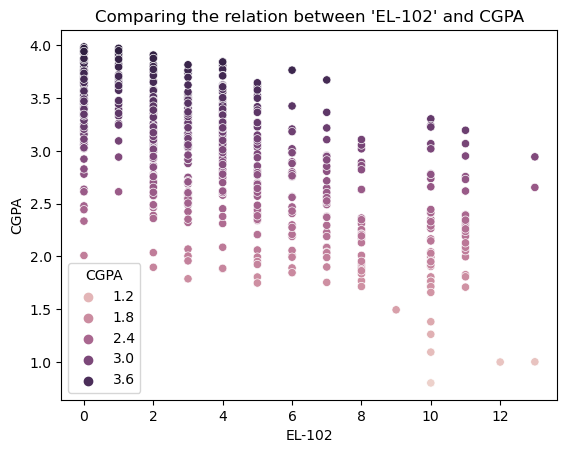

In [108]:
#Analysis the relationship between 'EL-102' and CGPA
plt.title("Comparing the relation between 'EL-102' and CGPA")
ax=sns.scatterplot(x='EL-102', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('EL-102')
plt.ylabel('CGPA')
plt.show()

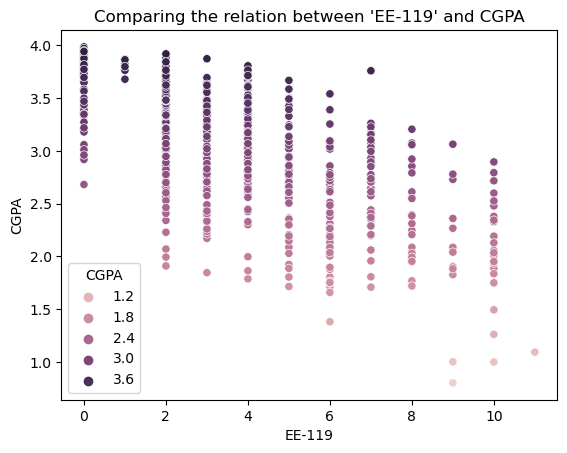

In [109]:
#Analysis the relationship between 'EE-119' and CGPA
plt.title("Comparing the relation between 'EE-119' and CGPA")
ax=sns.scatterplot(x='EE-119', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('EE-119')
plt.ylabel('CGPA')
plt.show()

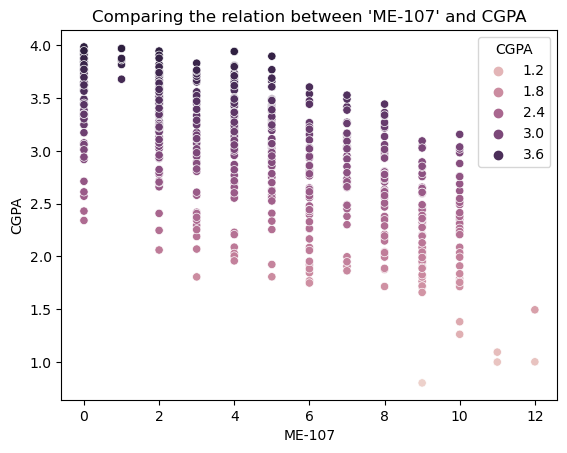

In [110]:
#Analysis the relationship between 'ME-107' and CGPA
plt.title("Comparing the relation between 'ME-107' and CGPA")
ax=sns.scatterplot(x='ME-107', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('ME-107')
plt.ylabel('CGPA')
plt.show()

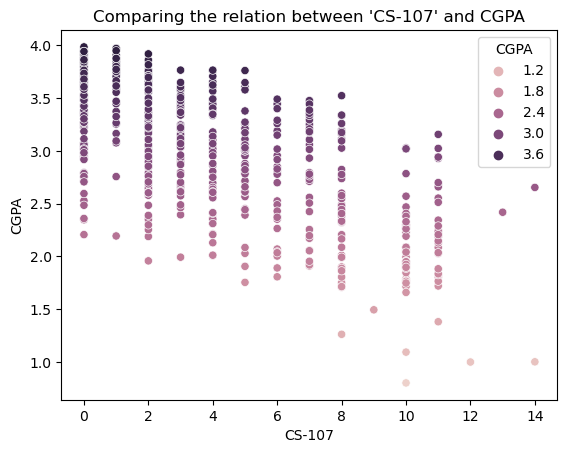

In [111]:
#Analysis the relationship between 'CS-107' and CGPA
plt.title("Comparing the relation between 'CS-107' and CGPA")
ax=sns.scatterplot(x='CS-107', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-107')
plt.ylabel('CGPA')
plt.show()

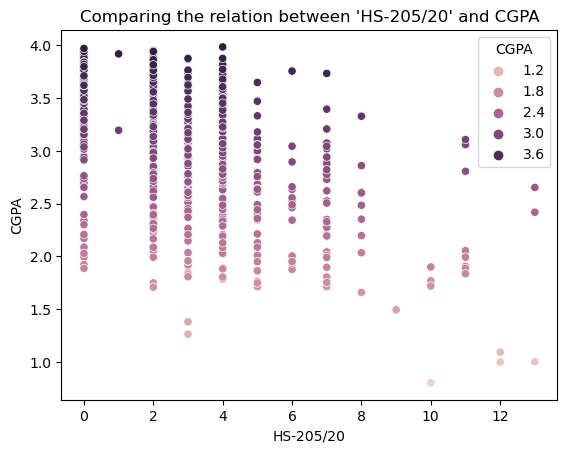

In [112]:
#Analysis the relationship between 'CHS-205/20' and CGPA
plt.title("Comparing the relation between 'HS-205/20' and CGPA")
ax=sns.scatterplot(x='HS-205/20', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('HS-205/20')
plt.ylabel('CGPA')
plt.show()

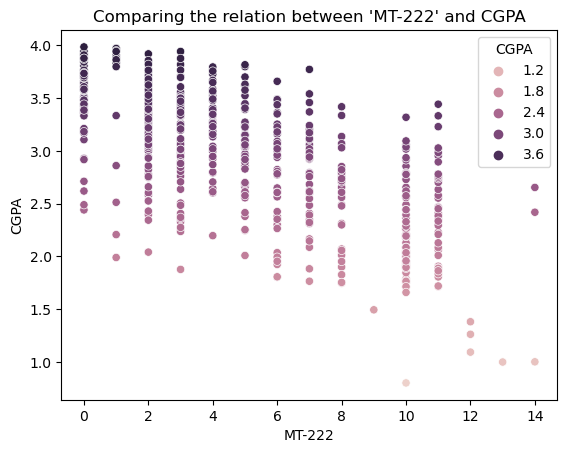

In [113]:
#Analysis the relationship between 'MT-222' and CGPA
plt.title("Comparing the relation between 'MT-222' and CGPA")
ax=sns.scatterplot(x='MT-222', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('MT-222')
plt.ylabel('CGPA')
plt.show()

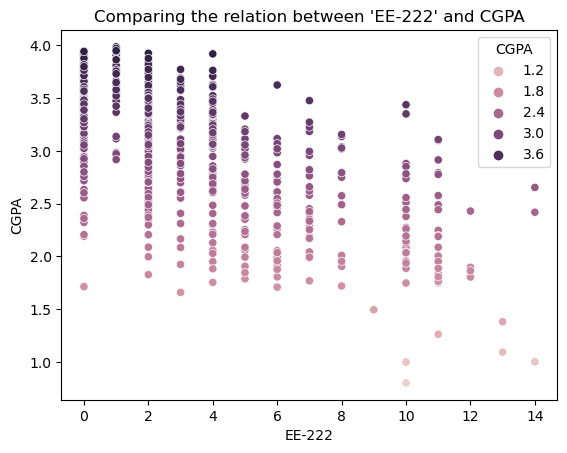

In [114]:
#Analysis the relationship between 'EE-222' and CGPA
plt.title("Comparing the relation between 'EE-222' and CGPA")
ax=sns.scatterplot(x='EE-222', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('EE-222')
plt.ylabel('CGPA')
plt.show()

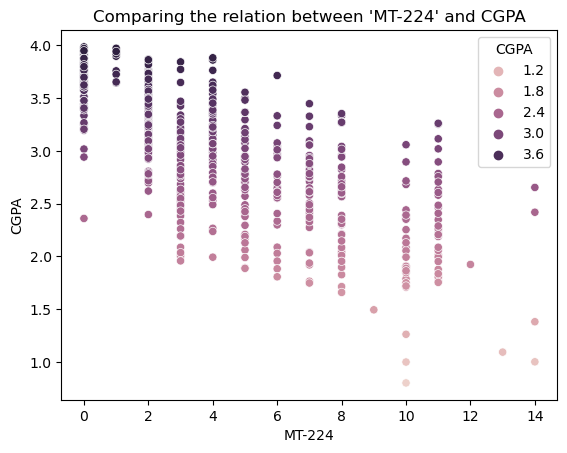

In [115]:
#Analysis the relationship between 'MT-224' and CGPA
plt.title("Comparing the relation between 'MT-224' and CGPA")
ax=sns.scatterplot(x='MT-224', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('MT-224')
plt.ylabel('CGPA')
plt.show()

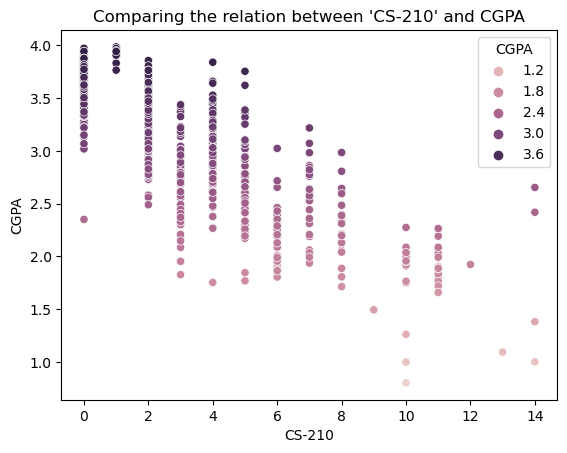

In [116]:
#Analysis the relationship between 'CS-210' and CGPA
plt.title("Comparing the relation between 'CS-210' and CGPA")
ax=sns.scatterplot(x='CS-210', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-210')
plt.ylabel('CGPA')
plt.show()

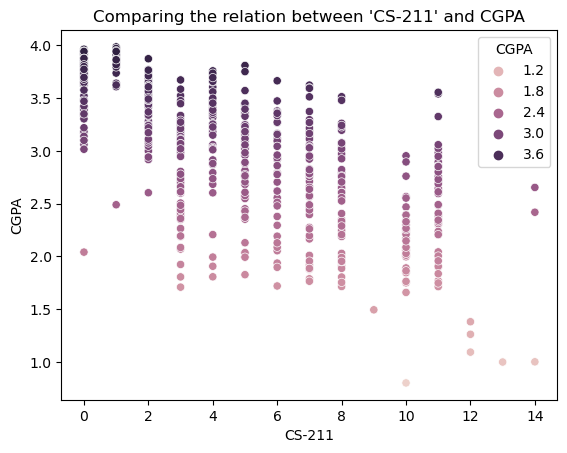

In [117]:
#Analysis the relationship between 'CS-211' and CGPA
plt.title("Comparing the relation between 'CS-211' and CGPA")
ax=sns.scatterplot(x='CS-211', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-211')
plt.ylabel('CGPA')
plt.show()

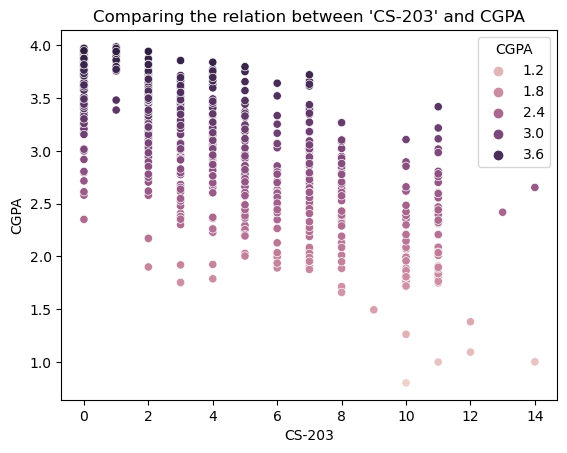

In [118]:
#Analysis the relationship between 'CS-203' and CGPA
plt.title("Comparing the relation between 'CS-203' and CGPA")
ax=sns.scatterplot(x='CS-203', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-203')
plt.ylabel('CGPA')
plt.show()

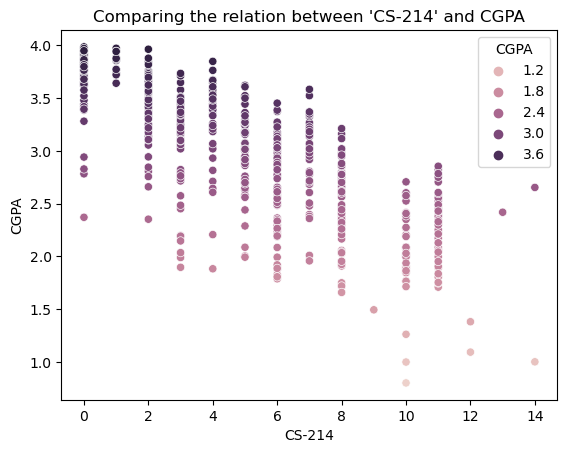

In [119]:
#Analysis the relationship between 'CS-214' and CGPA
plt.title("Comparing the relation between 'CS-214' and CGPA")
ax=sns.scatterplot(x='CS-214', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-214')
plt.ylabel('CGPA')
plt.show()

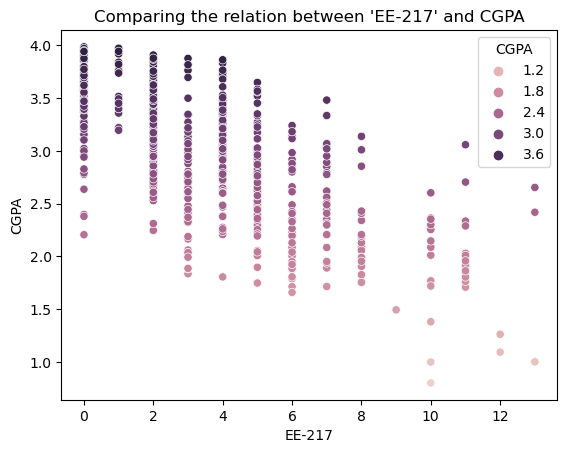

In [120]:
#Analysis the relationship between 'EE-217' and CGPA
plt.title("Comparing the relation between 'EE-217' and CGPA")
ax=sns.scatterplot(x='EE-217', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('EE-217')
plt.ylabel('CGPA')
plt.show()

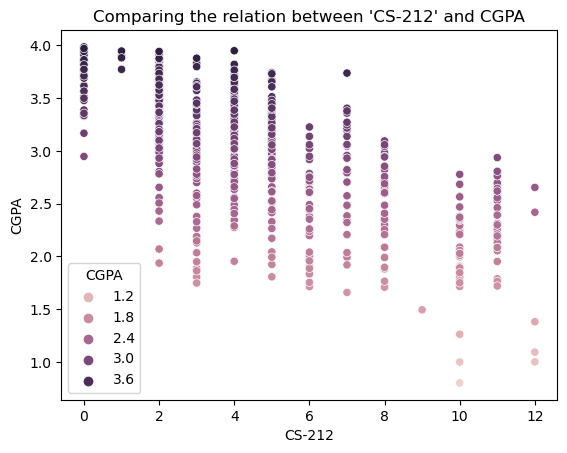

In [121]:
#Analysis the relationship between 'CS-212' and CGPA
plt.title("Comparing the relation between 'CS-212' and CGPA")
ax=sns.scatterplot(x='CS-212', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-212')
plt.ylabel('CGPA')
plt.show()

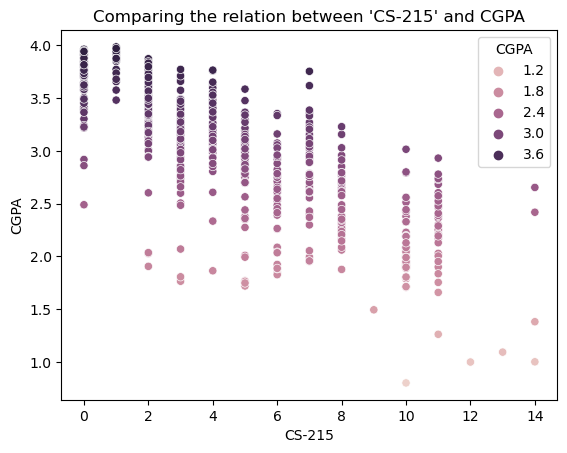

In [122]:
#Analysis the relationship between 'CS-215' and CGPA
plt.title("Comparing the relation between 'CS-215' and CGPA")
ax=sns.scatterplot(x='CS-215', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-215')
plt.ylabel('CGPA')
plt.show()

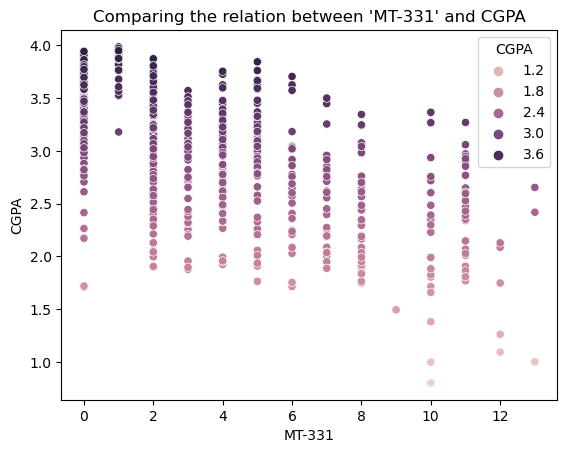

In [123]:
#Analysis the relationship between 'MT-331' and CGPA
plt.title("Comparing the relation between 'MT-331' and CGPA")
ax=sns.scatterplot(x='MT-331', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('MT-331')
plt.ylabel('CGPA')
plt.show()

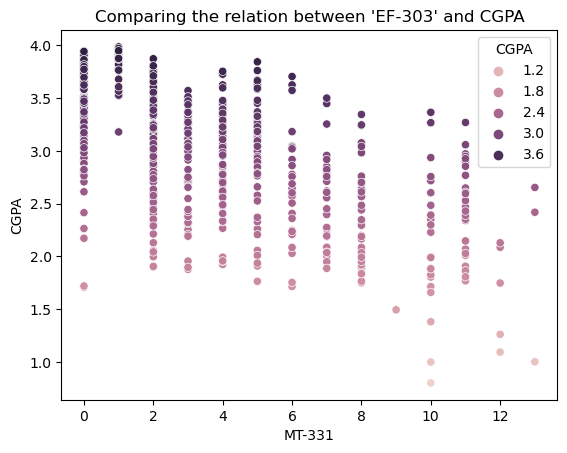

In [124]:
#Analysis the relationship between 'EF-303' and CGPA
plt.title("Comparing the relation between 'EF-303' and CGPA")
ax=sns.scatterplot(x='MT-331', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('MT-331')
plt.ylabel('CGPA')
plt.show()

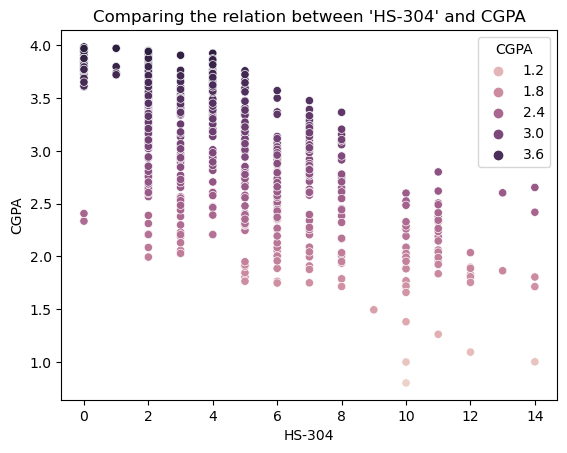

In [125]:
#Analysis the relationship between 'HS-304' and CGPA
plt.title("Comparing the relation between 'HS-304' and CGPA")
ax=sns.scatterplot(x='HS-304', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('HS-304')
plt.ylabel('CGPA')
plt.show()

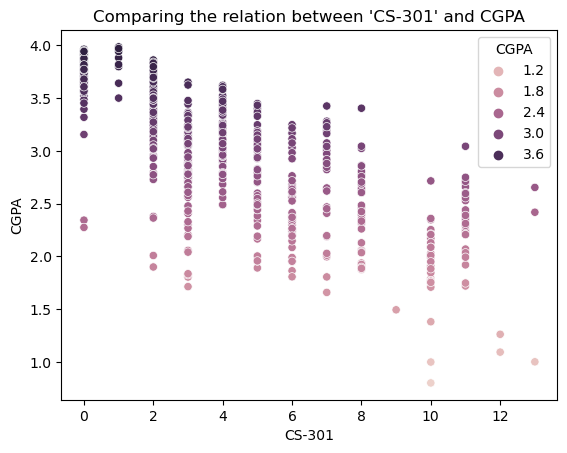

In [126]:
#Analysis the relationship between 'CS-301' and CGPA
plt.title("Comparing the relation between 'CS-301' and CGPA")
ax=sns.scatterplot(x='CS-301', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-301')
plt.ylabel('CGPA')
plt.show()

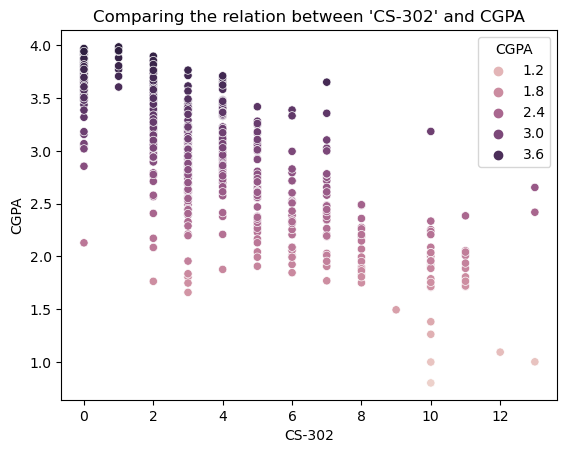

In [127]:
#Analysis the relationship between 'CS-302' and CGPA
plt.title("Comparing the relation between 'CS-302' and CGPA")
ax=sns.scatterplot(x='CS-302', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-302')
plt.ylabel('CGPA')
plt.show()

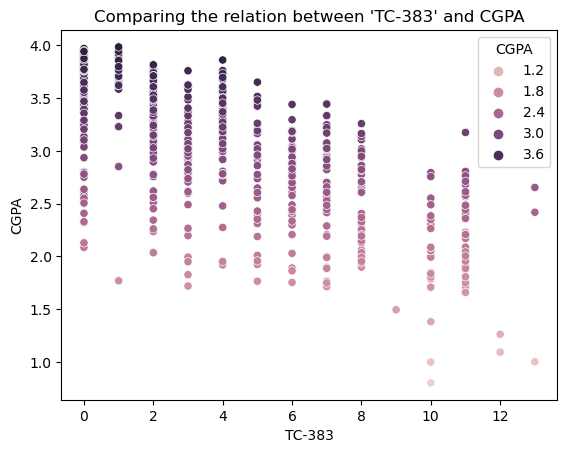

In [128]:
#Analysis the relationship between 'TC-383' and CGPA
plt.title("Comparing the relation between 'TC-383' and CGPA")
ax=sns.scatterplot(x='TC-383', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('TC-383')
plt.ylabel('CGPA')
plt.show()

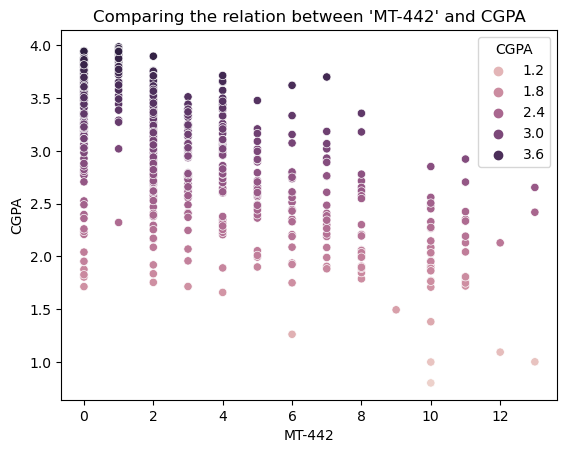

In [129]:
#Analysis the relationship between 'MT-442' and CGPA
plt.title("Comparing the relation between 'MT-442' and CGPA")
ax=sns.scatterplot(x='MT-442', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('MT-442')
plt.ylabel('CGPA')
plt.show()

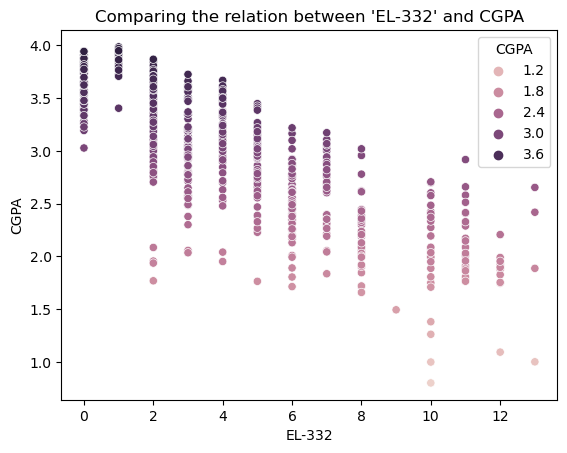

In [130]:
#Analysis the relationship between 'EL-332' and CGPA
plt.title("Comparing the relation between 'EL-332' and CGPA")
ax=sns.scatterplot(x='EL-332', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('EL-332')
plt.ylabel('CGPA')
plt.show()

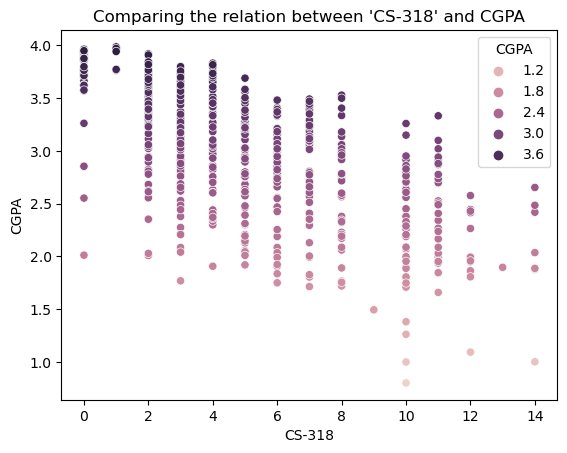

In [131]:
#Analysis the relationship between 'CS-318' and CGPA
plt.title("Comparing the relation between 'CS-318' and CGPA")
ax=sns.scatterplot(x='CS-318', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-318')
plt.ylabel('CGPA')
plt.show()

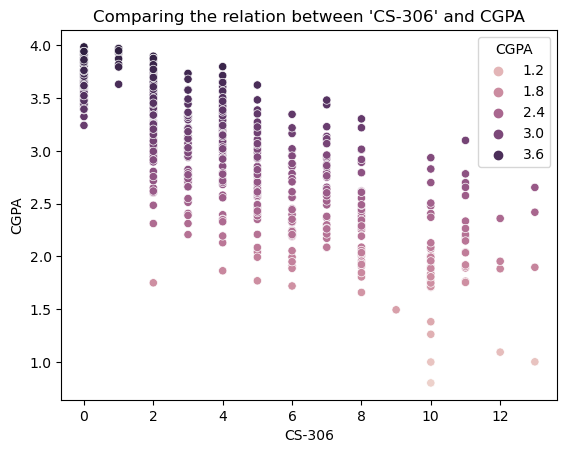

In [132]:
#Analysis the relationship between 'CS-306' and CGPA
plt.title("Comparing the relation between 'CS-306' and CGPA")
ax=sns.scatterplot(x='CS-306', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-306')
plt.ylabel('CGPA')
plt.show()

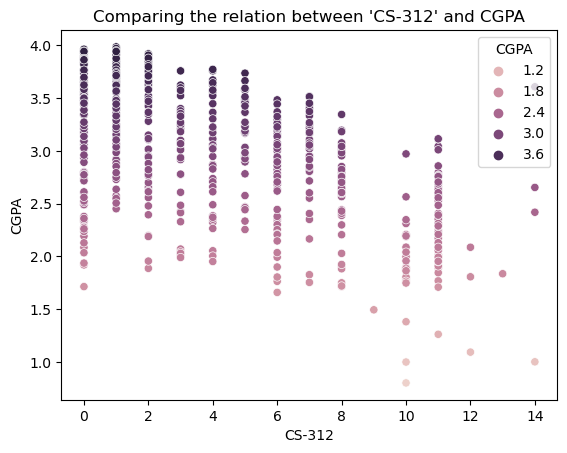

In [133]:
#Analysis the relationship between 'CS-312' and CGPA
plt.title("Comparing the relation between 'CS-312' and CGPA")
ax=sns.scatterplot(x='CS-312', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-312')
plt.ylabel('CGPA')
plt.show()

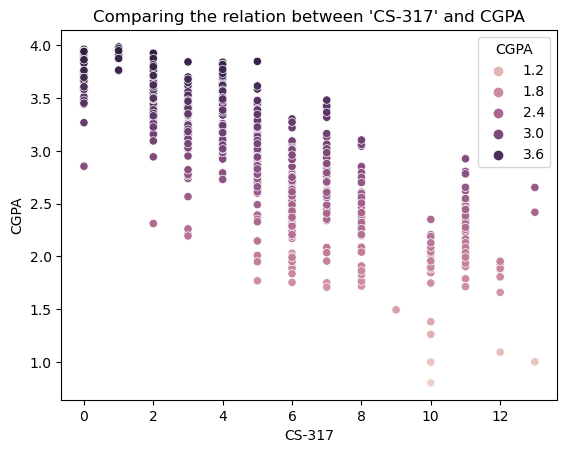

In [134]:
#Analysis the relationship between 'CS-317' and CGPA
plt.title("Comparing the relation between 'CS-317' and CGPA")
ax=sns.scatterplot(x='CS-317', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-317')
plt.ylabel('CGPA')
plt.show()

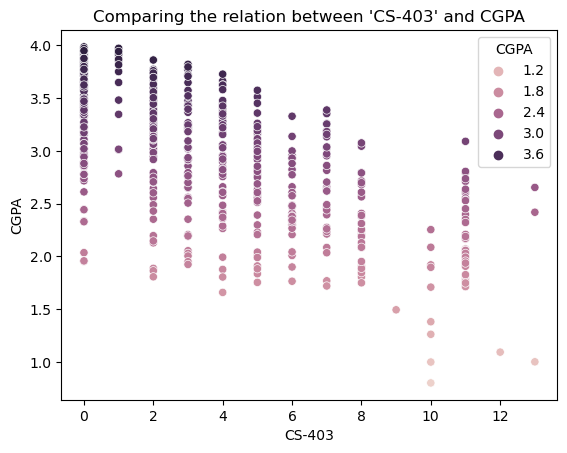

In [135]:
#Analysis the relationship between 'CS-403' and CGPA
plt.title("Comparing the relation between 'CS-403' and CGPA")
ax=sns.scatterplot(x='CS-403', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-403')
plt.ylabel('CGPA')
plt.show()

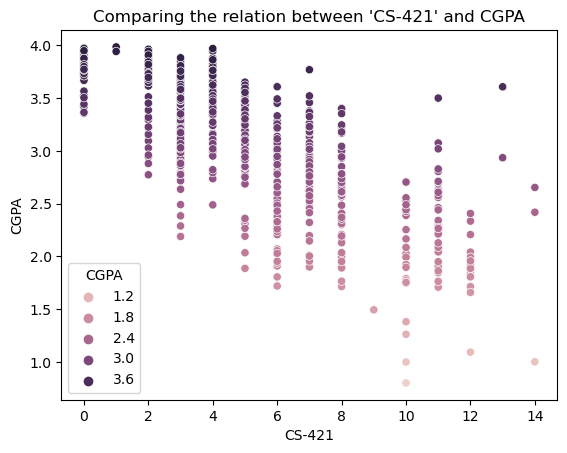

In [136]:
#Analysis the relationship between 'CS-421' and CGPA
plt.title("Comparing the relation between 'CS-421' and CGPA")
ax=sns.scatterplot(x='CS-421', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-421')
plt.ylabel('CGPA')
plt.show()

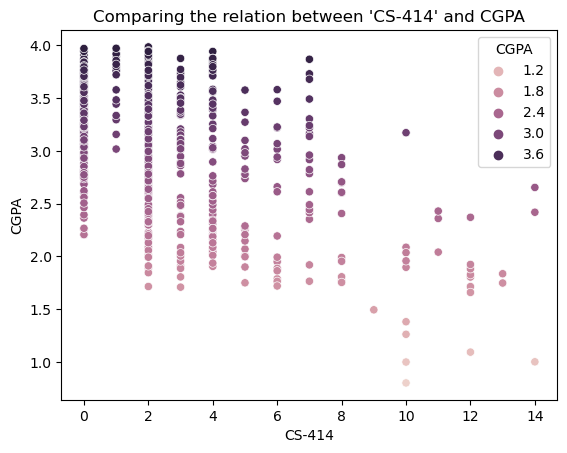

In [137]:
#Analysis the relationship between 'CS-414' and CGPA
plt.title("Comparing the relation between 'CS-414' and CGPA")
ax=sns.scatterplot(x='CS-414', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-414')
plt.ylabel('CGPA')
plt.show()

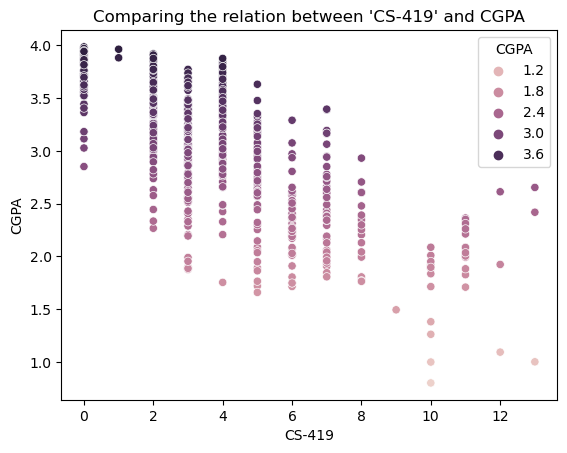

In [138]:
#Analysis the relationship between 'CS-419' and CGPA
plt.title("Comparing the relation between 'CS-419' and CGPA")
ax=sns.scatterplot(x='CS-419', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-419')
plt.ylabel('CGPA')
plt.show()

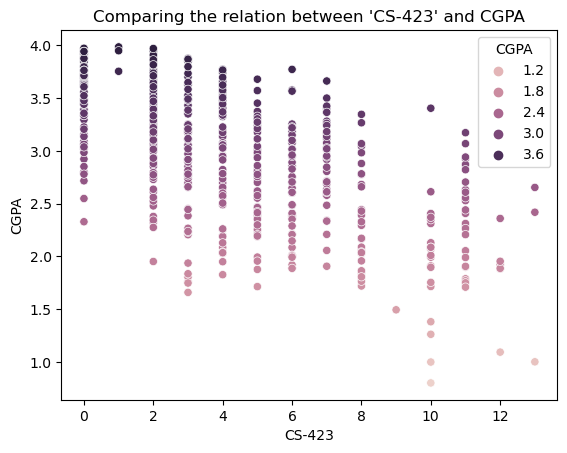

In [139]:
#Analysis the relationship between 'CS-423' and CGPA
plt.title("Comparing the relation between 'CS-423' and CGPA")
ax=sns.scatterplot(x='CS-423', y='CGPA', hue='CGPA', data=gradesdf)
plt.xlabel('CS-423')
plt.ylabel('CGPA')
plt.show()

In [140]:
gradesdf.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.781086    5.071804    3.000000    4.401051    4.014011    2.838879   
std      3.046895    2.785317    3.170589    3.447643    3.187114    2.696709   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    4.000000    2.000000   
75%      6.000000    7.000000    5.000000    7.000000    6.000000    4.000000   
max     12.000000   11.000000   13.000000   13.000000   13.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-318  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     4.250438    4.099825    3.910683    4.791594  ...    5.168126   
std      2.956761    3.263114    2.672290    3.148990  ...    3.290566   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    3.000000   
50%      4.000000    4.000000    3.000000    5.000000  ...    5.000000   
75%      6.000000    6.000000    6.000000    8.000000  ...    7.000000   
max     13.000000   13.000000   11.000000   12.000000  ...   14.000000   

           CS-306      CS-312      CS-317      CS-403      CS-421      CS-414  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     4.329247    4.369527    5.026270    3.697023    5.674256    2.642732   
std      3.144503    3.691391    3.055224    3.253766    3.056604    2.841768   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    3.000000    1.000000    3.000000    0.000000   
50%      4.000000    4.000000    5.000000    3.000000    5.000000    2.000000   
75%      6.000000    7.000000    7.000000    6.000000    8.000000    4.000000   
max     13.000000   14.000000   13.000000   13.000000   14.000000   14.000000   

           CS-419      CS-423        CGPA  
count  571.000000  571.000000  571.000000  
mean     4.063047    4.227671    2.954888  
std      2.661529    3.117129    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.000000    2.000000    2.538000  
50%      4.000000    4.000000    3.029000  
75%      5.000000    6.000000    3.451000  
max     13.000000   13.000000    3.985000  

[8 rows x 40 columns]

Here are some observations from the above data:
    1. The count shows that every column contains 571 rows
    2. It is seen that the mean data is less than the median value that shows that the data is Left skewed.
    3. For some columns the mean data is higher than the median value which shows that the data is right skewed.
    4. There are a significant difference between 75% to max value this shows that the data has outliers

Checking for outliers

<AxesSubplot:>

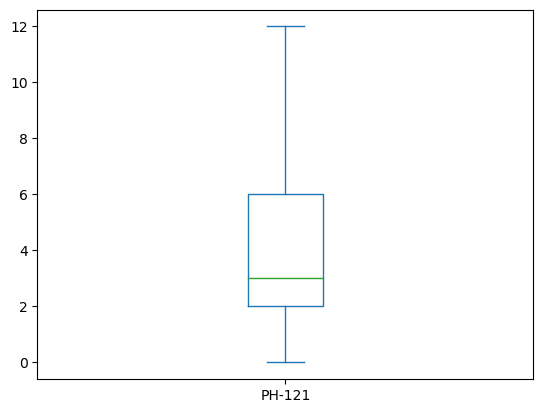

In [141]:
gradesdf['PH-121'].plot.box()

<AxesSubplot:>

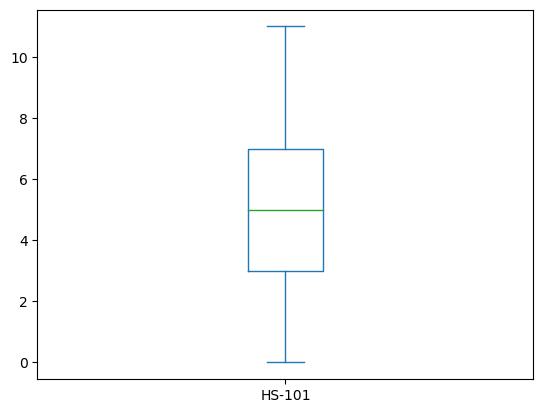

In [142]:
gradesdf['HS-101'].plot.box()

<AxesSubplot:>

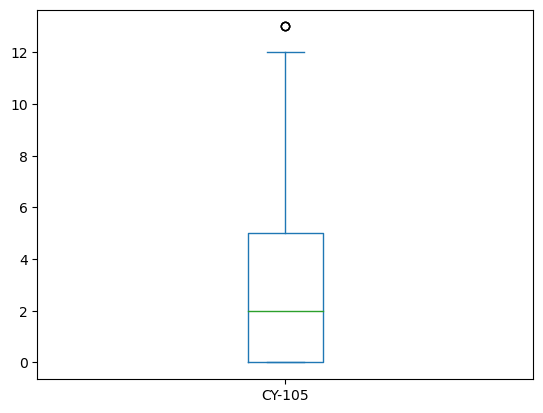

In [143]:
gradesdf['CY-105'].plot.box()

<AxesSubplot:>

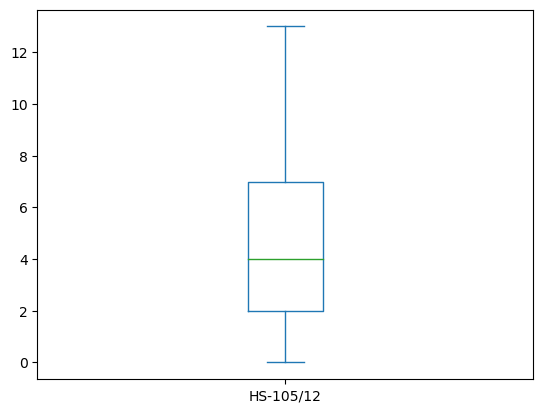

In [144]:
gradesdf['HS-105/12'].plot.box()

<AxesSubplot:>

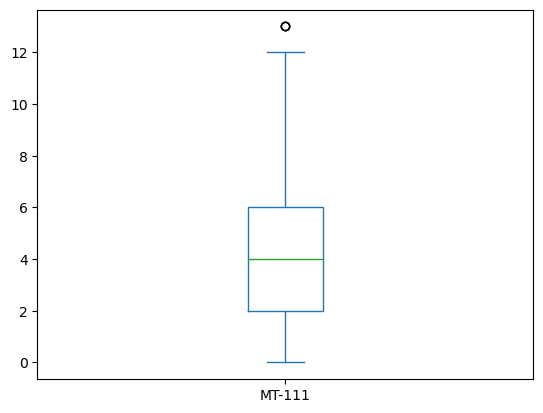

In [145]:
gradesdf['MT-111'].plot.box()

<AxesSubplot:>

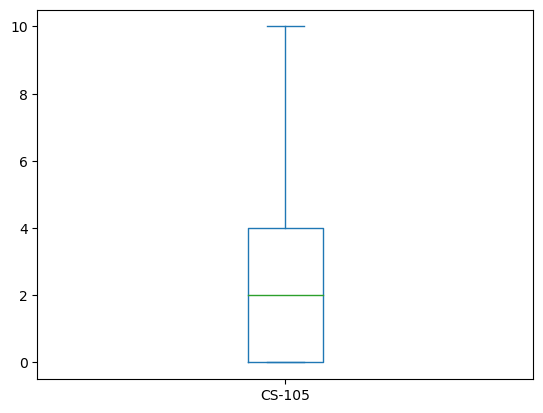

In [146]:
gradesdf['CS-105'].plot.box()

<AxesSubplot:>

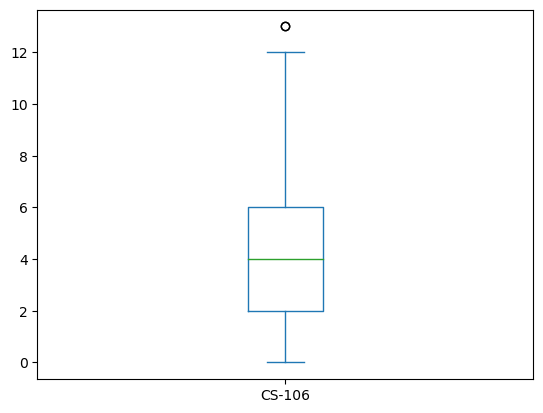

In [147]:
gradesdf['CS-106'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

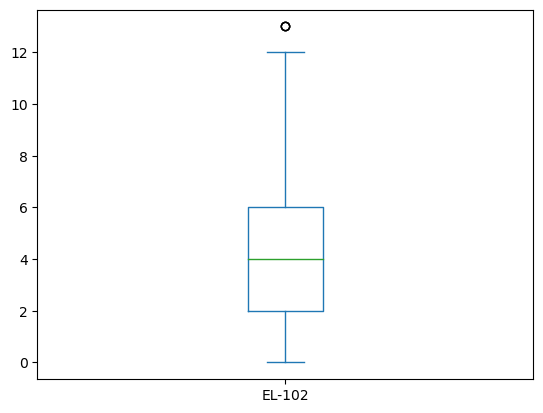

In [148]:
gradesdf['EL-102'].plot.box()

<AxesSubplot:>

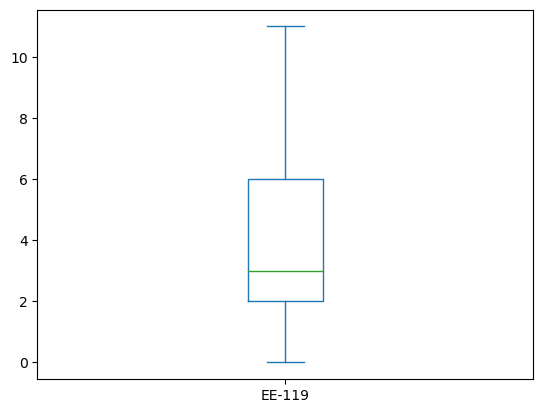

In [149]:
gradesdf['EE-119'].plot.box()

<AxesSubplot:>

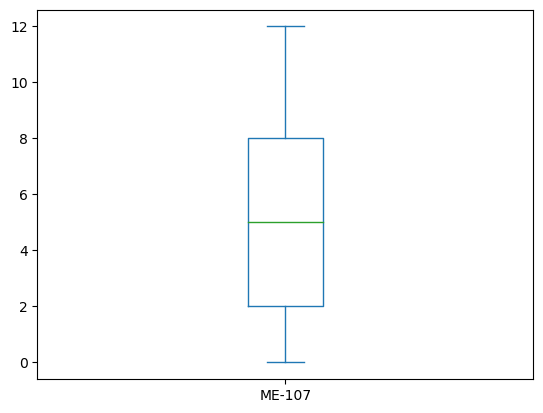

In [150]:
gradesdf['ME-107'].plot.box()

<AxesSubplot:>

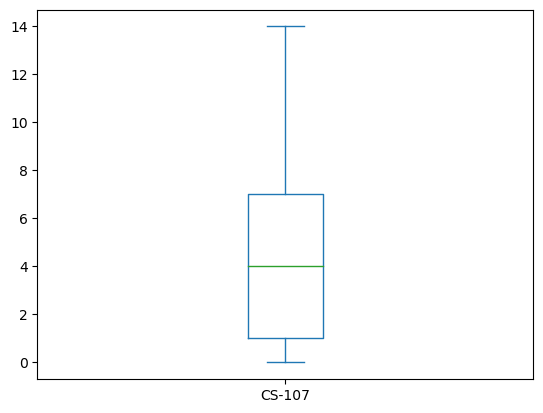

In [151]:
gradesdf['CS-107'].plot.box()

<AxesSubplot:>

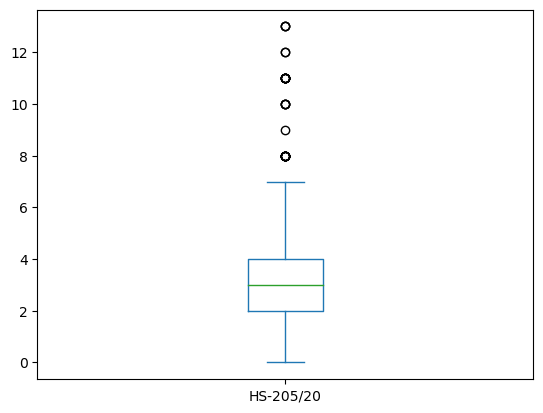

In [152]:
gradesdf['HS-205/20'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

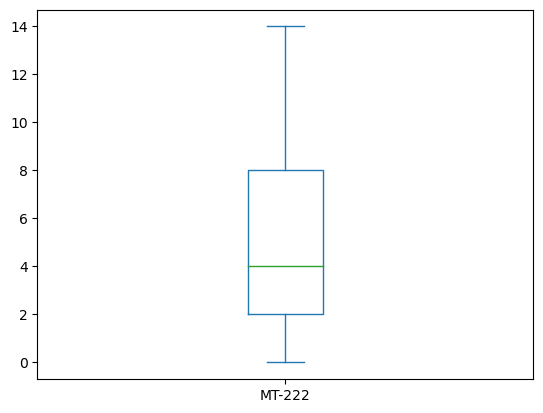

In [153]:
gradesdf['MT-222'].plot.box()

<AxesSubplot:>

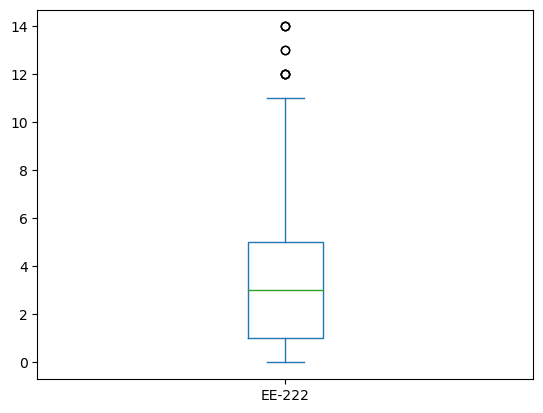

In [154]:
gradesdf['EE-222'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

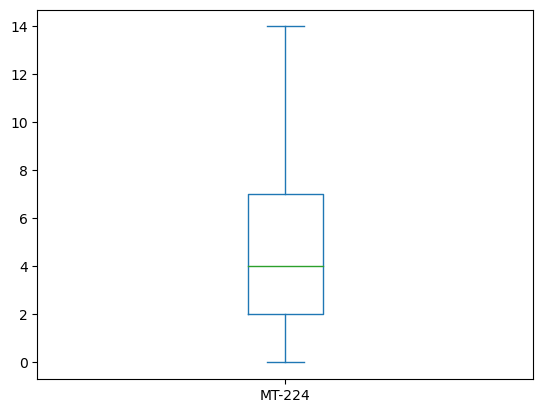

In [155]:
gradesdf['MT-224'].plot.box()

<AxesSubplot:>

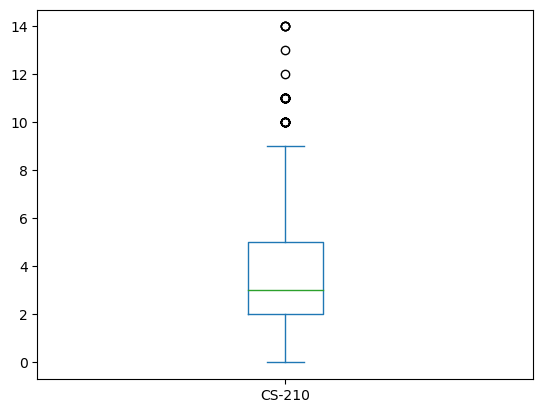

In [156]:
gradesdf['CS-210'].plot.box()

<AxesSubplot:>

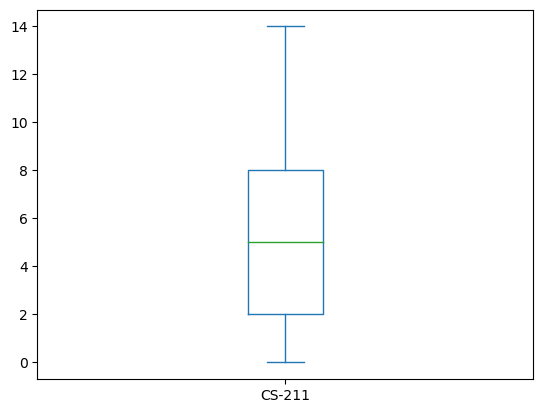

In [157]:
gradesdf['CS-211'].plot.box()

<AxesSubplot:>

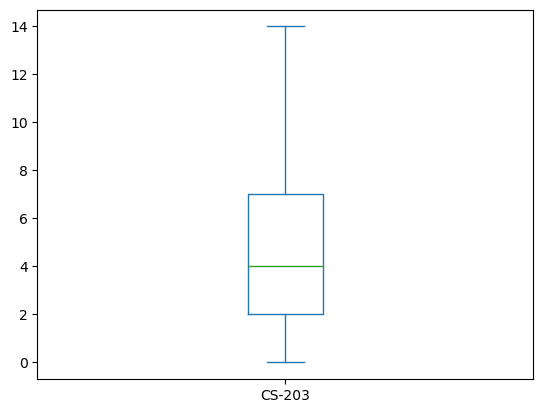

In [158]:
gradesdf['CS-203'].plot.box()

<AxesSubplot:>

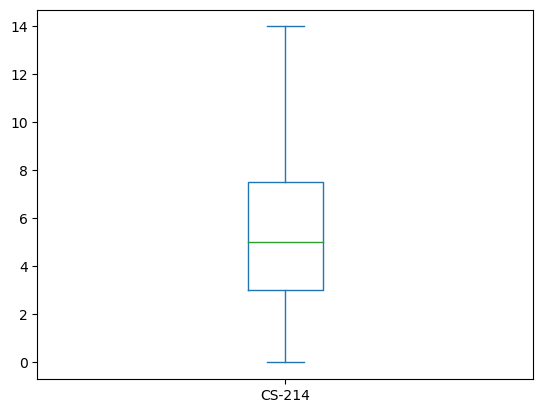

In [159]:
gradesdf['CS-214'].plot.box()

<AxesSubplot:>

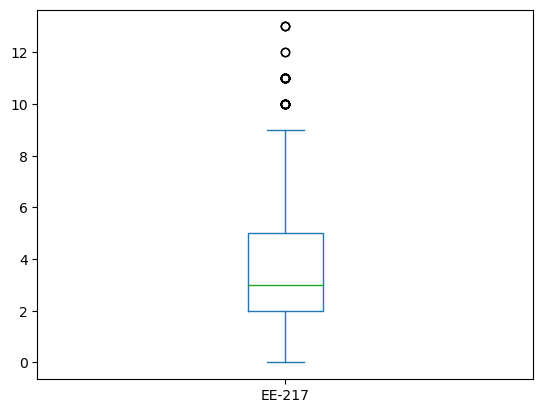

In [160]:
gradesdf['EE-217'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

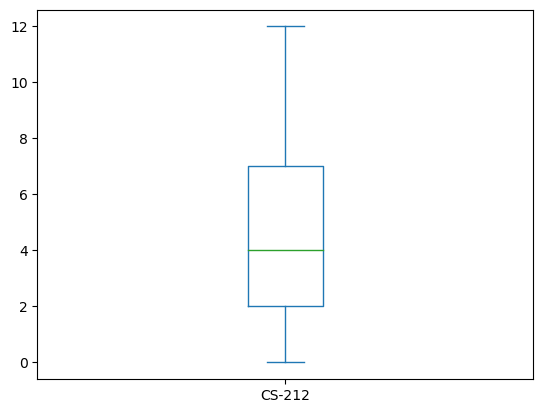

In [161]:
gradesdf['CS-212'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

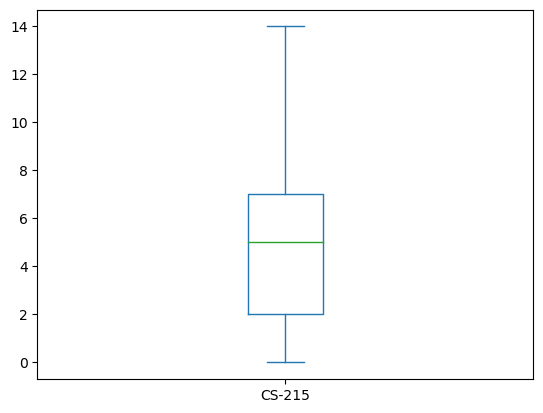

In [162]:
gradesdf['CS-215'].plot.box()

<AxesSubplot:>

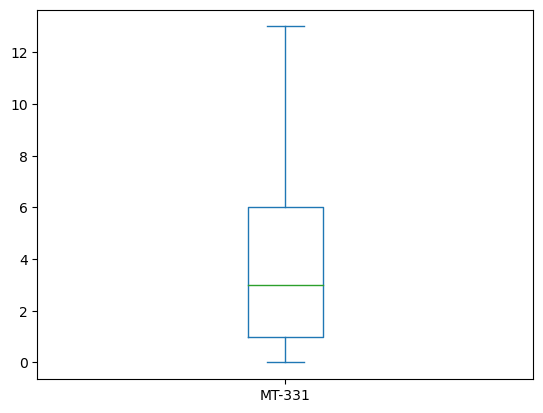

In [163]:
gradesdf['MT-331'].plot.box()

<AxesSubplot:>

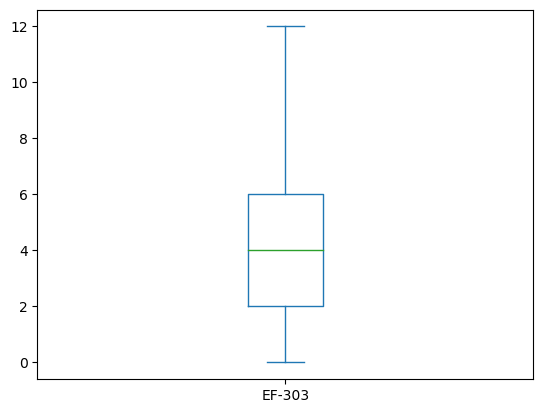

In [164]:
gradesdf['EF-303'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

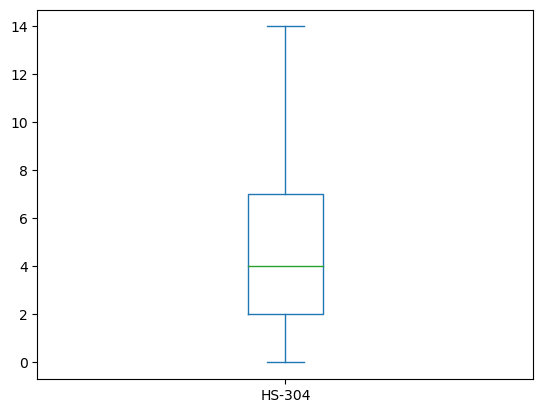

In [165]:
gradesdf['HS-304'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

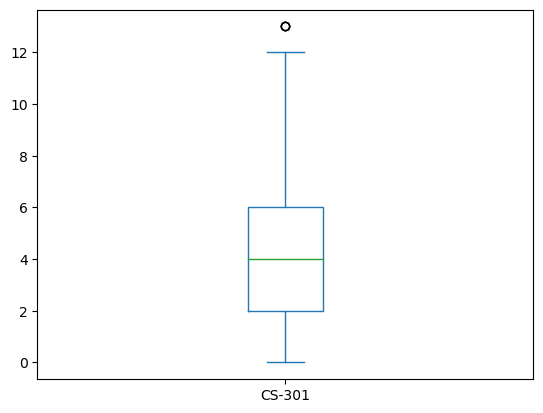

In [166]:
gradesdf['CS-301'].plot.box()

It is observed that there are outliers present it in the data

<AxesSubplot:>

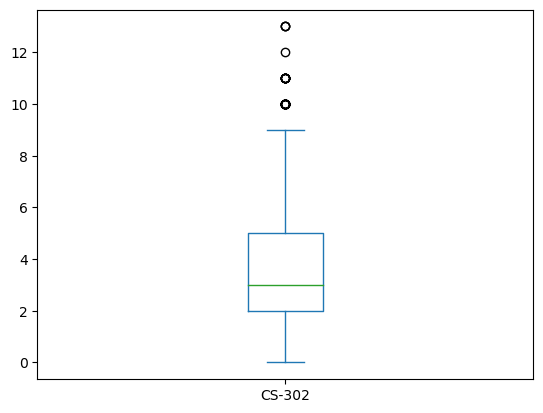

In [167]:
gradesdf['CS-302'].plot.box()

It is observed that there are outliers present it in the data

<AxesSubplot:>

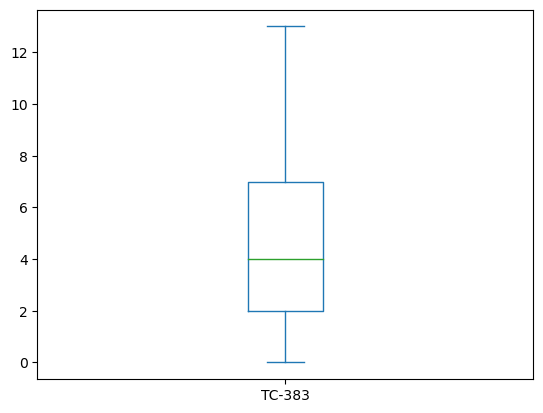

In [168]:
gradesdf['TC-383'].plot.box()

<AxesSubplot:>

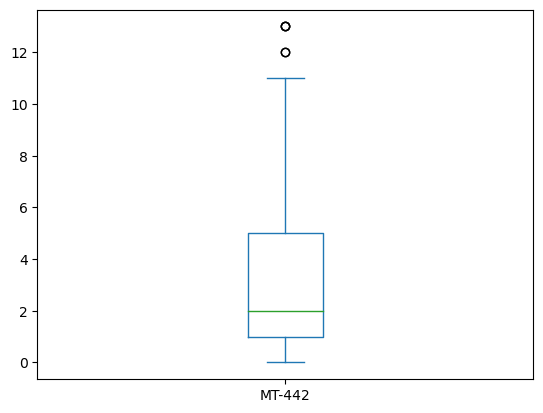

In [169]:
gradesdf['MT-442'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

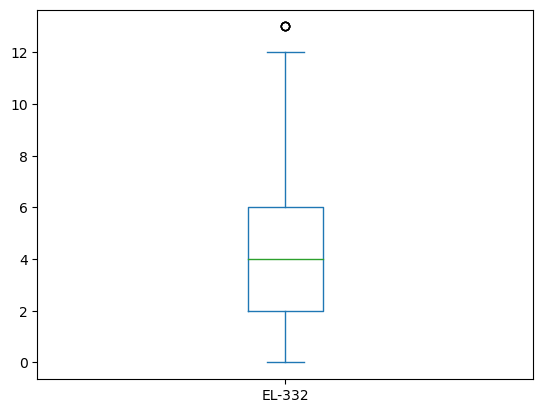

In [170]:
gradesdf['EL-332'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

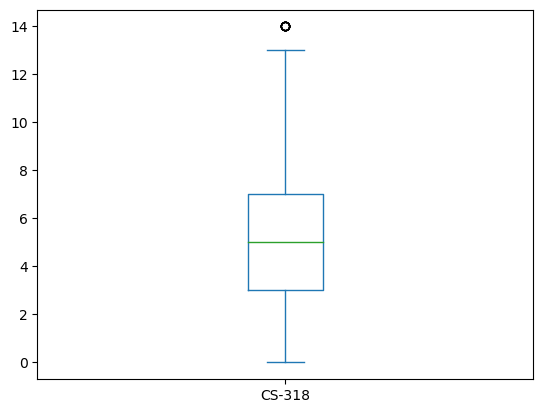

In [171]:
gradesdf['CS-318'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

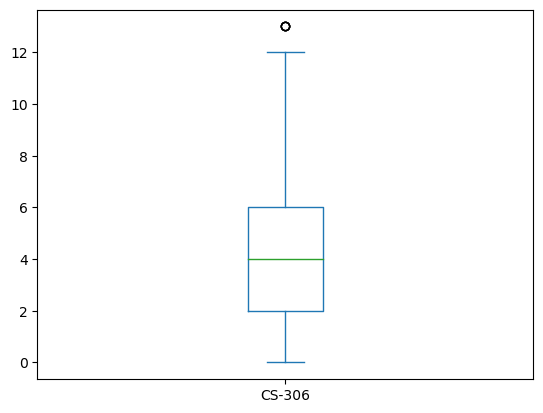

In [172]:
gradesdf['CS-306'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

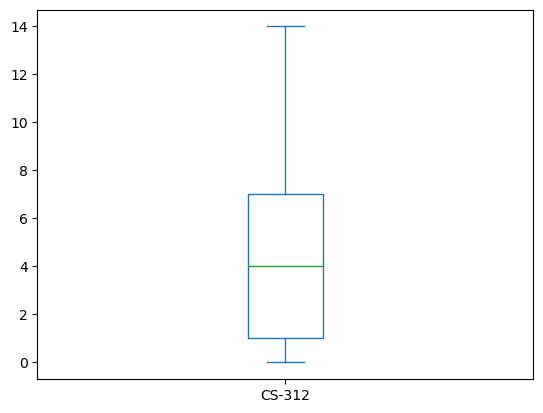

In [173]:
gradesdf['CS-312'].plot.box()

<AxesSubplot:>

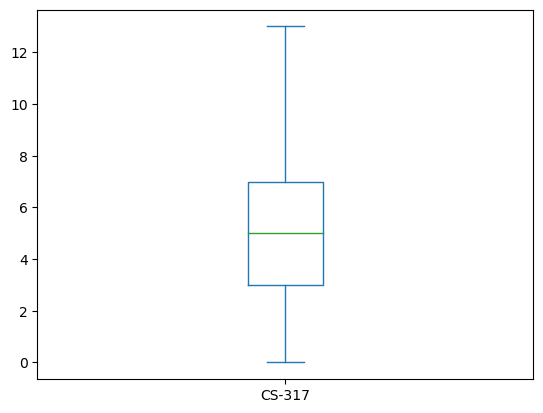

In [174]:
gradesdf['CS-317'].plot.box()

<AxesSubplot:>

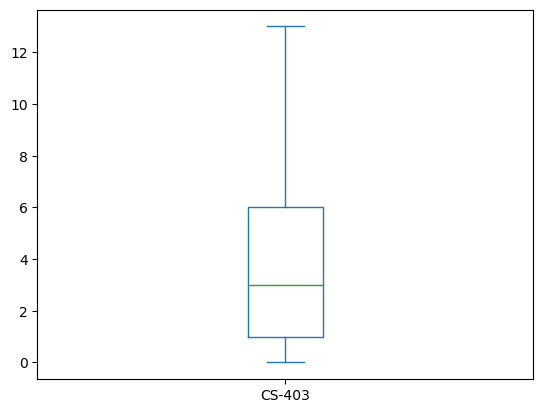

In [175]:
gradesdf['CS-403'].plot.box()

<AxesSubplot:>

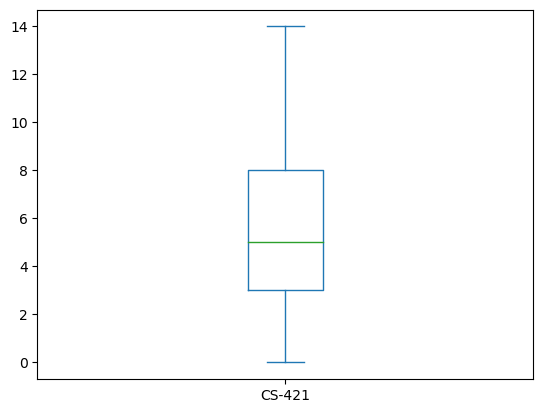

In [176]:
gradesdf['CS-421'].plot.box()

It is observed that there are outliers present in the data

<AxesSubplot:>

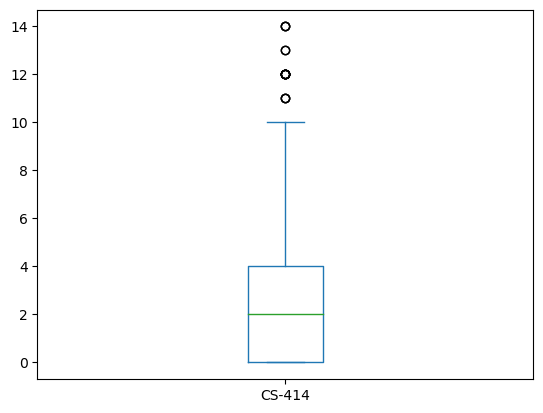

In [177]:
gradesdf['CS-414'].plot.box()

It is observed that there are outliers present it in the data

<AxesSubplot:>

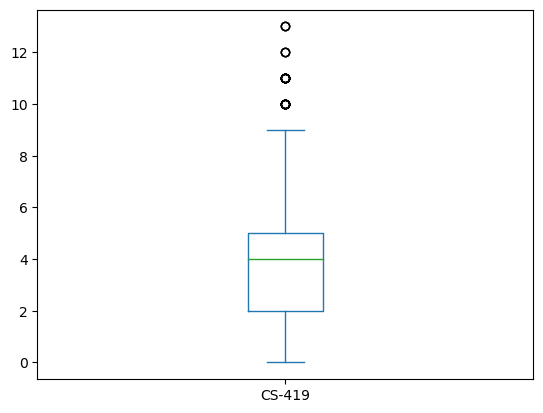

In [178]:
gradesdf['CS-419'].plot.box()

It is observed that there are outliers present it in the data

<AxesSubplot:>

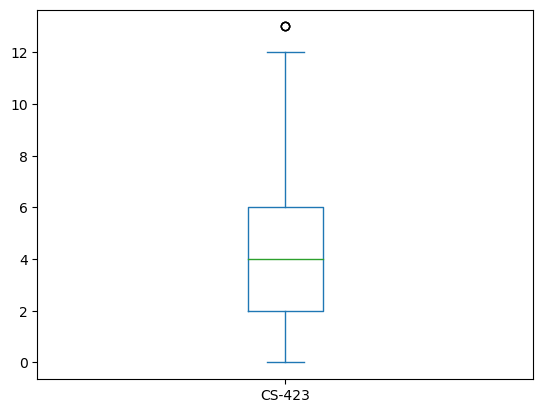

In [179]:
gradesdf['CS-423'].plot.box()

It is observed that there are outliers present it in the data

In [180]:
gradesdf.shape

(571, 40)

Let's remove the outliers

In [181]:
X=gradesdf.iloc[:,0:-1]

To remove the outliers of the independent values the we are storing them in the X variable

In [182]:
X

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10      10       8   
1         0       9      11         10       5       6      10       0   
2         0       3       0          5       4       0       5       4   
3         9       7      11         10      10       2      11       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4      10          0      10      10       5       8   
570       6       9      10          6       6      10       3       7   

     EE-119  ME-107  ...  EL-332  CS-318  CS-306  CS-312  CS-317  CS-403  \
0         5       8  ...       6       8       6       8       8       8   
1        10       9  ...       6       2      10      11      10       6   
2         2       2  ...       4       2       2       3       3       0   
3         9       7  ...      11       4       8      11       6      11   
4         0       2  ...       2       5       2       5       4       4   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       0       0       4       2       2       0   
567       0       0  ...       0       1       2       4       4       0   
568       0       3  ...       3       7       4       2       3       0   
569       5       8  ...      10       5       4      10       3       3   
570       6      10  ...      12       8      11       7       6       5   

     CS-421  CS-414  CS-419  CS-423  
0         8       0       8       3  
1        10       5       6       6  
2         6       0       0       2  
3         8       3       7       7  
4         5       0       2       2  
..      ...     ...     ...     ...  
566       0       4       4       3  
567       0       3       2       6  
568       4       6       4       2  
569       8       6       3       5  
570      10       8       4      10  

[571 rows x 39 columns]

In [183]:
z=np.abs(zscore(X))

In [184]:
z

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.400402  1.770900  1.578377   0.464187  1.251754  2.657832  1.946253   
1    1.242052  1.411559  2.525403   1.625417  0.309639  1.173242  1.946253   
2    1.242052  0.744483  0.947026   0.173879  0.004400  1.053643  0.253730   
3    1.714365  0.692879  2.525403   1.625417  1.879832  0.311348  2.284757   
4    0.585070  1.103823  0.315675   0.116428  1.260554  1.053643  0.761783   
..        ...       ...       ...        ...       ...       ...       ...   
566  0.256579  1.822504  0.947026   0.697043  0.946516  1.053643  0.761783   
567  0.913561  1.822504  0.947026   1.277658  1.260554  1.053643  1.438792   
568  0.256579  1.822504  0.315675   0.116428  1.260554  1.053643  1.438792   
569  1.242052  0.385142  2.209728   1.277658  1.879832  2.657832  0.253730   
570  0.728893  1.411559  2.209728   0.464187  0.623677  2.657832  0.423279   

       EL-102    EE-119    ME-107  ...    EL-332    CS-318    CS-306  \
0    1.196279  0.407992  1.019762  ...  0.513943  0.861358  0.531791   
1    1.257517  2.280687  1.337602  ...  0.513943  0.963635  1.804967   
2    0.030619  0.715625  0.887282  ...  0.110443  0.963635  0.741386   
3    1.196279  1.906148  0.701921  ...  2.074909  0.355304  1.168379   
4    0.030619  1.464704  0.887282  ...  0.734829  0.051138  0.741386   
..        ...       ...       ...  ...       ...       ...       ...   
566  0.644068  1.090164  0.251601  ...  1.359216  1.571966  0.104797   
567  0.644068  1.464704  1.522963  ...  1.359216  1.267800  0.741386   
568  1.257517  1.464704  0.569441  ...  0.422636  0.557193  0.104797   
569  1.196279  0.407992  1.019762  ...  1.762716  0.051138  0.104797   
570  0.889555  0.782531  1.655443  ...  2.387102  0.861358  2.123262   

       CS-312    CS-317    CS-403    CS-421    CS-414    CS-419    CS-423  
0    0.984360  0.974180  1.323620  0.761559  0.930776  1.480504  0.394192  
1    1.797774  1.629370  0.708409  1.416453  0.830235  0.728397  0.569076  
2    0.371331  0.663796  1.137225  0.106664  0.930776  1.527922  0.715281  
3    1.797774  0.318989  2.246437  0.761559  0.125831  1.104451  0.890165  
4    0.170945  0.336201  0.093198  0.220783  0.930776  0.775816  0.715281  
..        ...       ...       ...       ...       ...       ...       ...  
566  0.642469  0.991391  1.137225  1.858020  0.478033  0.023709  0.394192  
567  0.100193  0.336201  1.137225  1.858020  0.125831  0.775816  0.569076  
568  0.642469  0.663796  1.137225  0.548231  1.182437  0.023709  0.715281  
569  1.526636  0.663796  0.214408  0.761559  1.182437  0.399762  0.247987  
570  0.713221  0.318989  0.400803  1.416453  1.886841  0.023709  1.853433  

[571 rows x 39 columns]

Let's see the cells that contains the thresold value more than 3

In [185]:
Thhresold = 3 
print(np.where(z>3))

(array([ 60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  91, 137, 137,
       137, 137, 137, 137, 137, 137, 137, 137, 143, 143, 143, 143, 143,
       143, 143, 143, 143, 143, 186, 198, 217, 263, 275, 281, 281, 281,
       288, 316, 322, 340, 340, 352, 352, 382, 387, 423, 424, 424, 447,
       454, 506, 560], dtype=int64), array([ 2, 11, 13, 15, 19, 24, 26, 28, 36, 37, 15,  2, 11, 13, 15, 19, 24,
       26, 28, 36, 37,  2, 11, 13, 15, 19, 24, 26, 28, 36, 37, 11, 11, 11,
       11, 11, 11, 15, 36, 11, 11, 11, 24, 36, 24, 36, 36, 36, 36, 11, 36,
       36, 36, 11, 36], dtype=int64))


Verifying the above data

In [186]:
z.iloc[60][36]

4.000054453323265

In [187]:
z.iloc[60][37]

3.360770534546835

In [188]:
z.iloc[137][36]

4.000054453323265

Will remove the outliers and create a new dataset

In [340]:
df_new=gradesdf[(z<3).all(axis=1)]
df_new

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10      10       8   
1         0       9      11         10       5       6      10       0   
2         0       3       0          5       4       0       5       4   
3         9       7      11         10      10       2      11       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4      10          0      10      10       5       8   
570       6       9      10          6       6      10       3       7   

     EE-119  ME-107  ...  CS-318  CS-306  CS-312  CS-317  CS-403  CS-421  \
0         5       8  ...       8       6       8       8       8       8   
1        10       9  ...       2      10      11      10       6      10   
2         2       2  ...       2       2       3       3       0       6   
3         9       7  ...       4       8      11       6      11       8   
4         0       2  ...       5       2       5       4       4       5   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       0       4       2       2       0       0   
567       0       0  ...       1       2       4       4       0       0   
568       0       3  ...       7       4       2       3       0       4   
569       5       8  ...       5       4      10       3       3       8   
570       6      10  ...       8      11       7       6       5      10   

     CS-414  CS-419  CS-423   CGPA  
0         0       8       3  2.205  
1         5       6       6  2.008  
2         0       0       2  3.608  
3         3       7       7  1.906  
4         0       2       2  3.448  
..      ...     ...     ...    ...  
566       4       4       3  3.798  
567       3       2       6  3.772  
568       6       4       2  3.470  
569       6       3       5  2.193  
570       8       4      10  1.753  

[514 rows x 40 columns]

Checking for the skewness

In [341]:
df_new.skew()

PH-121       0.571963
HS-101       0.065553
CY-105       1.183327
HS-105/12    0.507145
MT-111       0.643994
CS-105       0.991245
CS-106       0.856214
EL-102       0.655312
EE-119       0.577652
ME-107       0.129668
CS-107       0.582606
HS-205/20    1.144210
MT-222       0.352602
EE-222       0.985076
MT-224       0.633494
CS-210       0.938622
CS-211       0.296244
CS-203       0.473847
CS-214       0.262364
EE-217       0.913664
CS-212       0.610775
CS-215       0.377824
MT-331       0.789867
EF-303       0.602924
HS-304       0.854893
CS-301       0.607823
CS-302       0.866713
TC-383       0.466651
MT-442       1.069348
EL-332       0.635774
CS-318       0.528627
CS-306       0.633066
CS-312       0.529465
CS-317       0.398888
CS-403       0.789433
CS-421       0.408167
CS-414       1.505402
CS-419       0.760197
CS-423       0.687865
CGPA        -0.518224
dtype: float64

lets remove the skewness

In [338]:
pt = PowerTransformer(method='yeo-johnson')
df_new['CY-105'] = pt.fit_transform(df_new[['CY-105']])
df_new['CY-105'].skew()

0.011163271090258229

In [342]:
pt = PowerTransformer(method='yeo-johnson')
df_new['PH-121'] = pt.fit_transform(df_new[['PH-121']])
df_new['PH-121'].skew()

-0.10206530933175771

In [343]:
df_new['CS-105'] = pt.fit_transform(df_new[['CS-105']])
df_new['CS-105'].skew()

-0.028613442805849362

In [344]:
df_new['CS-106'] = pt.fit_transform(df_new[['CS-106']])
df_new['CS-106'].skew()

-0.01907282568905353

In [345]:
df_new['CS-210'] = pt.fit_transform(df_new[['CS-210']])
df_new['CS-210'].skew()

-0.05893358308777874

In [348]:
df_new['EE-217'] = pt.fit_transform(df_new[['EE-217']])
df_new['EE-217'].skew()

-0.05583601276875691

In [349]:

df_new['CS-212'] = pt.fit_transform(df_new[['CS-212']])
df_new['CS-212'].skew()

-0.03935317718580601

In [350]:
df_new['MT-331'] = pt.fit_transform(df_new[['MT-331']])
df_new['MT-331'].skew()

-0.0684663719359957

In [351]:
df_new['EF-303'] = pt.fit_transform(df_new[['EF-303']])
df_new['EF-303'].skew()

-0.035147334180417815

In [352]:
df_new['HS-304'] = pt.fit_transform(df_new[['HS-304']])
df_new['HS-304'].skew()

-0.005541217487215289

In [353]:
df_new['CS-302'] = pt.fit_transform(df_new[['CS-302']])
df_new['CS-302'].skew()

-0.04920063058499955

In [354]:
df_new['MT-442'] = pt.fit_transform(df_new[['MT-442']])
df_new['MT-442'].skew()

-0.03010823415471912

In [355]:

df_new['CS-414'] = pt.fit_transform(df_new[['CS-414']])
df_new['CS-414'].skew()

0.0004241326010108564

Let's try to remove the outliers using Standard Scaler

In [205]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(df_new)

StandardScaler()

In [206]:
scaled_data= scaler.transform(df_new)

In [356]:
df_new.shape

(514, 40)

Let's split the data for training and testing purpose

In [357]:
x=df_new.iloc[:,0:-1]

In [358]:
x

PH-121  HS-101  CY-105  HS-105/12  MT-111    CS-105    CS-106  EL-102  \
0    0.585122      10       8          6       8  1.845756  1.664862       8   
1   -1.525268       9      11         10       5  1.182971  1.664862       0   
2   -1.525268       3       0          5       4 -1.353430  0.418057       4   
3    1.495618       7      11         10      10  0.018009  1.868587       8   
4   -0.402082       2       2          4       0 -1.353430 -0.696679       4   
..        ...     ...     ...        ...     ...       ...       ...     ...   
566 -0.023215       0       0          2       1 -1.353430 -0.696679       2   
567 -0.871246       0       0          0       0 -1.353430 -1.959329       2   
568 -0.023215       0       2          4       0 -1.353430 -1.959329       0   
569 -1.525268       4      10          0      10  1.845756  0.418057       8   
570  0.841760       9      10          6       6  1.845756 -0.269337       7   

     EE-119  ME-107  ...  EL-332  CS-318  CS-306  CS-312  CS-317  CS-403  \
0         5       8  ...       6       8       6       8       8       8   
1        10       9  ...       6       2      10      11      10       6   
2         2       2  ...       4       2       2       3       3       0   
3         9       7  ...      11       4       8      11       6      11   
4         0       2  ...       2       5       2       5       4       4   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       0       0       4       2       2       0   
567       0       0  ...       0       1       2       4       4       0   
568       0       3  ...       3       7       4       2       3       0   
569       5       8  ...      10       5       4      10       3       3   
570       6      10  ...      12       8      11       7       6       5   

     CS-421    CS-414  CS-419  CS-423  
0         8 -1.294359       8       3  
1        10  1.017613       6       6  
2         6 -1.294359       0       2  
3         8  0.494986       7       7  
4         5 -1.294359       2       2  
..      ...       ...     ...     ...  
566       0  0.782649       4       3  
567       0  0.494986       2       6  
568       4  1.216221       4       2  
569       8  1.216221       3       5  
570      10  1.539913       4      10  

[514 rows x 39 columns]

In [359]:
x.shape

(514, 39)

In [360]:
y=df_new.iloc[:,-1]

In [361]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 514, dtype: float64

In [362]:
y.shape

(514,)

In [363]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=54)

Let's check the shape of the training and testing data set

In [364]:
x_train.shape

(359, 39)

In [365]:
x_test.shape

(155, 39)

In [366]:
y_train.shape

(359,)

In [367]:
y_test.shape

(155,)

In [368]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [369]:
model.coef_

array([-0.03369966, -0.01293017, -0.00457488, -0.00076355, -0.00845024,
       -0.02680683, -0.01017389, -0.00886535, -0.01767835, -0.0158064 ,
       -0.01132437, -0.00282315, -0.00391854, -0.00504363, -0.00504757,
       -0.0345282 , -0.00024617, -0.0047025 , -0.00513892, -0.02492034,
       -0.00803574, -0.00244003, -0.03103888, -0.00965079, -0.01855313,
       -0.00751813, -0.032014  , -0.00612467, -0.00623423, -0.01080497,
        0.00073836, -0.01253969, -0.00542967, -0.01067917, -0.00629835,
       -0.01485783, -0.0414165 , -0.00910791, -0.00763731])

In [370]:
model.intercept_

3.8437013964086377

In [371]:
model.score(x_train,y_train)

0.9710766909018217

This shows that the data fit into the model 97% well

In [372]:
y_pred = model.predict(x_test)

In [373]:
y_pred

array([2.08793851, 2.63633181, 2.8512198 , 2.90840602, 3.06006357,
       3.15643111, 3.78814711, 2.67044233, 3.17925629, 2.87990616,
       2.75404323, 2.17663514, 1.35046255, 3.01107621, 3.25326622,
       3.802114  , 3.41866297, 2.18173166, 3.05302676, 2.48009726,
       3.90374204, 3.61112799, 3.54250539, 2.07906747, 1.99374421,
       3.29547374, 1.84307979, 3.11173403, 1.89520754, 3.65366003,
       3.5657892 , 3.39089487, 3.10971511, 2.48485839, 3.09242852,
       2.45993291, 3.11734266, 3.67220571, 3.64077939, 3.87168437,
       2.27469965, 2.16134023, 2.77826509, 3.18038132, 3.02889998,
       3.42706693, 3.66488159, 2.82000727, 3.18489719, 3.75959398,
       3.21408369, 3.42965465, 3.19321418, 3.46335551, 2.69103365,
       4.01937143, 2.93614917, 2.65061447, 3.11620613, 3.00460595,
       2.28792659, 2.29042759, 2.70752118, 2.80837181, 3.98671046,
       3.26052812, 2.7055252 , 3.92717778, 2.47384459, 2.80193003,
       3.89689348, 3.77385963, 3.72795392, 3.36627889, 3.18154

In [374]:
#These gives the e value of the model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error: 0.07030937153749145
Mean Squared Error: 0.02316548015434583
Root Mean Squared Error: 0.15220210298923542
R-squared (R²): 0.9405681382852139


I see there is high variance in the model so let's try Lasso and Ridge regression models

In [226]:
from sklearn.linear_model import Lasso, Ridge

In [375]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso=ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print('Mean_squared_error : ', np.sqrt(mean_squared_error(y_test,predlasso)))
print("R-Squared (R2) :", r2_score(y_test, predlasso))

0.971076300913372
0.023161144491587345
Mean_squared_error :  0.15218785921218336
R-Squared (R2) : 0.9405792615819377


In [376]:
rd=Ridge(alpha=.001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predridge=rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print('Mean_squared_error :', np.sqrt(mean_squared_error(y_test,predridge)))
print("R-Squared :", r2_score(y_test, predridge))

0.971076690901472
0.023165481487279687
Mean_squared_error : 0.15220210736806403
R-Squared : 0.9405681348655248


# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [386]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [387]:
term_deposit =pd.read_csv("C:/Users/vaddi/Downloads/raw.githubusercontent.com_dsrscientist_dataset5_main_termdeposit_train.csv")
term_deposit

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [388]:
term_deposit.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [389]:
term_deposit.tail()

ID  age         job   marital  education default  balance housing  \
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [390]:
term_deposit.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [391]:
term_deposit.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

Let's see the values and its count present in each column

In [392]:
for i in term_deposit.columns:
    print(term_deposit[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

Let's checck for the sum of null values present in each column

In [393]:
term_deposit.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [394]:
term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


From the info, the number of rows and columns present in the dataset and also the data type of each column

In [395]:
term_deposit.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Lets divide the categorical and numerical data in two different sets

In [396]:
Categorical_cols=[]
numerical_cols = []

for i in term_deposit.dtypes.index:
    if term_deposit.dtypes[i]=="object":
        Categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print("Categorical_cols=", Categorical_cols)
print("Numerical_cols=", numerical_cols)

Categorical_cols= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical_cols= ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


<AxesSubplot:>

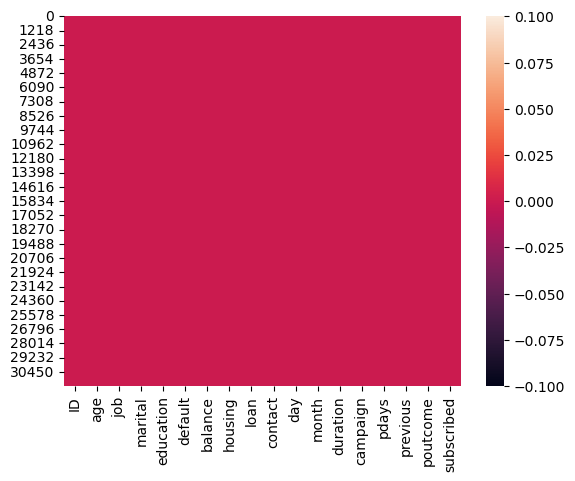

In [397]:
sns.heatmap(term_deposit.isnull())

This the graphical visualization of the zero null values present inthe dataset

In [398]:
term_deposit.drop('ID', axis=1, inplace=True)

Dropping the 'ID' column as it doesnot add up to the target value

Here, i am coverting the categorical values of the columns to the numerical to fit it better in the model

In [399]:
le= LabelEncoder()
list1 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
for val in list1:
    term_deposit[val]= le.fit_transform(term_deposit[val].astype(str))

In [400]:
term_deposit

age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0       19      9        44         2     -1         0         3           0  
1       20      5        91         2     -1         0         3           0  
2       18      5       240         1     -1         0         3           0  
3       22      6       867         1     84         3         2           1  
4        4      3       380         1     -1         0         3           0  
...    ...    ...       ...       ...    ...       ...       ...         ...  
31642   12      8       116         2     -1         0         3           0  
31643    5      6       438         2     -1         0         3           1  
31644    7      1        37         3     -1         0         3           0  
31645   15      8        22         7    337        12         0           0  
31646   11      5      1973         2     -1         0         3           1  

[31647 rows x 17 columns]

In [401]:
term_deposit.describe()

age           job       marital     education       default  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247      4.332923      1.167220      1.225013      0.018485   
std       10.625134      3.271868      0.607186      0.749195      0.134700   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan       contact           day  \
count   31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean     1363.890258      0.555629      0.162132      0.644642     15.835466   
std      3028.304293      0.496904      0.368578      0.899480      8.337097   
min     -8019.000000      0.000000      0.000000      0.000000      1.000000   
25%        73.000000      0.000000      0.000000      0.000000      8.000000   
50%       450.000000      1.000000      0.000000      0.000000     16.000000   
75%      1431.000000      1.000000      0.000000      2.000000     21.000000   
max    102127.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean       5.533131    258.113534      2.765697     39.576042      0.574272   
std        3.004247    257.118973      3.113830     99.317592      2.422529   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    104.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    318.500000      3.000000     -1.000000      0.000000   
max       11.000000   4918.000000     63.000000    871.000000    275.000000   

           poutcome    subscribed  
count  31647.000000  31647.000000  
mean       2.566152      0.117389  
std        0.982069      0.321888  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

The describe, gives the statistical details of the dataset. Here are few observations:
    1. The count shows that all the columns have equal number of rows.
    2. It is observed that the mean value is lower than the median value for some columns and that indicates that the data is Left skewed.
    3. It is observed that the mean value is higher than the median value forsome columns and that indicates that the data is right skewed.
    4. The higher difference between 75% of the data and max value indicates the presence of outliers.

DAta Visualization

Univariant

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


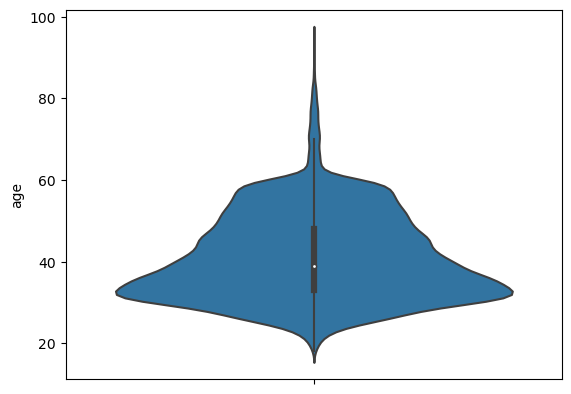

In [402]:
ax= sns.violinplot(y="age", data=term_deposit)
print(term_deposit['age'].value_counts())
plt.show()

It looks like the majority of the people are in between age 20 to 60 years

1     6842
4     6639
9     5307
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: job, dtype: int64


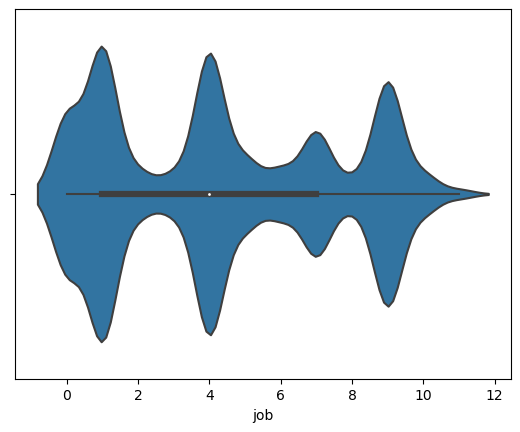

In [403]:
ax= sns.violinplot(x= "job", data=term_deposit)
print(term_deposit['job'].value_counts())
plt.show()

1    19095
2     8922
0     3630
Name: marital, dtype: int64


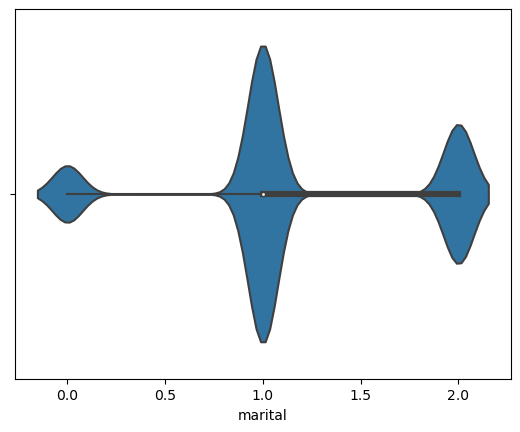

In [404]:
ax= sns.violinplot(x= "marital", data=term_deposit)
print(term_deposit['marital'].value_counts())
plt.show()

1    16224
2     9301
0     4808
3     1314
Name: education, dtype: int64


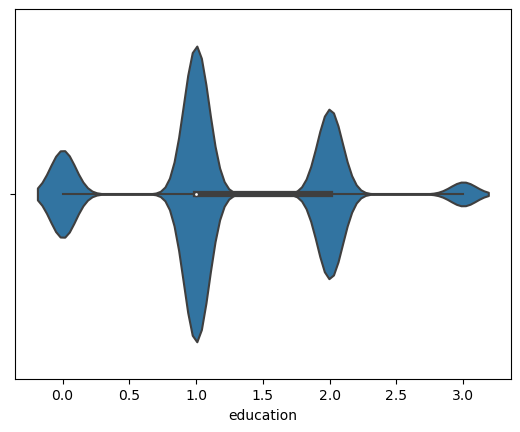

In [405]:
ax= sns.violinplot(x= "education", data=term_deposit)
print(term_deposit['education'].value_counts())
plt.show()

0    31062
1      585
Name: default, dtype: int64


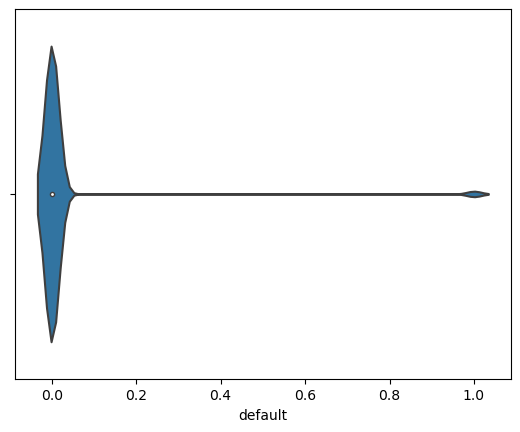

In [406]:
ax= sns.violinplot(x= "default", data=term_deposit)
print(term_deposit['default'].value_counts())
plt.show()

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


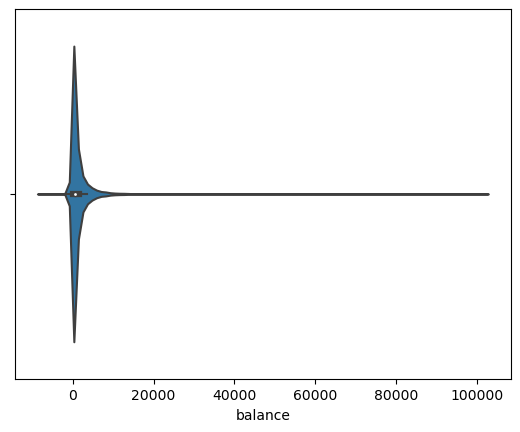

In [407]:
ax= sns.violinplot(x= "balance", data=term_deposit)
print(term_deposit['balance'].value_counts())
plt.show()

1    17584
0    14063
Name: housing, dtype: int64


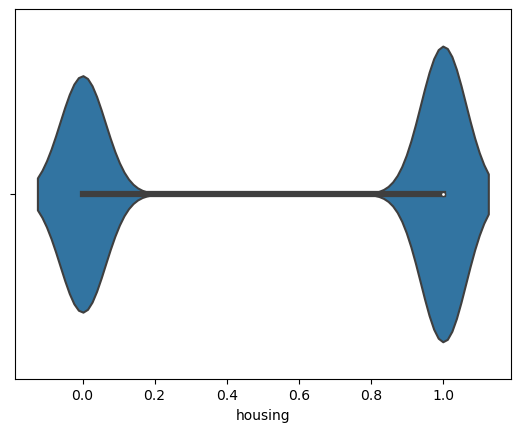

In [408]:
ax= sns.violinplot(x= "housing", data=term_deposit)
print(term_deposit['housing'].value_counts())
plt.show()

0    26516
1     5131
Name: loan, dtype: int64


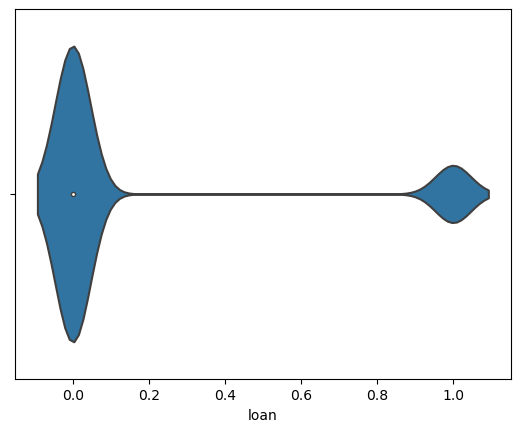

In [409]:
ax= sns.violinplot(x= "loan", data=term_deposit)
print(term_deposit['loan'].value_counts())
plt.show()

0    20423
2     9177
1     2047
Name: contact, dtype: int64


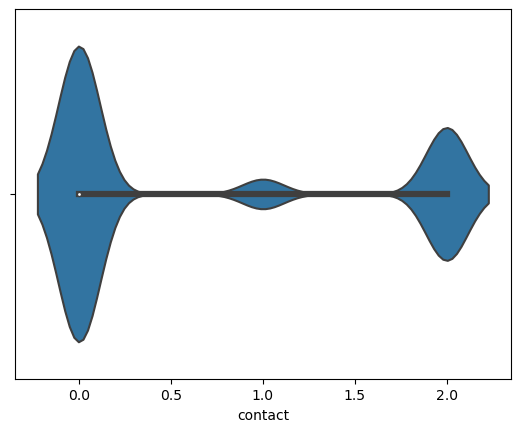

In [410]:
ax= sns.violinplot(x= "contact", data=term_deposit)
print(term_deposit['contact'].value_counts())
plt.show()

20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64


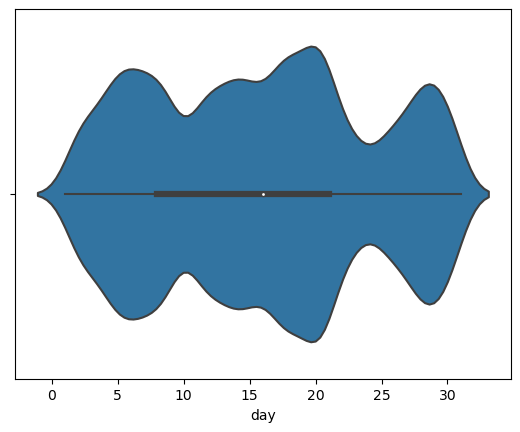

In [411]:
ax= sns.violinplot(x= "day", data=term_deposit)
print(term_deposit['day'].value_counts())
plt.show()

8     9669
5     4844
1     4333
6     3738
9     2783
0     2055
3     1827
4      977
10     512
11     410
7      342
2      157
Name: month, dtype: int64


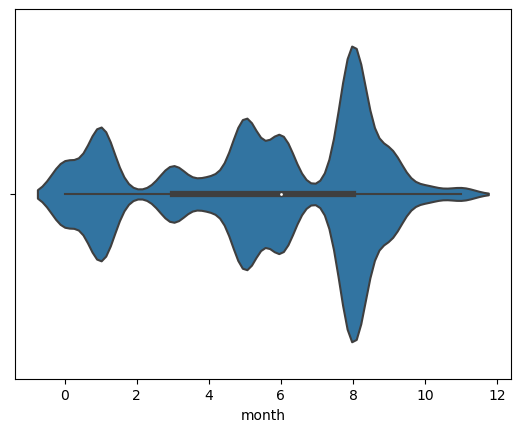

In [412]:
ax= sns.violinplot(x= "month", data=term_deposit)
print(term_deposit['month'].value_counts())
plt.show()

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64


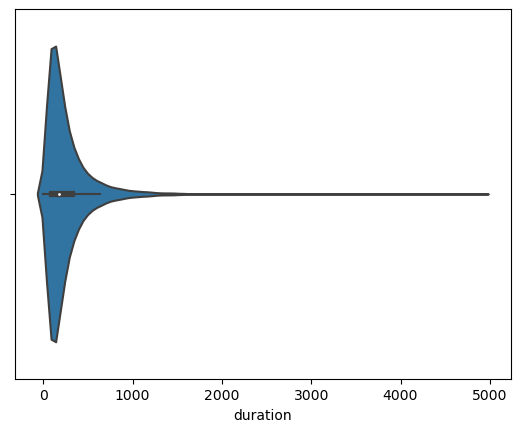

In [413]:
ax= sns.violinplot(x= "duration", data=term_deposit)
print(term_deposit['duration'].value_counts())
plt.show()

1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: campaign, dtype: int64


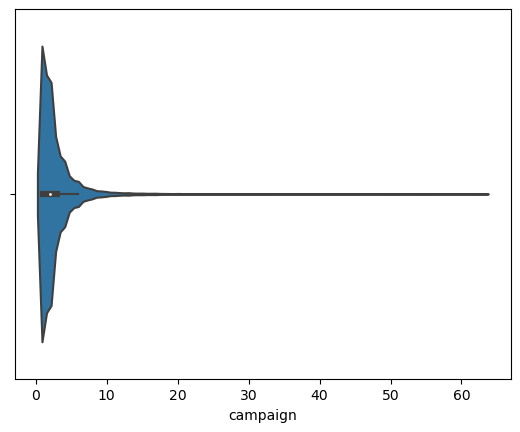

In [414]:
ax= sns.violinplot(x= "campaign", data=term_deposit)
print(term_deposit['campaign'].value_counts())
plt.show()

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64


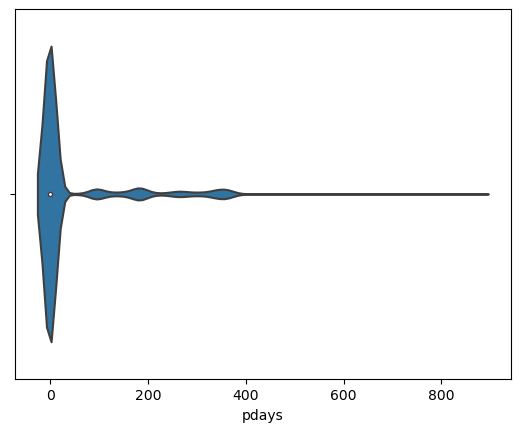

In [415]:
ax= sns.violinplot(x= "pdays", data=term_deposit)
print(term_deposit['pdays'].value_counts())
plt.show()

0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: previous, dtype: int64


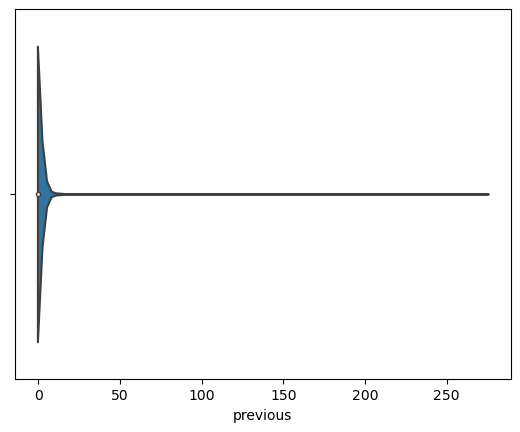

In [416]:
ax= sns.violinplot(x= "previous", data=term_deposit)
print(term_deposit['previous'].value_counts())
plt.show()

3    25929
0     3362
1     1288
2     1068
Name: poutcome, dtype: int64


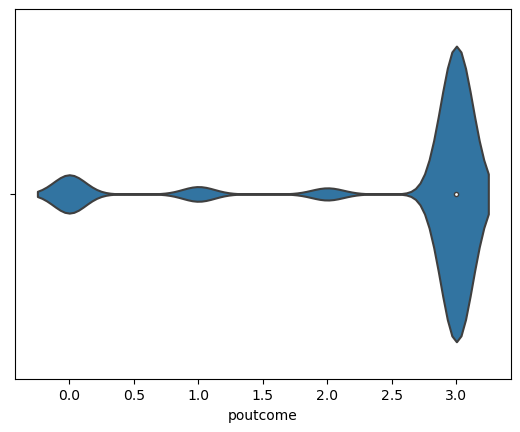

In [417]:
ax= sns.violinplot(x= "poutcome", data=term_deposit)
print(term_deposit['poutcome'].value_counts())
plt.show()

Bivariant analysis

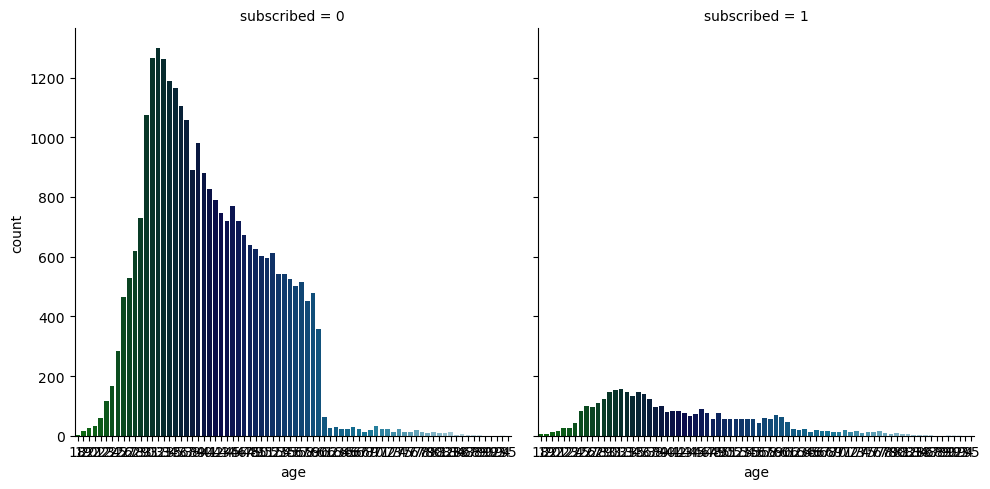

In [418]:
sns.catplot(x = 'age', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

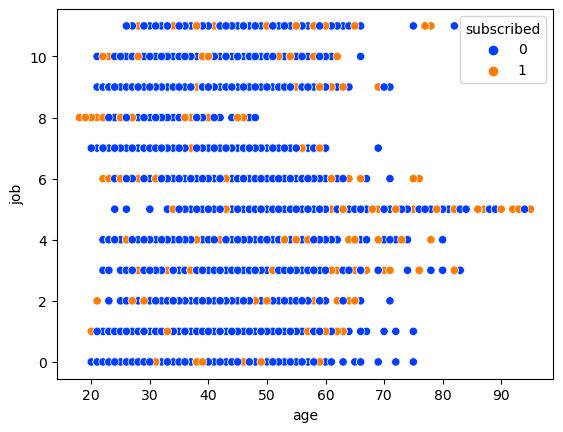

In [419]:
sns.scatterplot(x='age', y='job', data=term_deposit, hue='subscribed', palette='bright')
plt.show()

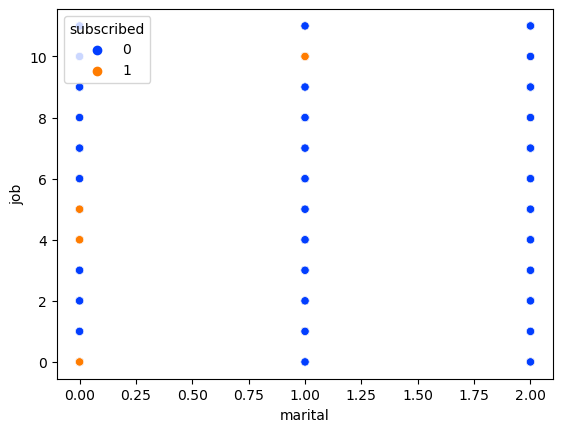

In [420]:
sns.scatterplot(x='marital', y='job', data=term_deposit, hue='subscribed', palette='bright')
plt.show()

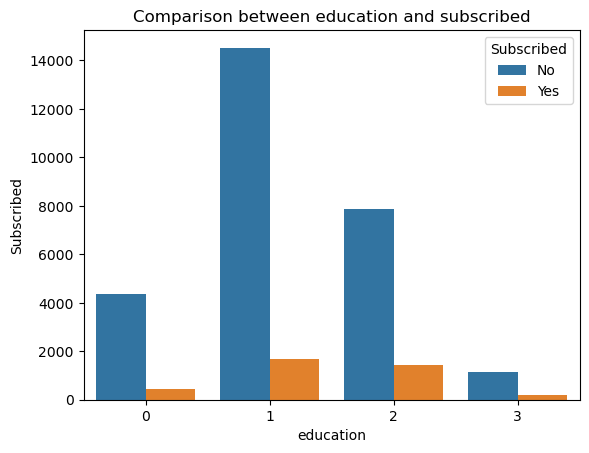

In [421]:
# Visulizing the relationship between the education and subscribed
plt.title("Comparison between education and subscribed")
sns.countplot(x='education', hue='subscribed', data=term_deposit)
plt.xlabel('education')
plt.ylabel('Subscribed')
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

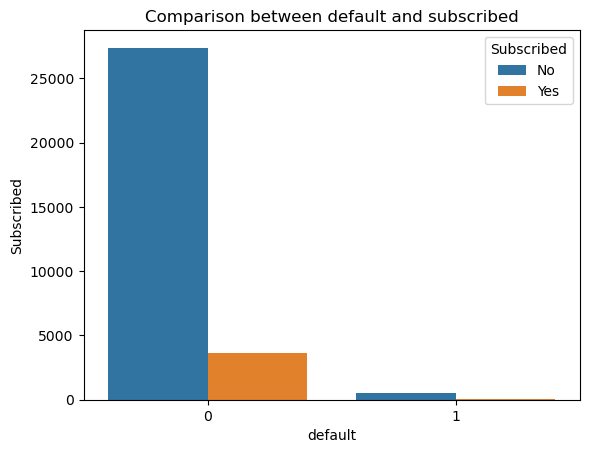

In [422]:
# Visulizing the relationship between the default and subscribed
plt.title("Comparison between default and subscribed")
sns.countplot(x='default', hue='subscribed', data=term_deposit)
plt.xlabel('default')
plt.ylabel('Subscribed')
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

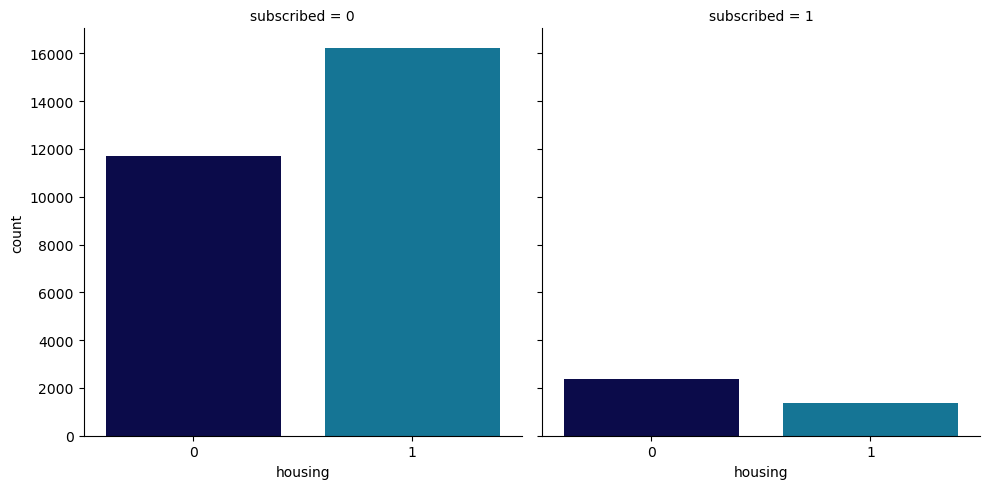

In [423]:
sns.catplot(x = 'housing', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

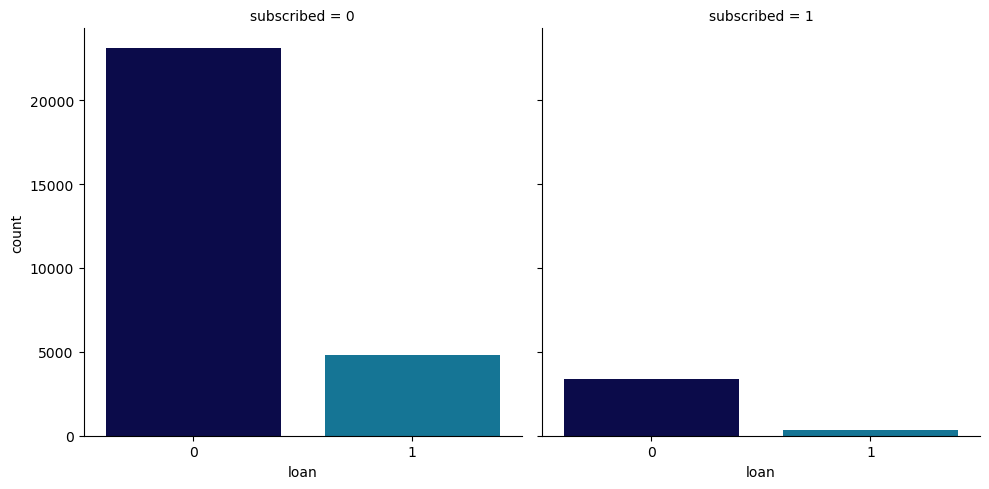

In [424]:
sns.catplot(x = 'loan', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

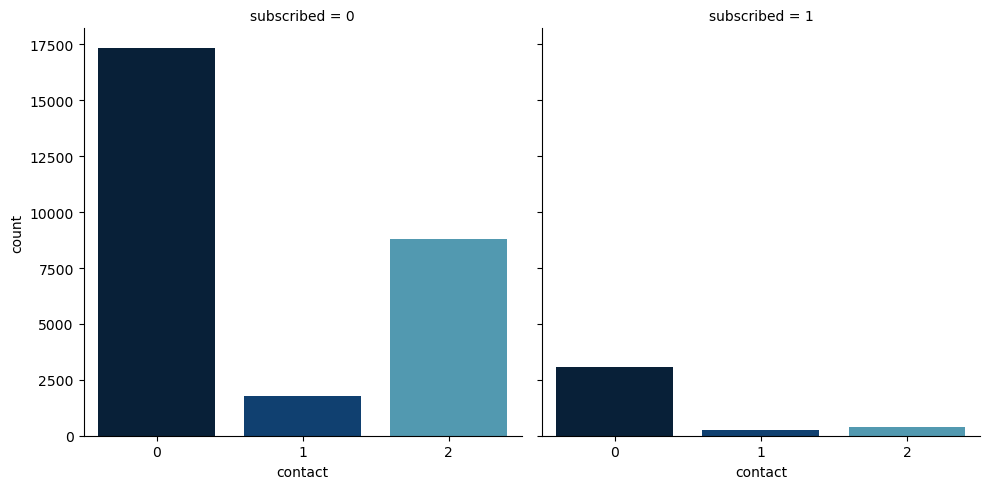

In [425]:
sns.catplot(x = 'contact', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

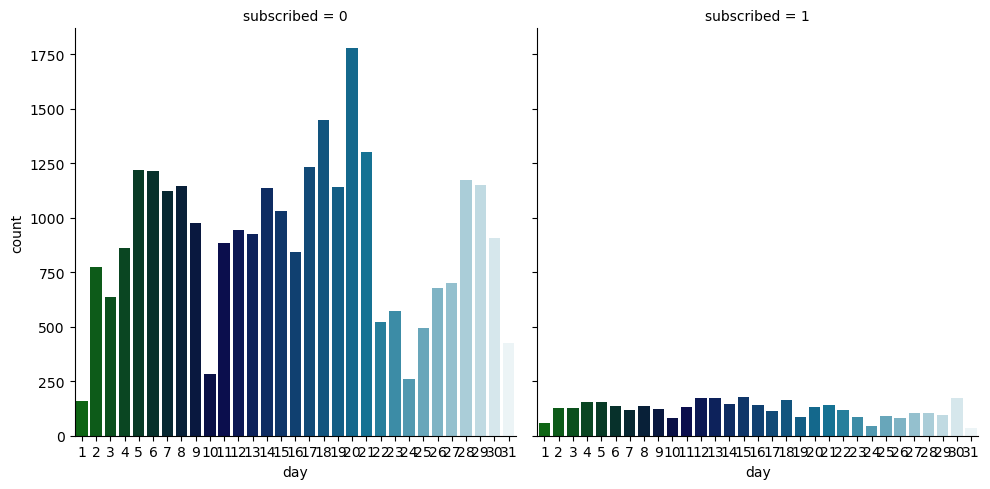

In [426]:
sns.catplot(x = 'day', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

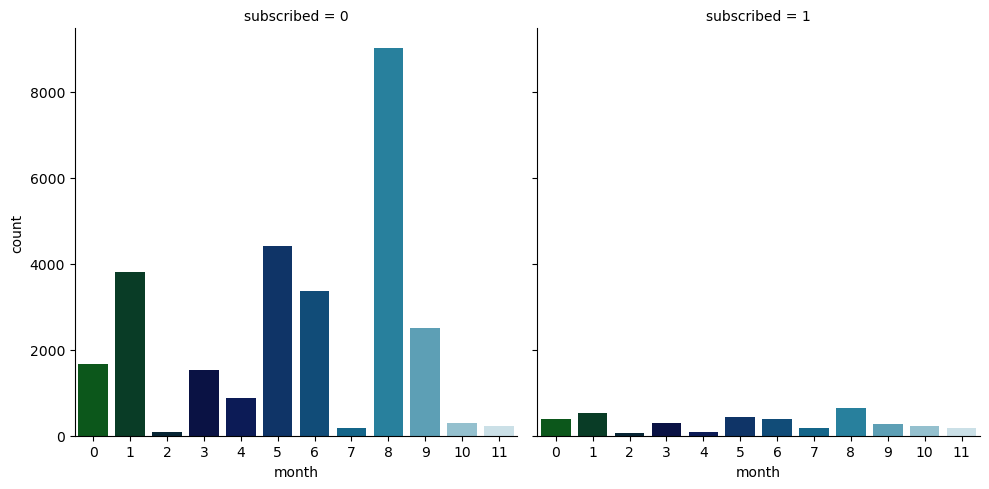

In [427]:
sns.catplot(x = 'month', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

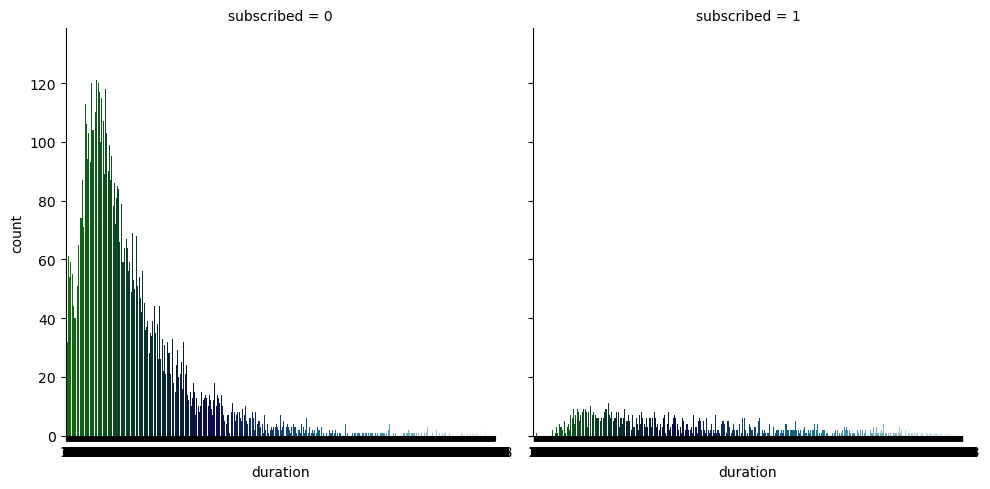

In [428]:
sns.catplot(x = 'duration', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

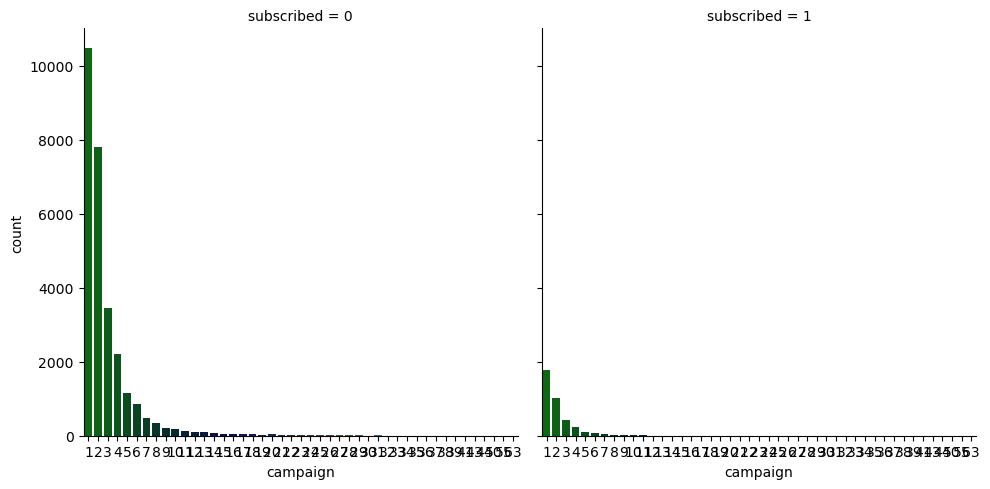

In [429]:
sns.catplot(x = 'campaign', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

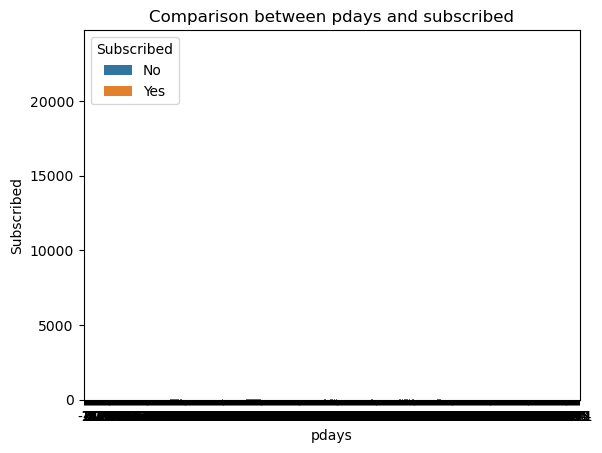

In [430]:
plt.title("Comparison between pdays and subscribed")
sns.countplot(x='pdays', hue='subscribed', data=term_deposit)
plt.xlabel('pdays')
plt.ylabel('Subscribed')
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

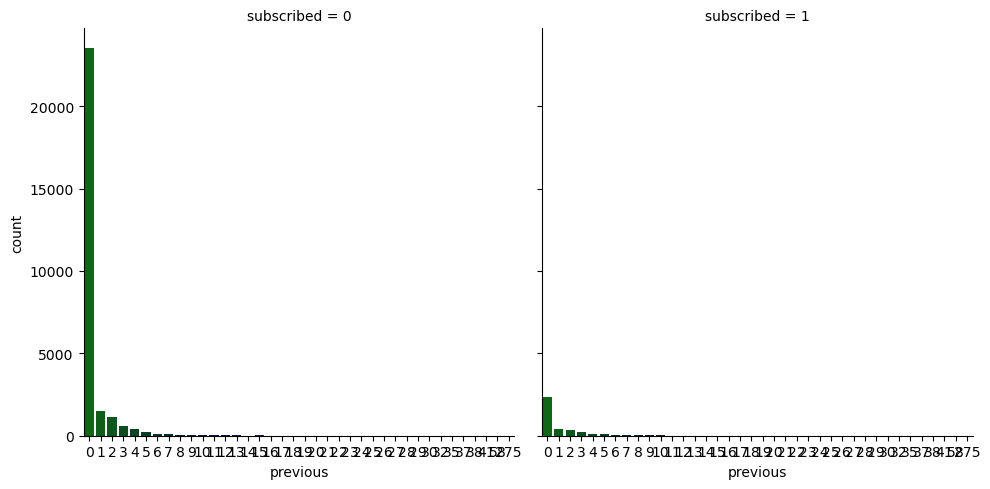

In [431]:
sns.catplot(x = 'previous', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

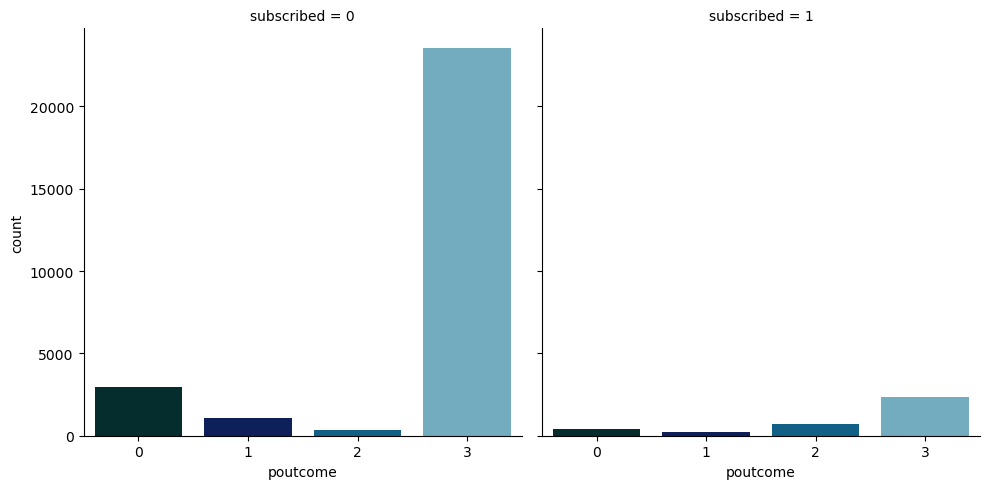

In [432]:
sns.catplot(x = 'poutcome', col='subscribed', palette = "ocean", kind = 'count', data= term_deposit)
plt.show()

From the above bivariant data i see the following coloumns has no effect on the target value. Hence removing those columns

In [498]:
list1 = ['pdays','previous','poutcome']
term_deposit.drop(list1, axis=1, inplace=True)
term_deposit

age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0        0   

       day  month  duration  campaign  subscribed  
0       19      9        44         2           0  
1       20      5        91         2           0  
2       18      5       240         1           0  
3       22      6       867         1           1  
4        4      3       380         1           0  
...    ...    ...       ...       ...         ...  
31642   12      8       116         2           0  
31643    5      6       438         2           1  
31644    7      1        37         3           0  
31645   15      8        22         7           0  
31646   11      5      1973         2           1  

[31647 rows x 14 columns]

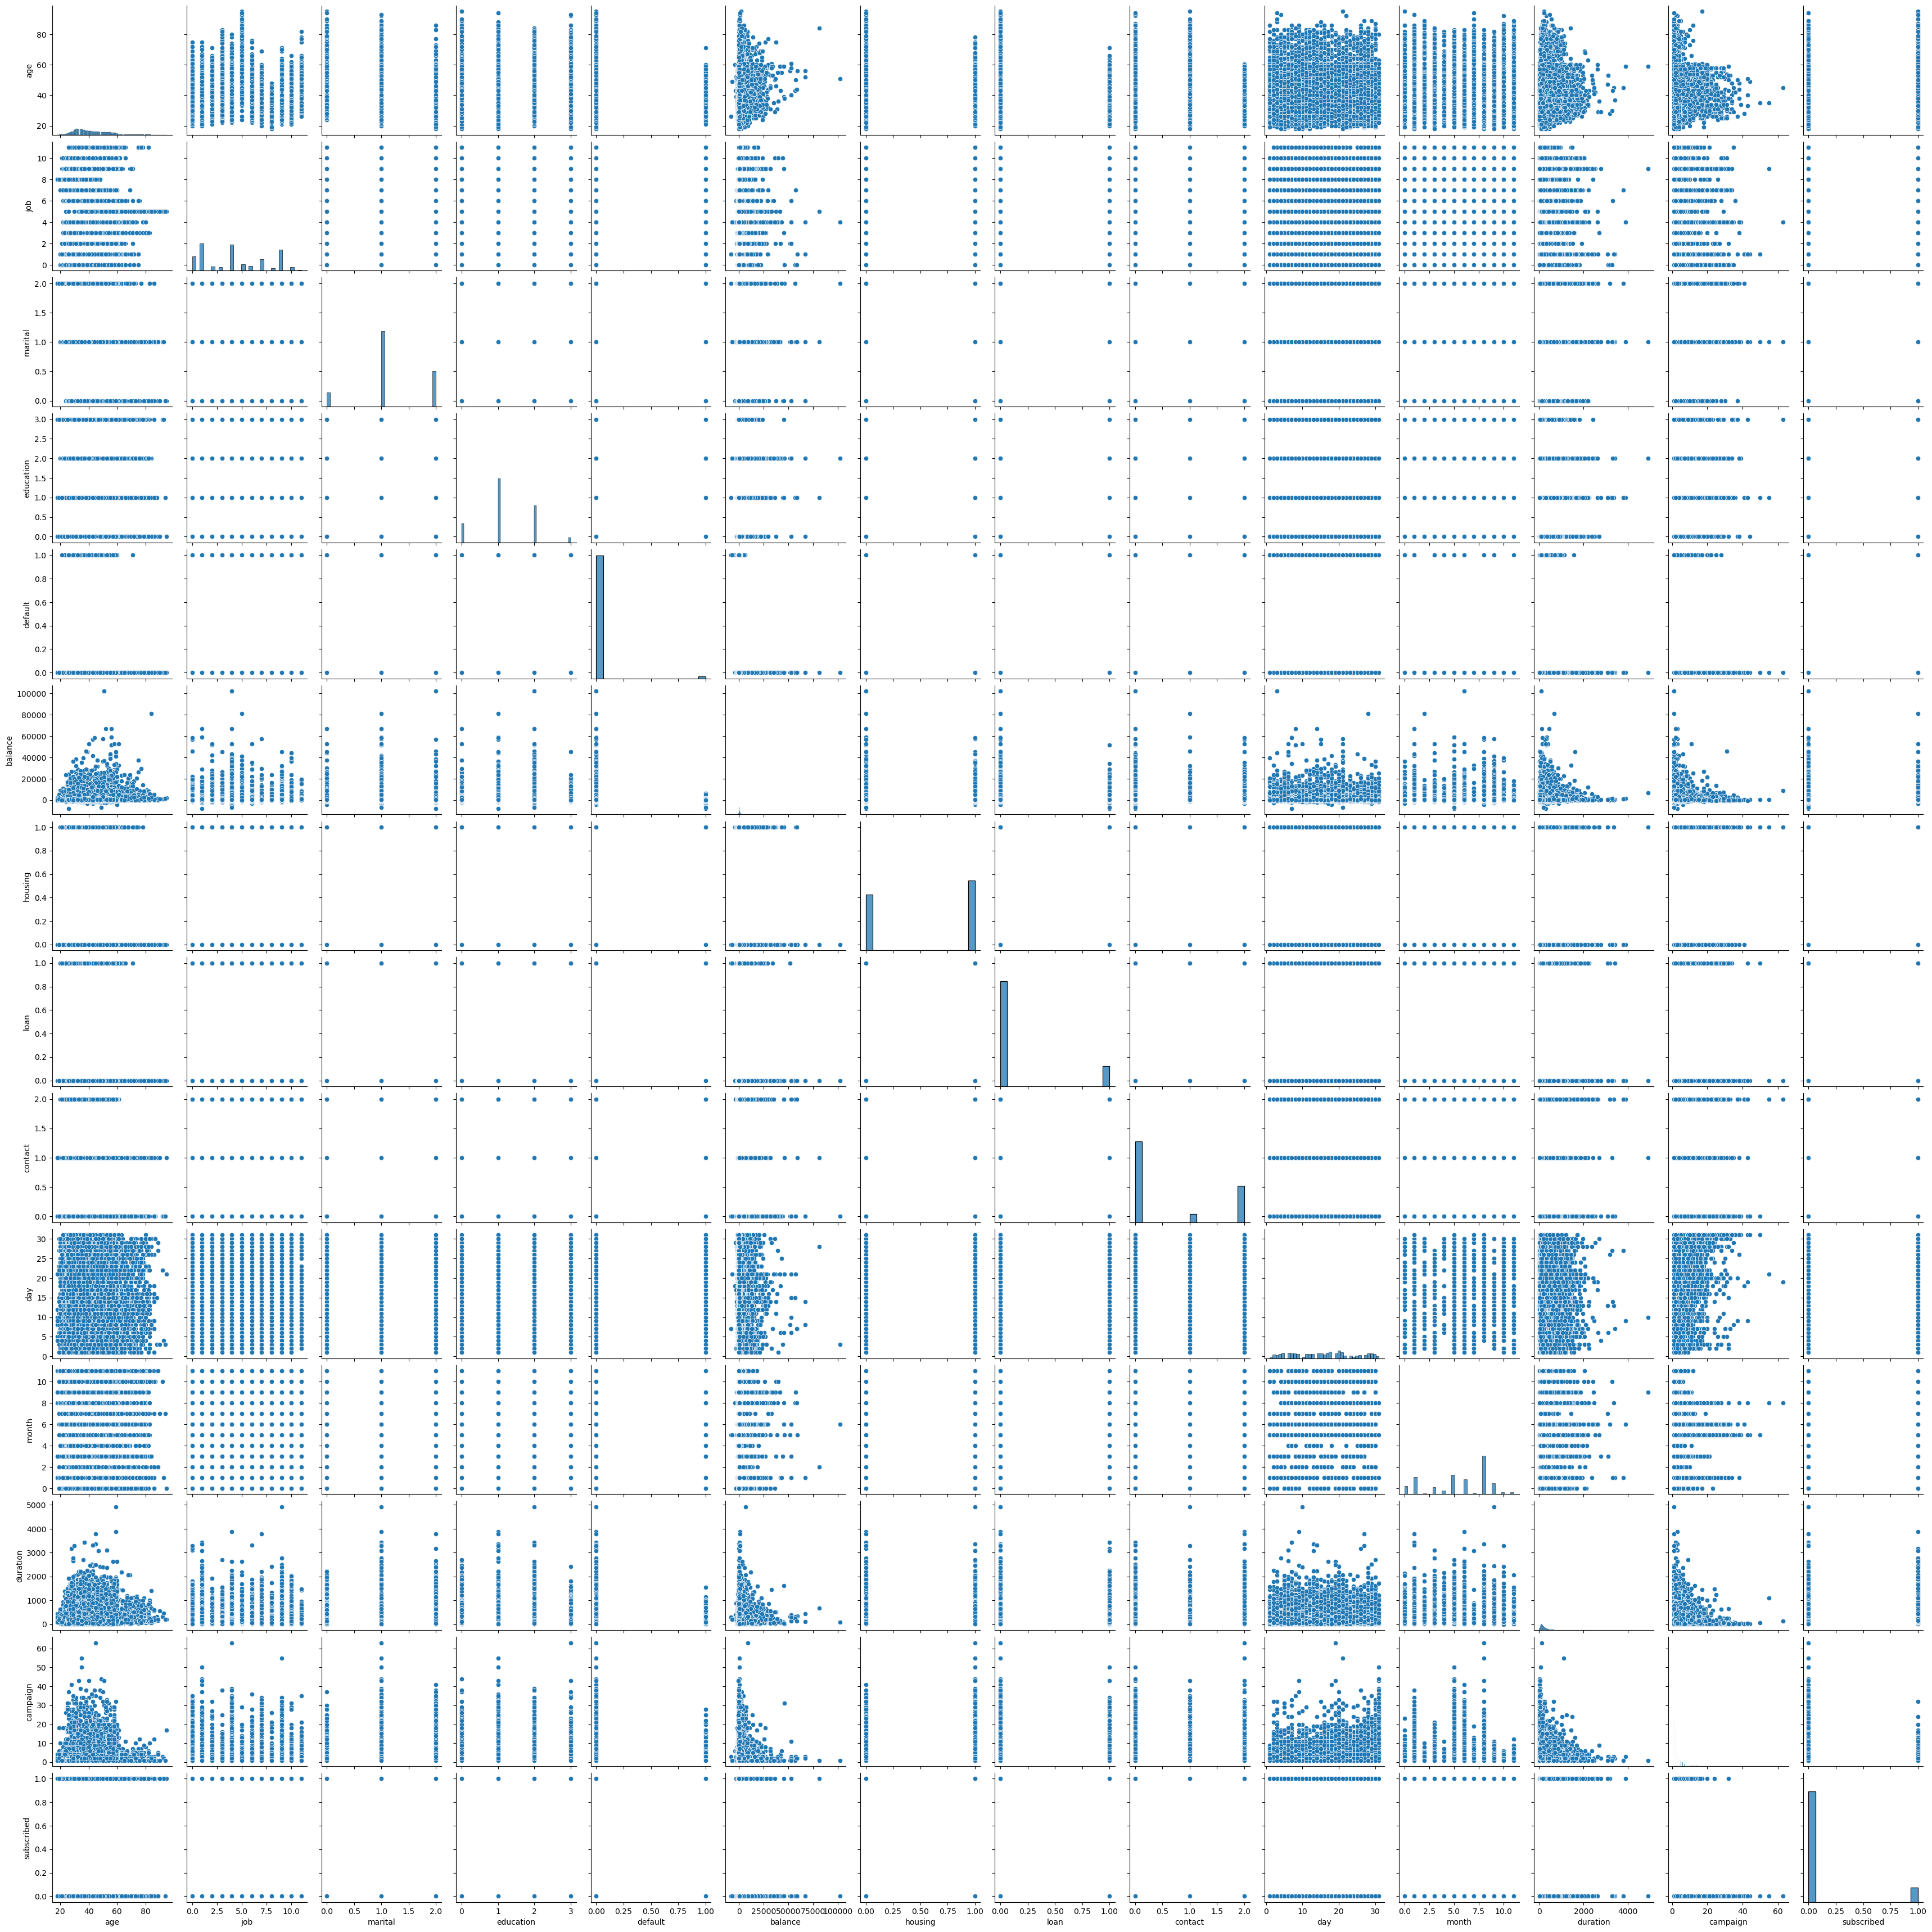

In [499]:
sns.pairplot(term_deposit)
plt.show()

let's check for the outliers

<AxesSubplot:>

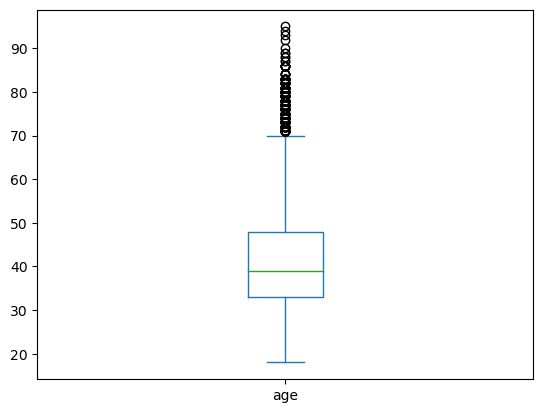

In [500]:
term_deposit['age'].plot.box()

IT is observed that the outliers are present in the data.

<AxesSubplot:>

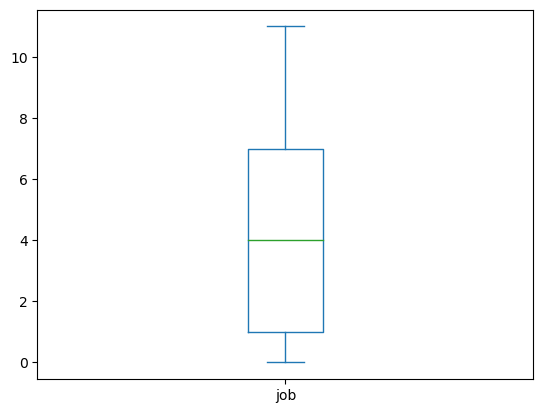

In [501]:
term_deposit['job'].plot.box()

<AxesSubplot:>

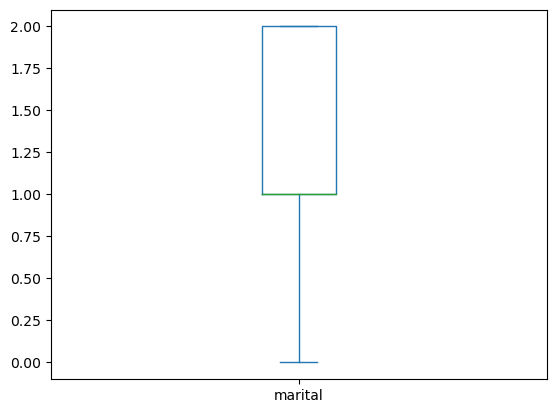

In [502]:
term_deposit['marital'].plot.box()

<AxesSubplot:>

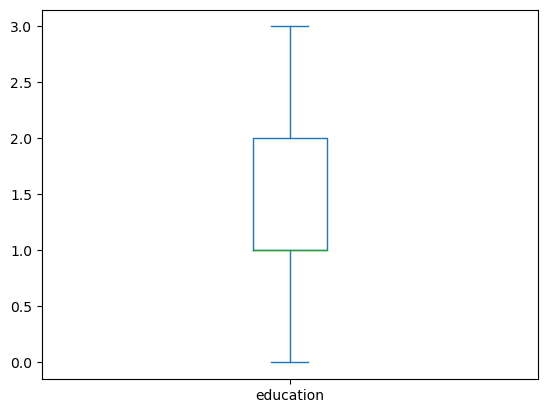

In [503]:
term_deposit['education'].plot.box()

<AxesSubplot:>

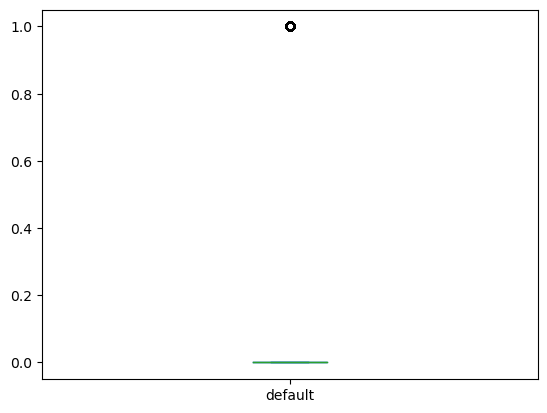

In [504]:
term_deposit['default'].plot.box()

<AxesSubplot:>

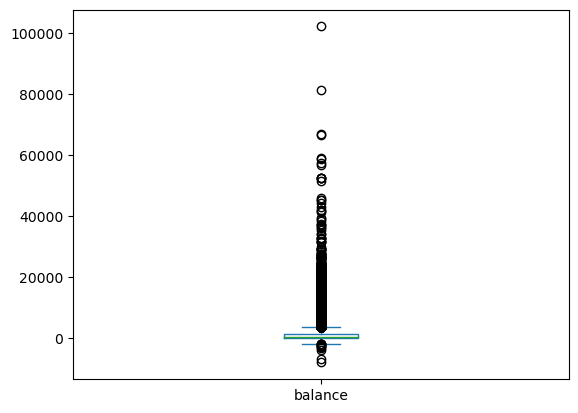

In [505]:
term_deposit['balance'].plot.box()

It is observed that the outliers are present in the data.

<AxesSubplot:>

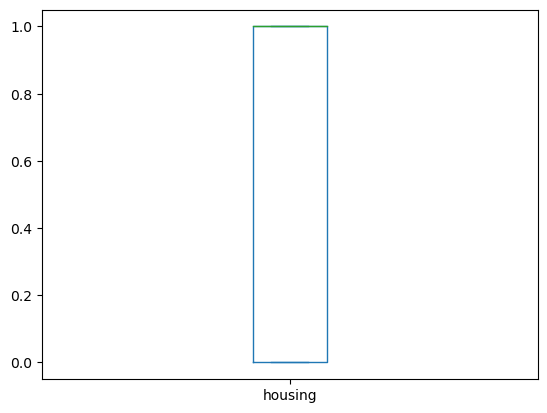

In [506]:
term_deposit['housing'].plot.box()

<AxesSubplot:>

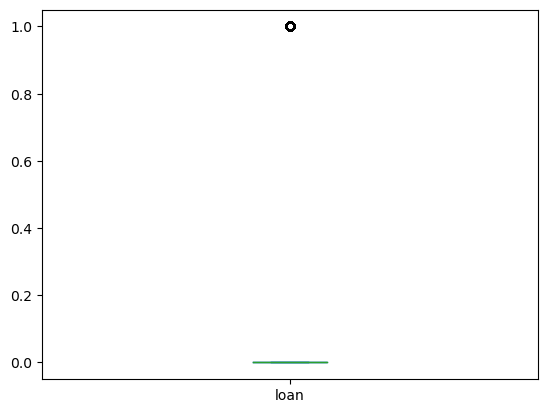

In [507]:
term_deposit['loan'].plot.box()

<AxesSubplot:>

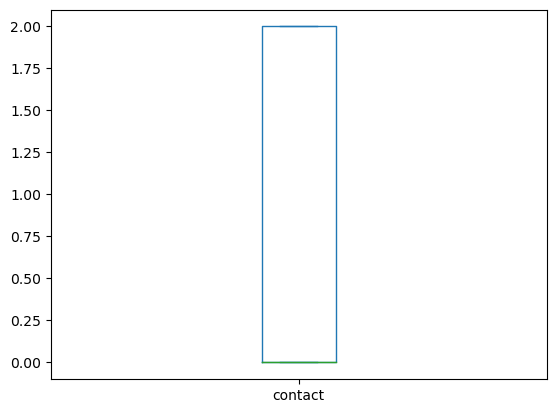

In [508]:
term_deposit['contact'].plot.box()

<AxesSubplot:>

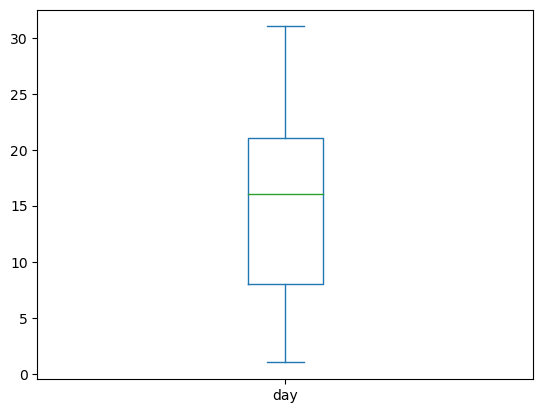

In [509]:
term_deposit['day'].plot.box()

<AxesSubplot:>

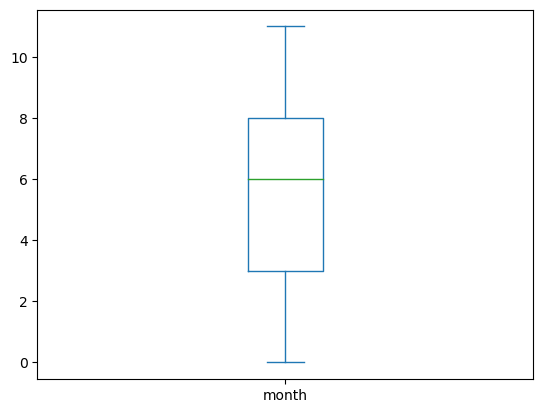

In [510]:
term_deposit['month'].plot.box()

<AxesSubplot:>

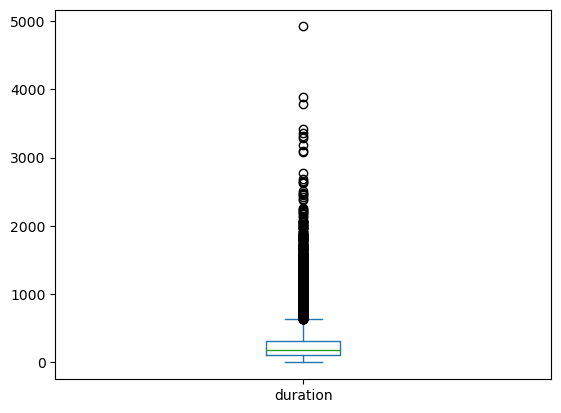

In [511]:
term_deposit['duration'].plot.box()

It is observed that the outliers are present in the data.

<AxesSubplot:>

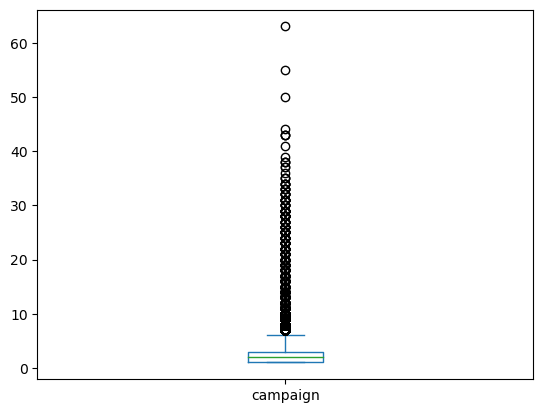

In [512]:
term_deposit['campaign'].plot.box()

It is observed that the outliers are present in the data.

Let's remove the outliers

In [513]:
z=np.abs(zscore(term_deposit))

In [514]:
z

age       job   marital  education   default   balance   housing  \
0      1.415793  1.324317  0.275405   2.369229  0.137234  0.187933  1.118201   
1      0.937156  2.037729  0.275405   0.300345  0.137234  0.449397  1.118201   
2      1.313627  0.815167  0.275405   0.300345  0.137234  0.156159  0.894294   
3      1.509911  0.101755  1.922374   1.034442  0.137234  0.635055  1.118201   
4      0.937156  1.426448  0.275405   0.300345  0.137234  0.411091  0.894294   
...         ...       ...       ...        ...       ...       ...       ...   
31642  1.125392  0.101755  1.371563   1.034442  0.137234  0.450388  0.894294   
31643  1.133439  0.101755  1.922374   1.034442  0.137234  0.324903  1.118201   
31644  0.843038  0.101755  1.371563   1.034442  0.137234  0.347358  1.118201   
31645  1.509911  1.426448  0.275405   0.300345  0.137234  0.376088  0.894294   
31646  1.321675  0.101755  1.922374   0.300345  0.137234  0.383022  0.894294   

           loan   contact       day     month  duration  campaign  subscribed  
0      0.439893  0.395076  0.379579  1.154007  0.832754  0.245906    0.364694  
1      0.439893  0.716695  0.499526  0.177462  0.649957  0.245906    0.364694  
2      0.439893  0.716695  0.259631  0.177462  0.070449  0.567059    0.364694  
3      0.439893  0.716695  0.739422  0.155405  2.368149  0.567059    2.742026  
4      0.439893  0.716695  1.419637  0.843197  0.474054  0.567059    0.364694  
...         ...       ...       ...       ...       ...       ...         ...  
31642  0.439893  0.716695  0.460055  0.821140  0.552724  0.245906    0.364694  
31643  2.273280  0.716695  1.299690  0.155405  0.699635  0.245906    2.742026  
31644  0.439893  0.716695  1.059794  1.508931  0.859979  0.075247    0.364694  
31645  0.439893  0.395076  0.100212  0.821140  0.918319  1.359859    0.364694  
31646  0.439893  0.716695  0.580003  0.177462  6.669728  0.245906    2.742026  

[31647 rows x 14 columns]

In [515]:
t=np.where(z>3)
t

(array([   10,    21,    26, ..., 31618, 31622, 31646], dtype=int64),
 array([ 4, 12,  5, ...,  4,  0, 11], dtype=int64))

In [516]:
z.iloc[10][4]

7.28679874138403

Creating a new dataset with the outliers removed

In [517]:
threshold = 3
df= term_deposit[(z<3). all(axis=1)]

In [518]:
df

age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31641   37    9        2          2        0     1309        0     0        2   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   

       day  month  duration  campaign  subscribed  
0       19      9        44         2           0  
1       20      5        91         2           0  
2       18      5       240         1           0  
3       22      6       867         1           1  
4        4      3       380         1           0  
...    ...    ...       ...       ...         ...  
31641    6      6       442         2           0  
31642   12      8       116         2           0  
31643    5      6       438         2           1  
31644    7      1        37         3           0  
31645   15      8        22         7           0  

[29062 rows x 14 columns]

In [519]:
term_deposit.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
subscribed    2.377445
dtype: float64

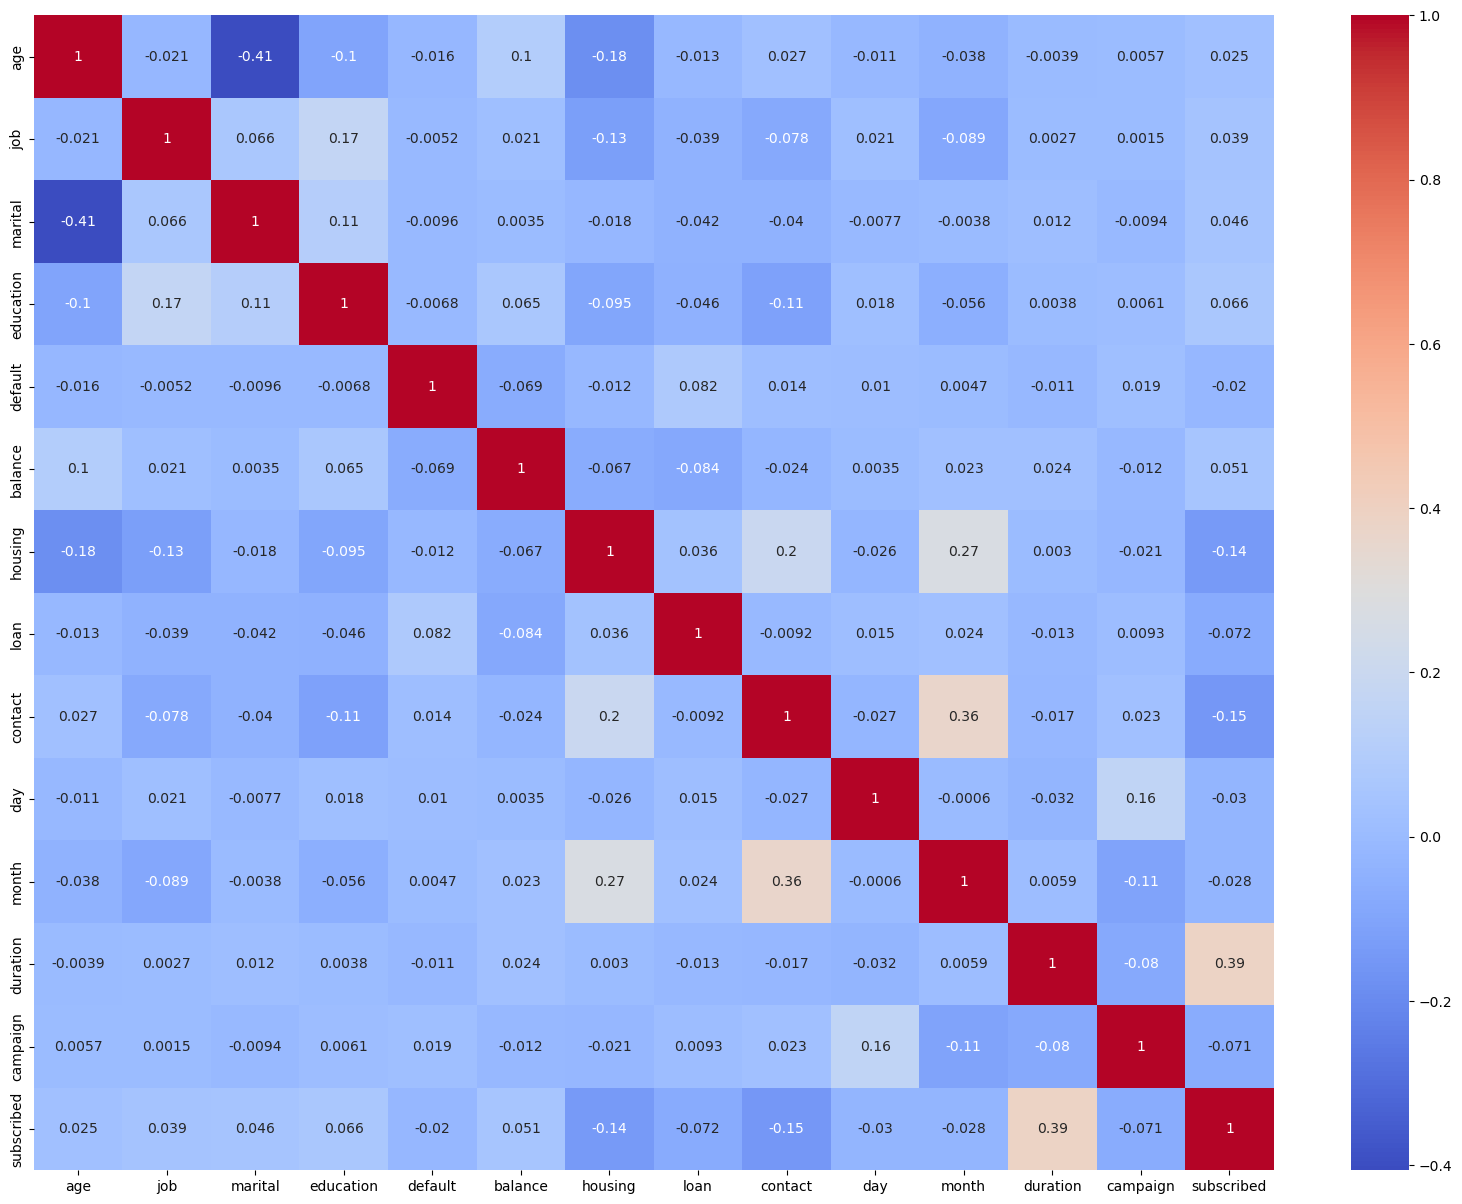

In [520]:
plt.figure(figsize=(20,15))
corr= term_deposit.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Let's prepare the data to fit in the model

In [522]:
x= df.iloc[:,0:-1]

In [523]:
y= df.iloc[:,-1]
y

0        0
1        0
2        0
3        1
4        0
        ..
31641    0
31642    0
31643    1
31644    0
31645    0
Name: subscribed, Length: 29062, dtype: int32

In [600]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=71)

In [601]:
lg= LogisticRegression()

In [602]:
lg.fit(x_train,y_train)

LogisticRegression()

In [603]:
pred=lg.predict(x_test)

In [604]:
accuracy_score(y_test,pred) 

0.9003326069503383

IT is observed that the predicted values are 90% accurate, let's create a confusion matrix and classification report for the same

In [605]:
print(confusion_matrix(y_test,pred))

[[7678  128]
 [ 741  172]]


<AxesSubplot:>

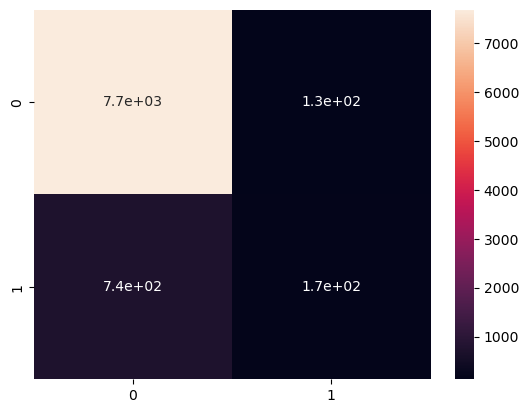

In [606]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

In [607]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7806
           1       0.57      0.19      0.28       913

    accuracy                           0.90      8719
   macro avg       0.74      0.59      0.62      8719
weighted avg       0.88      0.90      0.88      8719



Now, let's write a function so that we can find the results of new dataset

In [314]:
def predictlg(lg, new_data):
    predictions = lg.predict(new_data)
    return predictions

Now, let's load the data and perform all the preprocessing steps to fit the data in the predict function

In [617]:
data = pd.read_csv("C:/Users/vaddi/Downloads/raw.githubusercontent.com_dsrscientist_dataset5_main_termdeposit_test.csv")
list2 = ['ID','pdays','previous','poutcome']
x =data.drop(list2, axis=1)
x

age            job   marital  education default  balance housing loan  \
0       32       services   married  secondary      no      118     yes   no   
1       78        retired  divorced    primary      no     2787      no   no   
2       31  self-employed    single   tertiary      no      144     yes   no   
3       57       services    single    primary      no     3777     yes   no   
4       45    blue-collar  divorced  secondary      no     -705      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
13559   39     management   married   tertiary      no       45      no   no   
13560   54    blue-collar   married    primary      no     2281     yes   no   
13561   35        retired   married    primary      no      285     yes   no   
13562   29         admin.    single  secondary      no      464      no   no   
13563   29         admin.   married  secondary      no        2     yes   no   

         contact  day month  duration  campaign  
0       cellular   15   may        20         6  
1      telephone    1   jul       372         1  
2        unknown   16   may       676         1  
3      telephone   13   may        65         2  
4        unknown    3   jul       111         1  
...          ...  ...   ...       ...       ...  
13559   cellular   28   aug       148         4  
13560    unknown   20   jun       158         1  
13561   cellular   29   jan       136         1  
13562   cellular    9   nov       208         2  
13563   cellular    6   may       339         1  

[13564 rows x 13 columns]

In [618]:
le= LabelEncoder()
list1 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
for val in list1:
    x[val]= le.fit_transform(x[val].astype(str))

In [619]:
x

age  job  marital  education  default  balance  housing  loan  contact  \
0       32    7        1          1        0      118        1     0        0   
1       78    5        0          0        0     2787        0     0        1   
2       31    6        2          2        0      144        1     0        2   
3       57    7        2          0        0     3777        1     0        1   
4       45    1        0          1        0     -705        0     1        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
13559   39    4        1          2        0       45        0     0        0   
13560   54    1        1          0        0     2281        1     0        2   
13561   35    5        1          0        0      285        1     0        0   
13562   29    0        2          1        0      464        0     0        0   
13563   29    0        1          1        0        2        1     0        0   

       day  month  duration  campaign  
0       15      8        20         6  
1        1      5       372         1  
2       16      8       676         1  
3       13      8        65         2  
4        3      5       111         1  
...    ...    ...       ...       ...  
13559   28      1       148         4  
13560   20      6       158         1  
13561   29      4       136         1  
13562    9      9       208         2  
13563    6      8       339         1  

[13564 rows x 13 columns]

In [620]:
z= np.abs(zscore(x))
z

age       job   marital  education   default   balance   housing  \
0      0.838114  0.807551  0.276592   0.301053  0.131336  0.402389  0.893033   
1      3.499987  0.196760  1.914173   1.642982  0.131336  0.463375  1.119779   
2      0.932421  0.502156  1.360988   1.040875  0.131336  0.393955  0.893033   
3      1.519549  0.807551  1.360988   1.642982  0.131336  0.784508  0.893033   
4      0.387871  1.024823  1.914173   0.301053  0.131336  0.669352  1.119779   
...         ...       ...       ...        ...       ...       ...       ...   
13559  0.177969  0.108636  0.276592   1.040875  0.131336  0.426069  1.119779   
13560  1.236630  1.024823  0.276592   1.642982  0.131336  0.299239  0.893033   
13561  0.555195  0.196760  0.276592   1.642982  0.131336  0.348218  0.893033   
13562  1.121034  1.330219  1.360988   0.301053  0.131336  0.290155  1.119779   
13563  1.121034  1.330219  0.276592   0.301053  0.131336  0.440017  0.893033   

           loan   contact       day     month  duration  campaign  
0      0.429564  0.704444  0.089124  0.829938  0.921849  1.058702  
1      0.429564  0.413763  1.778340  0.165753  0.439963  0.574850  
2      0.429564  1.531969  0.031534  0.829938  1.616074  0.574850  
3      0.429564  0.413763  0.330440  0.829938  0.747754  0.248140  
4      2.327941  1.531969  1.537023  0.165753  0.569789  0.574850  
...         ...       ...       ...       ...       ...       ...  
13559  0.429564  0.704444  1.479434  1.493340  0.426644  0.405281  
13560  0.429564  1.531969  0.514168  0.166144  0.387957  0.574850  
13561  0.429564  0.704444  1.600092  0.497650  0.473070  0.574850  
13562  0.429564  0.704444  0.813073  1.161835  0.194517  0.248140  
13563  0.429564  0.704444  1.175048  0.829938  0.312293  0.574850  

[13564 rows x 13 columns]

In [621]:
thresold = 3
print(np.where(z>3))

(array([    1,    14,    15, ..., 13529, 13550, 13555], dtype=int64), array([ 0,  5, 11, ...,  4, 11, 12], dtype=int64))


removing the outliers

In [624]:
threshold = 3
X= x[(z<3). all(axis=1)]
X

age  job  marital  education  default  balance  housing  loan  contact  \
0       32    7        1          1        0      118        1     0        0   
2       31    6        2          2        0      144        1     0        2   
3       57    7        2          0        0     3777        1     0        1   
4       45    1        0          1        0     -705        0     1        2   
5       32    4        2          2        0        0        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
13559   39    4        1          2        0       45        0     0        0   
13560   54    1        1          0        0     2281        1     0        2   
13561   35    5        1          0        0      285        1     0        0   
13562   29    0        2          1        0      464        0     0        0   
13563   29    0        1          1        0        2        1     0        0   

       day  month  duration  campaign  
0       15      8        20         6  
2       16      8       676         1  
3       13      8        65         2  
4        3      5       111         1  
5       22      5       455         2  
...    ...    ...       ...       ...  
13559   28      1       148         4  
13560   20      6       158         1  
13561   29      4       136         1  
13562    9      9       208         2  
13563    6      8       339         1  

[12458 rows x 13 columns]

We have removed all the outliers of the data an now let's go ahead and fit the data in the function for the predictions

In [625]:
new_predictions = predictlg(lg, X)

In [626]:
new_predictions

array([0, 0, 0, ..., 0, 0, 0])

As we do not have the acctual values can't check the accuracy score for the predicted values

Thanks!